# Table of Contents
 <p><div class="lev1 toc-item"><a href="#An-example-of-a-small-Multi-Player-simulation,-with-Centralized-Algorithms" data-toc-modified-id="An-example-of-a-small-Multi-Player-simulation,-with-Centralized-Algorithms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>An example of a small Multi-Player simulation, with Centralized Algorithms</a></div><div class="lev2 toc-item"><a href="#Creating-the-problem" data-toc-modified-id="Creating-the-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the problem</a></div><div class="lev3 toc-item"><a href="#Parameters-for-the-simulation" data-toc-modified-id="Parameters-for-the-simulation-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Parameters for the simulation</a></div><div class="lev3 toc-item"><a href="#Two-MAB-problems-with-Bernoulli-arms" data-toc-modified-id="Two-MAB-problems-with-Bernoulli-arms-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Two MAB problems with Bernoulli arms</a></div><div class="lev3 toc-item"><a href="#Some-RL-algorithms" data-toc-modified-id="Some-RL-algorithms-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Some RL algorithms</a></div><div class="lev2 toc-item"><a href="#Creating-the-EvaluatorMultiPlayers-objects" data-toc-modified-id="Creating-the-EvaluatorMultiPlayers-objects-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating the <code>EvaluatorMultiPlayers</code> objects</a></div><div class="lev2 toc-item"><a href="#Solving-the-problem" data-toc-modified-id="Solving-the-problem-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Solving the problem</a></div><div class="lev2 toc-item"><a href="#Plotting-the-results" data-toc-modified-id="Plotting-the-results-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting the results</a></div><div class="lev3 toc-item"><a href="#First-problem" data-toc-modified-id="First-problem-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>First problem</a></div><div class="lev3 toc-item"><a href="#Second-problem" data-toc-modified-id="Second-problem-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Second problem</a></div><div class="lev3 toc-item"><a href="#Comparing-their-performances" data-toc-modified-id="Comparing-their-performances-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Comparing their performances</a></div>

---
# An example of a small Multi-Player simulation, with Centralized Algorithms

First, be sure to be in the main folder, and import `EvaluatorMultiPlayers` from `Environment` package:

In [1]:
from sys import path
path.insert(0, '..')

In [2]:
# Local imports
from Environment import EvaluatorMultiPlayers, tqdm

 - Setting dpi of all figures to 110 ...
 - Setting 'figsize' of all figures to (19.8, 10.8) ...
Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...


We also need arms, for instance `Bernoulli`-distributed arm:

In [3]:
# Import arms
from Arms import makeMeans, Bernoulli

Info: numba.jit seems to be available.


And finally we need some single-player and multi-player Reinforcement Learning algorithms:

In [4]:
# Import algorithms
from Policies import *
from PoliciesMultiPlayers import *

Info: numba.jit seems to be available.


For instance, this imported the `UCB` algorithm:

In [5]:
help(UCBalpha)

Help on class UCBalpha in module Policies.UCBalpha:

class UCBalpha(Policies.UCB.UCB)
 |  The UCB1 (UCB-alpha) index policy, modified to take a random permutation order for the initial exploration of each arm (reduce collisions in the multi-players setting).
 |  Reference: [Auer et al. 02].
 |  
 |  Method resolution order:
 |      UCBalpha
 |      Policies.UCB.UCB
 |      Policies.IndexPolicy.IndexPolicy
 |      Policies.BasePolicy.BasePolicy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, nbArms, alpha=4, lower=0.0, amplitude=1.0)
 |      New generic index policy.
 |      
 |      - nbArms: the number of arms,
 |      - lower, amplitude: lower value and known amplitude of the rewards.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  computeIndex(self, arm)
 |      Compute the current index of arm 'arm'.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Policies.IndexPolicy.IndexPolicy:
 |

As well as the `CentralizedMultiplePlay` multi-player policy:

In [6]:
help(CentralizedMultiplePlay)

Help on class CentralizedMultiplePlay in module PoliciesMultiPlayers.CentralizedMultiplePlay:

class CentralizedMultiplePlay(PoliciesMultiPlayers.BaseMPPolicy.BaseMPPolicy)
 |  CentralizedMultiplePlay: a multi-player policy where ONE policy is used by a centralized agent; asking the policy to select nbPlayers arms at each step.
 |  
 |  Method resolution order:
 |      CentralizedMultiplePlay
 |      PoliciesMultiPlayers.BaseMPPolicy.BaseMPPolicy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, nbPlayers, playerAlgo, nbArms, uniformAllocation=False, *args, **kwargs)
 |      - nbPlayers: number of players to create (in self._players).
 |      - playerAlgo: class to use for every players.
 |      - nbArms: number of arms, given as first argument to playerAlgo.
 |      - uniformAllocation: Should the affectations of users always be uniform, or fixed when UCB indexes have converged? First choice is more fair, but linear nb of switches, second choice is not fai

We also need a collision model. The usual ones are defined in the `CollisionModels` package, and the only one we need is the classical one, where two or more colliding users don't receive any rewards.

In [7]:
# Collision Models
from Environment.CollisionModels import onlyUniqUserGetsReward
help(onlyUniqUserGetsReward)

Help on function onlyUniqUserGetsReward in module Environment.CollisionModels:

onlyUniqUserGetsReward(t, arms, players, choices, rewards, pulls, collisions)
    Simple collision model where only the players alone on one arm sample it and receive the reward.
    
    - This is the default collision model, cf. https://arxiv.org/abs/0910.2065v3 collision model 1.
    - The numpy array 'choices' is increased according to the number of users who collided (it is NOT binary).



---
## Creating the problem

### Parameters for the simulation
- $T = 10000$ is the time horizon,
- $N = 10$ is the number of repetitions,
- $M = 2$ is the number of players,
- `N_JOBS = 4` is the number of cores used to parallelize the code.

In [8]:
HORIZON = 10000
REPETITIONS = 10
NB_PLAYERS = 2
N_JOBS = 4
collisionModel = onlyUniqUserGetsReward

### Two MAB problems with Bernoulli arms
We consider in this example $2$ problems, with `Bernoulli` arms, of different means.

1. The first problem is very easy, with two good arms and three arms, with a fixed gap $\Delta = \max_{\mu_i \neq \mu_j}(\mu_{i} - \mu{j}) = 0.1$.
2. The second problem is as easy, but with more arms.

In [9]:
ENVIRONMENTS = [  # 1)  Bernoulli arms
        {   # Scenario 1 from [Komiyama, Honda, Nakagawa, 2016, arXiv 1506.00779]
            "arm_type": Bernoulli,
            "params": [0.3, 0.4, 0.5, 0.6, 0.7]
        },
        {   # Classical scenario
             "arm_type": Bernoulli,
             "params": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        }
    ]

### Some RL algorithms
We will compare Thompson Sampling against $\mathrm{UCB}_1$, using two different centralized policy:

1. `CentralizedMultiplePlay` is the naive use of a Bandit algorithm for Multi-Player decision making: at every step, the internal decision making process is used to determine not $1$ arm but $M$ to sample. For UCB-like algorithm, the decision making is based on a $\arg\max$ on UCB-like indexes, usually of the form $I_j(t) = X_j(t) + B_j(t)$, where $X_j(t) = \hat{\mu_j} = \sum_{\tau \leq t} r_j(\tau) / N_j(t)$ is the empirical mean of arm $j$, and $B_j(t)$ is a bias term, of the form $B_j(t) = \sqrt{\frac{\alpha \log(t)}{2 N_j(t)}}$.

2. `CentralizedIMP` is very similar, but instead of following the internal decision making for all the decisions, the system uses just the empirical means $X_j(t)$ to determine $M-1$ arms to sample, and the bias-corrected term (i.e., the internal decision making, can be sampling from a Bayesian posterior for instance) is used just for one decision. It is an heuristic, proposed in [[Komiyama, Honda, Nakagawa, 2016]](https://arxiv.org/abs/1506.00779).

In [10]:
nbArms = len(ENVIRONMENTS[0]['params'])
nbArms

SUCCESSIVE_PLAYERS = [
    CentralizedMultiplePlay(NB_PLAYERS, UCBalpha, nbArms, alpha=1).children,
    CentralizedIMP(NB_PLAYERS, UCBalpha, nbArms, alpha=1).children,
    CentralizedMultiplePlay(NB_PLAYERS, Thompson, nbArms).children,
    CentralizedIMP(NB_PLAYERS, Thompson, nbArms).children,
]
SUCCESSIVE_PLAYERS

5

 - One new child, of index 0, and class #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
 - One new child, of index 1, and class #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
 - One new child, of index 0, and class #1<CentralizedIMP(UCB($\alpha=1$))> ...
 - One new child, of index 1, and class #2<CentralizedIMP(UCB($\alpha=1$))> ...
 - One new child, of index 0, and class #1<CentralizedMultiplePlay(Thompson)> ...
 - One new child, of index 1, and class #2<CentralizedMultiplePlay(Thompson)> ...
 - One new child, of index 0, and class #1<CentralizedIMP(Thompson)> ...
 - One new child, of index 1, and class #2<CentralizedIMP(Thompson)> ...


[[CentralizedMultiplePlay(UCB($\alpha=1$)),
  CentralizedMultiplePlay(UCB($\alpha=1$))],
 [CentralizedIMP(UCB($\alpha=1$)), CentralizedIMP(UCB($\alpha=1$))],
 [CentralizedMultiplePlay(Thompson), CentralizedMultiplePlay(Thompson)],
 [CentralizedIMP(Thompson), CentralizedIMP(Thompson)]]

Complete configuration for the problem:

In [11]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Collision model
    "collisionModel": onlyUniqUserGetsReward,
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "successive_players": SUCCESSIVE_PLAYERS,
}

---
## Creating the `EvaluatorMultiPlayers` objects
We will need to create several objects, as the simulation first runs one policy against each environment, and then aggregate them to compare them.

In [12]:
N_players = len(configuration["successive_players"])

# List to keep all the EvaluatorMultiPlayers objects
evs = [None] * N_players
evaluators = [[None] * N_players] * len(configuration["environment"])

for playersId, players in tqdm(enumerate(configuration["successive_players"]), desc="Creating"):
    print("\n\nConsidering the list of players :\n", players)
    conf = configuration.copy()
    conf['players'] = players
    evs[playersId] = EvaluatorMultiPlayers(conf)



Considering the list of players :
 [CentralizedMultiplePlay(UCB($\alpha=1$)), CentralizedMultiplePlay(UCB($\alpha=1$))]
Number of players in the multi-players game: 2
Time horizon: 10000
Number of repetitions: 10
Sampling rate DELTA_T_SAVE: 1
Using collision model: onlyUniqUserGetsReward
  Detail:  Simple collision model where only the players alone on one arm sample it and receive the reward.

    - This is the default collision model, cf. https://arxiv.org/abs/0910.2065v3 collision model 1.
    - The numpy array 'choices' is increased according to the number of users who collided (it is NOT binary).
    
Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'Arms.Bernoulli.Bernoulli'>, 'params': [0.3, 0.4, 0.5, 0.6, 0.7]} ...
 - with 'arm_type' = <class 'Arms.Bernoulli.Bernoulli'>
 - with 'params' = [0.3, 0.4, 0.5, 0.6, 0.7]
 - with 'arms' = [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)]
 - with 'nbArms' = 5
 - with 'ma

##  Solving the problem
Now we can simulate the $2$ environments, for the successive policies. That part can take some time.

In [13]:
for playersId, evaluation in tqdm(enumerate(evs), desc="Policies"):
    for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
        # Evaluate just that env
        evaluation.startOneEnv(envId, env)
        # Storing it after simulation is done
        evaluators[envId][playersId] = evaluation


Evaluating environment: <MAB{'nbArms': 5, 'maxArm': 0.69999999999999996, 'arms': [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], 'minArm': 0.29999999999999999}>
- Adding player #1 = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
- Adding player #2 = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    4.6s remaining:    2.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    5.9s finished



Evaluating environment: <MAB{'nbArms': 9, 'maxArm': 0.90000000000000002, 'arms': [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)], 'minArm': 0.10000000000000001}>
- Adding player #1 = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
- Adding player #2 = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    5.2s remaining:    5.2s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    5.3s remaining:    2.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    6.9s finished



Evaluating environment: <MAB{'nbArms': 5, 'maxArm': 0.69999999999999996, 'arms': [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], 'minArm': 0.29999999999999999}>
- Adding player #1 = #1<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedIMP(UCB($\alpha=1$))> ...
- Adding player #2 = #2<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedIMP(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    7.8s remaining:    7.8s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    8.0s remaining:    3.4s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   10.1s finished



Evaluating environment: <MAB{'nbArms': 9, 'maxArm': 0.90000000000000002, 'arms': [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)], 'minArm': 0.10000000000000001}>
- Adding player #1 = #1<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #1<CentralizedIMP(UCB($\alpha=1$))> ...
- Adding player #2 = #2<CentralizedIMP(UCB($\alpha=1$))> ...
  Using this already created player 'player' = #2<CentralizedIMP(UCB($\alpha=1$))> ...


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    8.4s remaining:    8.4s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    8.9s remaining:    3.8s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   12.2s finished



Evaluating environment: <MAB{'nbArms': 5, 'maxArm': 0.69999999999999996, 'arms': [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], 'minArm': 0.29999999999999999}>
- Adding player #1 = #1<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(Thompson)> ...
- Adding player #2 = #2<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(Thompson)> ...


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    3.9s remaining:    3.9s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    5.1s finished



Evaluating environment: <MAB{'nbArms': 9, 'maxArm': 0.90000000000000002, 'arms': [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)], 'minArm': 0.10000000000000001}>
- Adding player #1 = #1<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedMultiplePlay(Thompson)> ...
- Adding player #2 = #2<CentralizedMultiplePlay(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedMultiplePlay(Thompson)> ...


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    4.8s remaining:    2.1s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    6.2s finished



Evaluating environment: <MAB{'nbArms': 5, 'maxArm': 0.69999999999999996, 'arms': [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], 'minArm': 0.29999999999999999}>
- Adding player #1 = #1<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedIMP(Thompson)> ...
- Adding player #2 = #2<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedIMP(Thompson)> ...


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    5.2s remaining:    5.2s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    5.4s remaining:    2.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.3s finished



Evaluating environment: <MAB{'nbArms': 9, 'maxArm': 0.90000000000000002, 'arms': [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)], 'minArm': 0.10000000000000001}>
- Adding player #1 = #1<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #1<CentralizedIMP(Thompson)> ...
- Adding player #2 = #2<CentralizedIMP(Thompson)> ...
  Using this already created player 'player' = #2<CentralizedIMP(Thompson)> ...


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    6.8s remaining:    2.9s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    8.9s finished


## Plotting the results
And finally, visualize them, with the plotting method of a `EvaluatorMultiPlayers` object:

In [14]:
def plotAll(evaluation, envId):
    evaluation.printFinalRanking(envId)
    # Rewards
    evaluation.plotRewards(envId)
    # Fairness
    #evaluation.plotFairness(envId, fairness="STD")
    # Centralized regret
    evaluation.plotRegretCentralized(envId, subTerms=True)
    #evaluation.plotRegretCentralized(envId, semilogx=True, subTerms=True)
    # Number of switches
    #evaluation.plotNbSwitchs(envId, cumulated=False)
    evaluation.plotNbSwitchs(envId, cumulated=True)
    # Frequency of selection of the best arms
    evaluation.plotBestArmPulls(envId)
    # Number of collisions - not for Centralized* policies
    #evaluation.plotNbCollisions(envId, cumulated=False)
    #evaluation.plotNbCollisions(envId, cumulated=True)
    # Frequency of collision in each arm
    #evaluation.plotFrequencyCollisions(envId, piechart=True)

### First problem
$\mu = [0.3, 0.4, 0.5, 0.6, 0.7]$ was an easy Bernoulli problem.


Final ranking for this environment #0 :
- Player #2, '#2<CentralizedMultiplePlay(UCB($\alpha=1$))>'	was ranked	1 / 2 for this simulation (last rewards = 6557).
- Player #1, '#1<CentralizedMultiplePlay(UCB($\alpha=1$))>'	was ranked	2 / 2 for this simulation (last rewards = 6327.7).


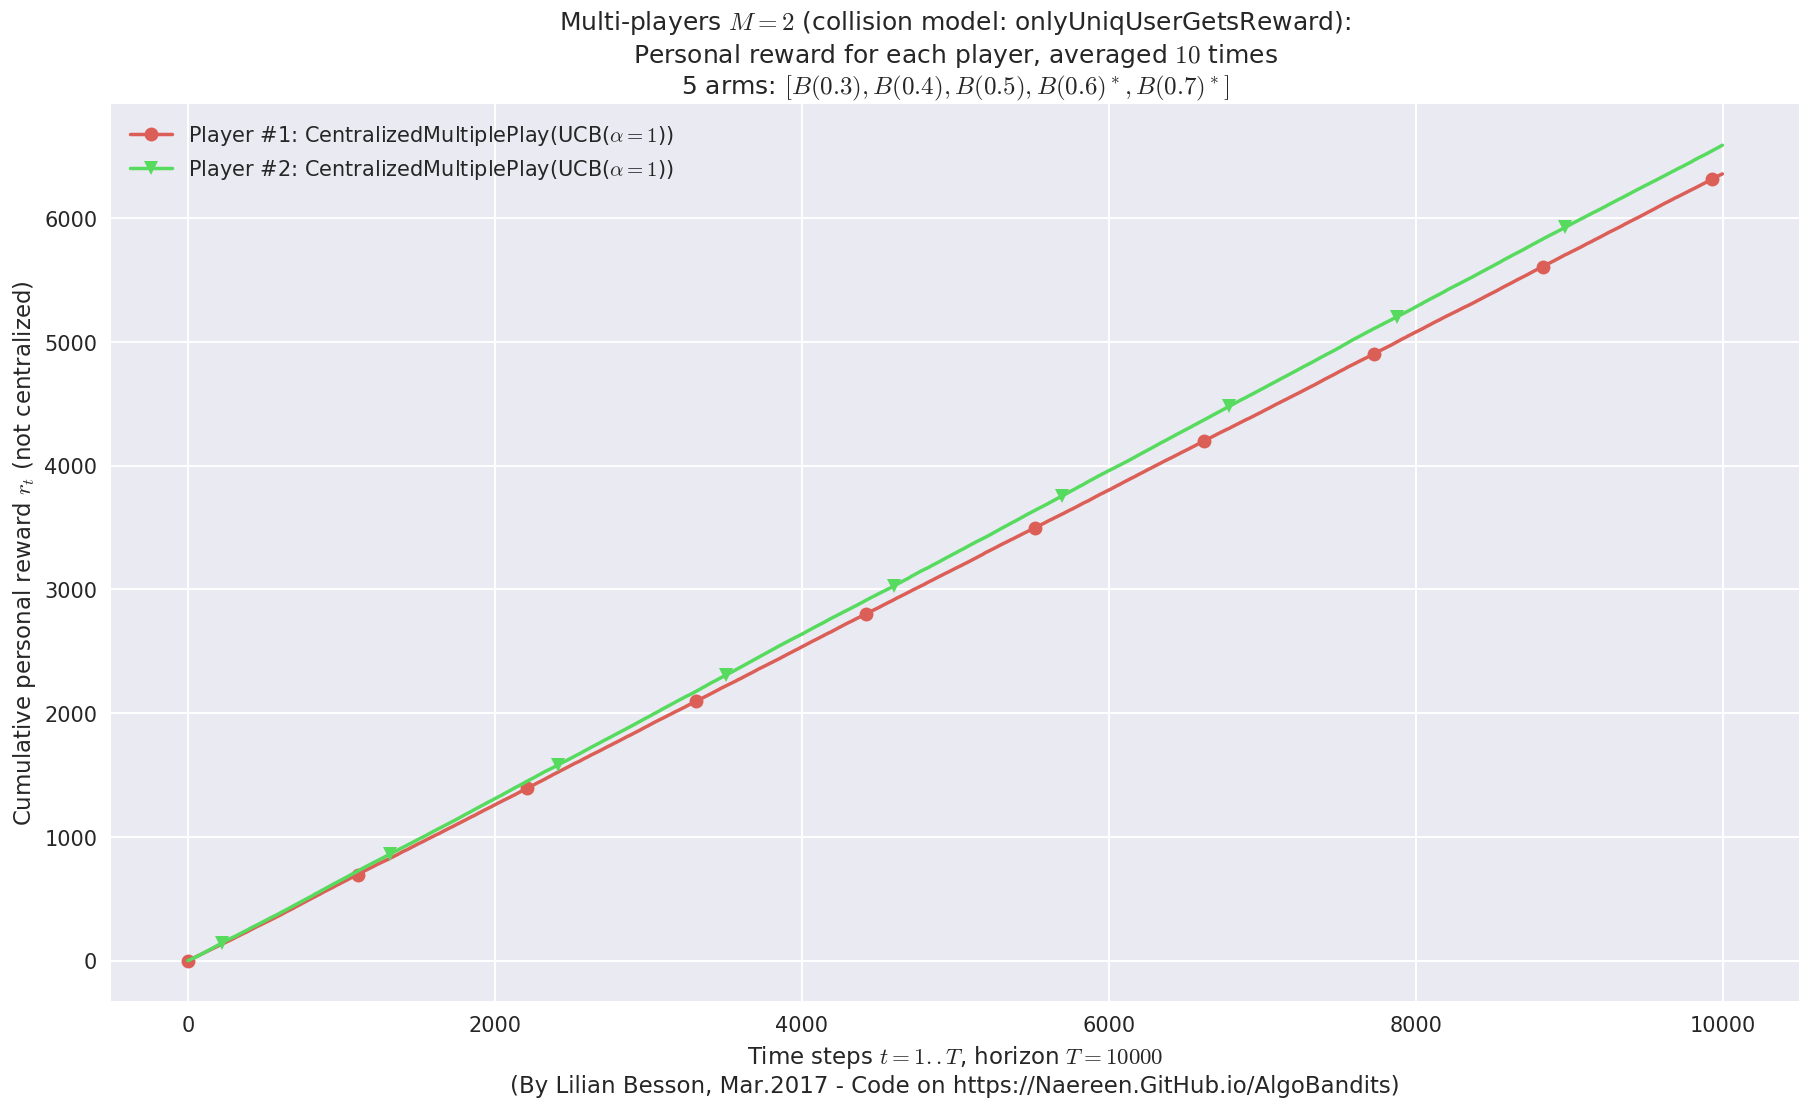

  - For 2 player, our lower bound gave = 18 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - Our lowerbound = 18,
 - [Anandkumar et al] lowerbound = 12.1


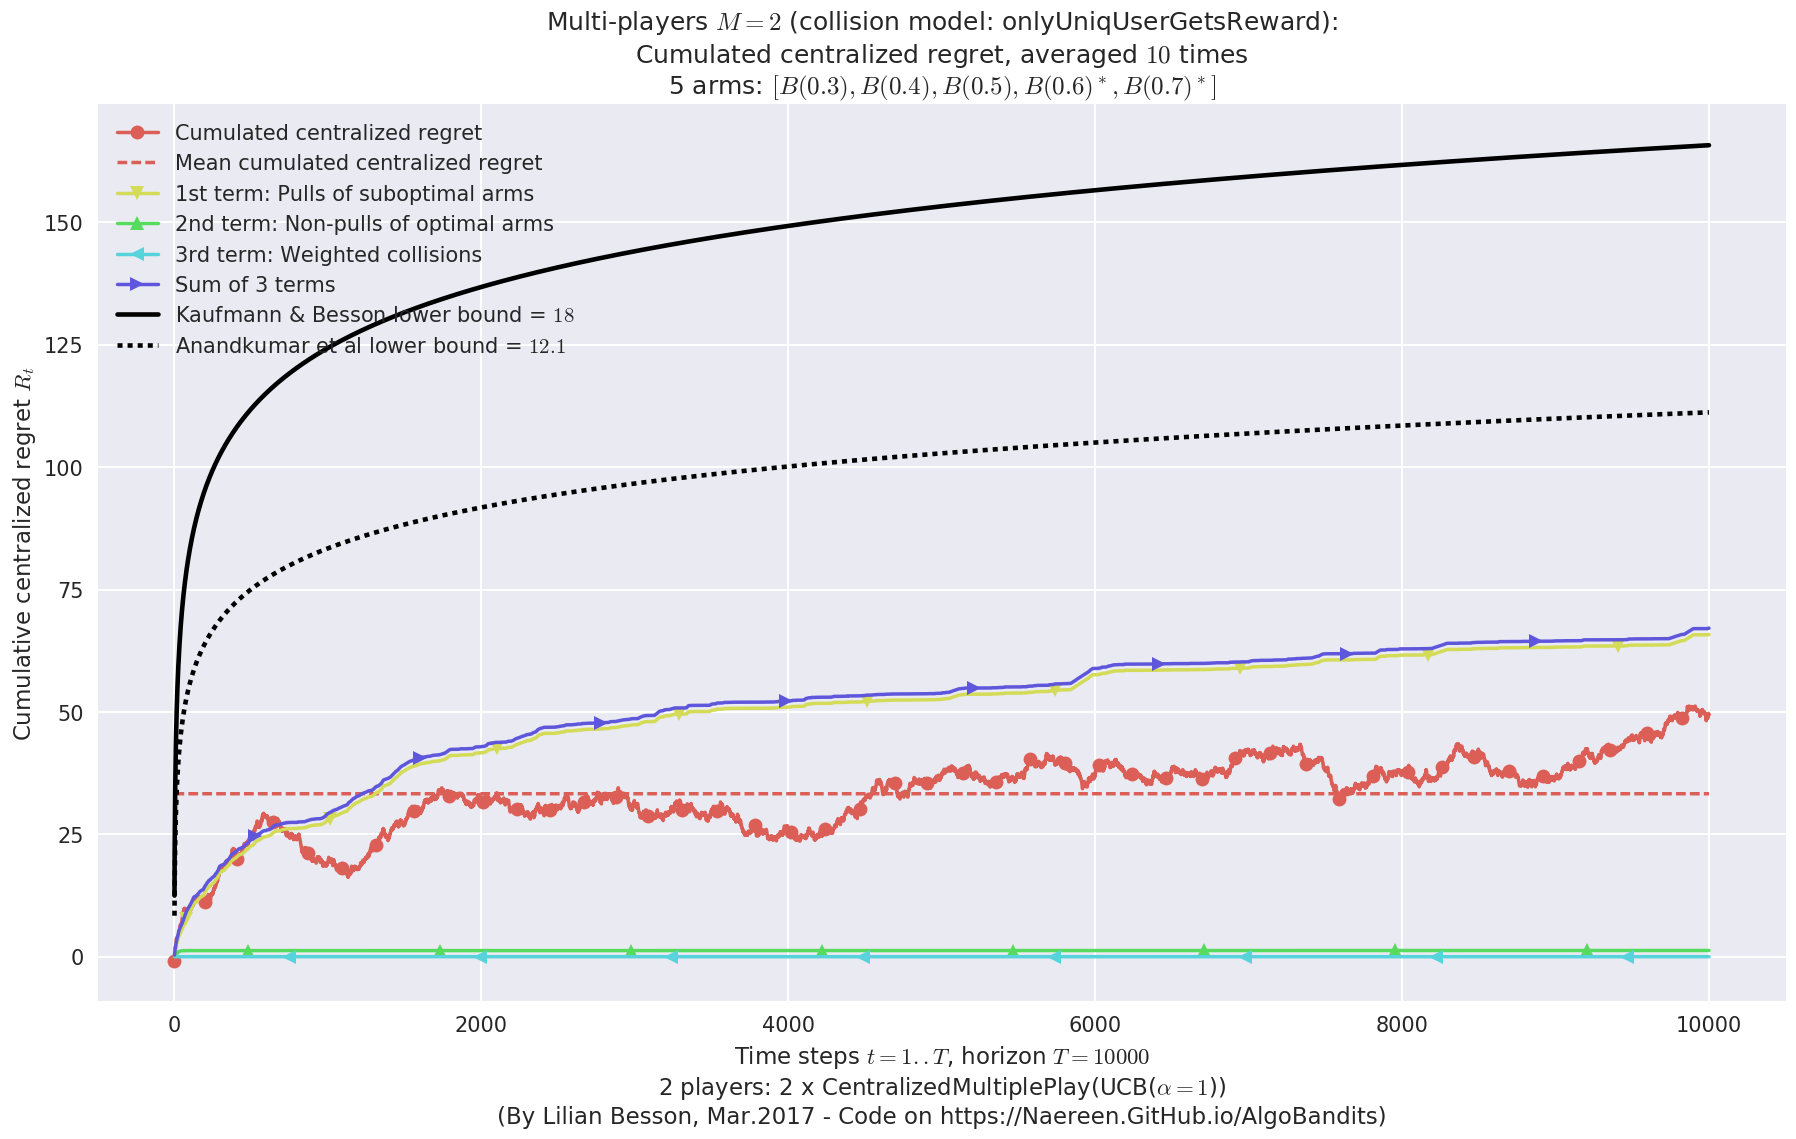

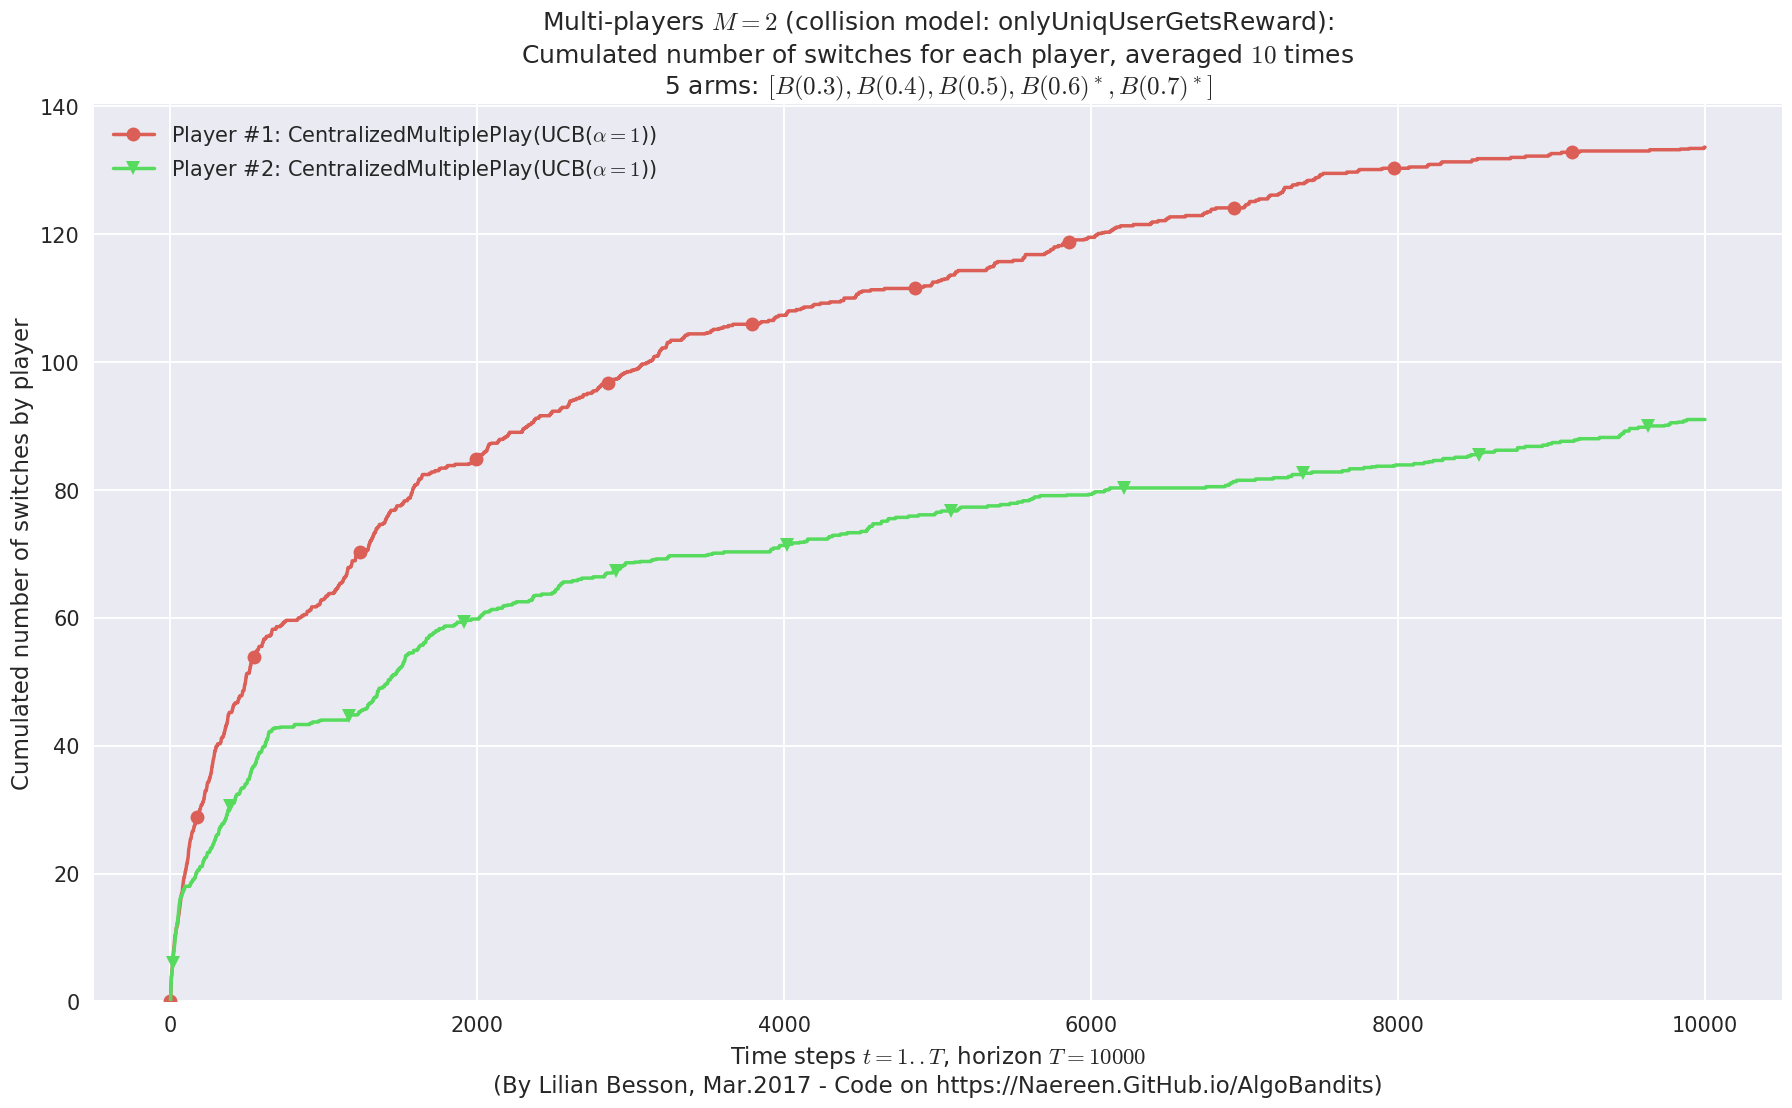

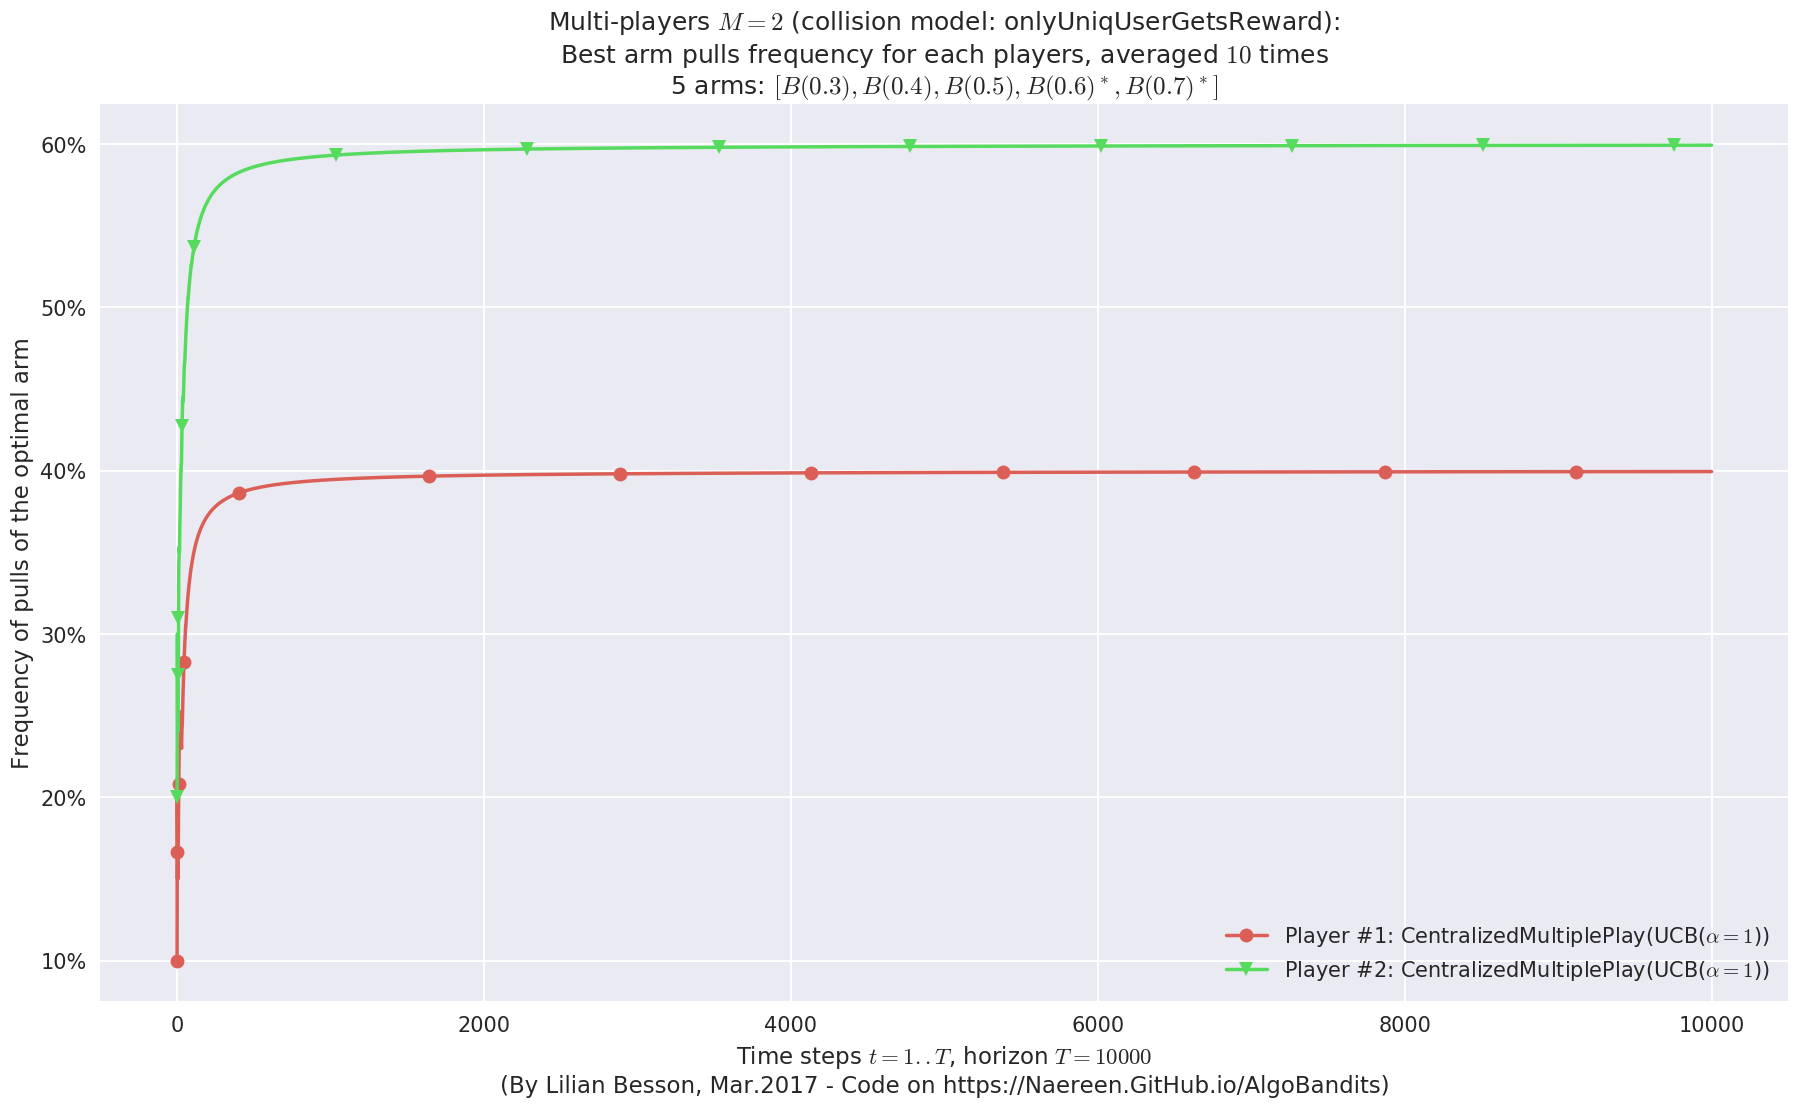


Final ranking for this environment #0 :
- Player #1, '#1<CentralizedIMP(UCB($\alpha=1$))>'	was ranked	1 / 2 for this simulation (last rewards = 6646.8).
- Player #2, '#2<CentralizedIMP(UCB($\alpha=1$))>'	was ranked	2 / 2 for this simulation (last rewards = 6204.7).


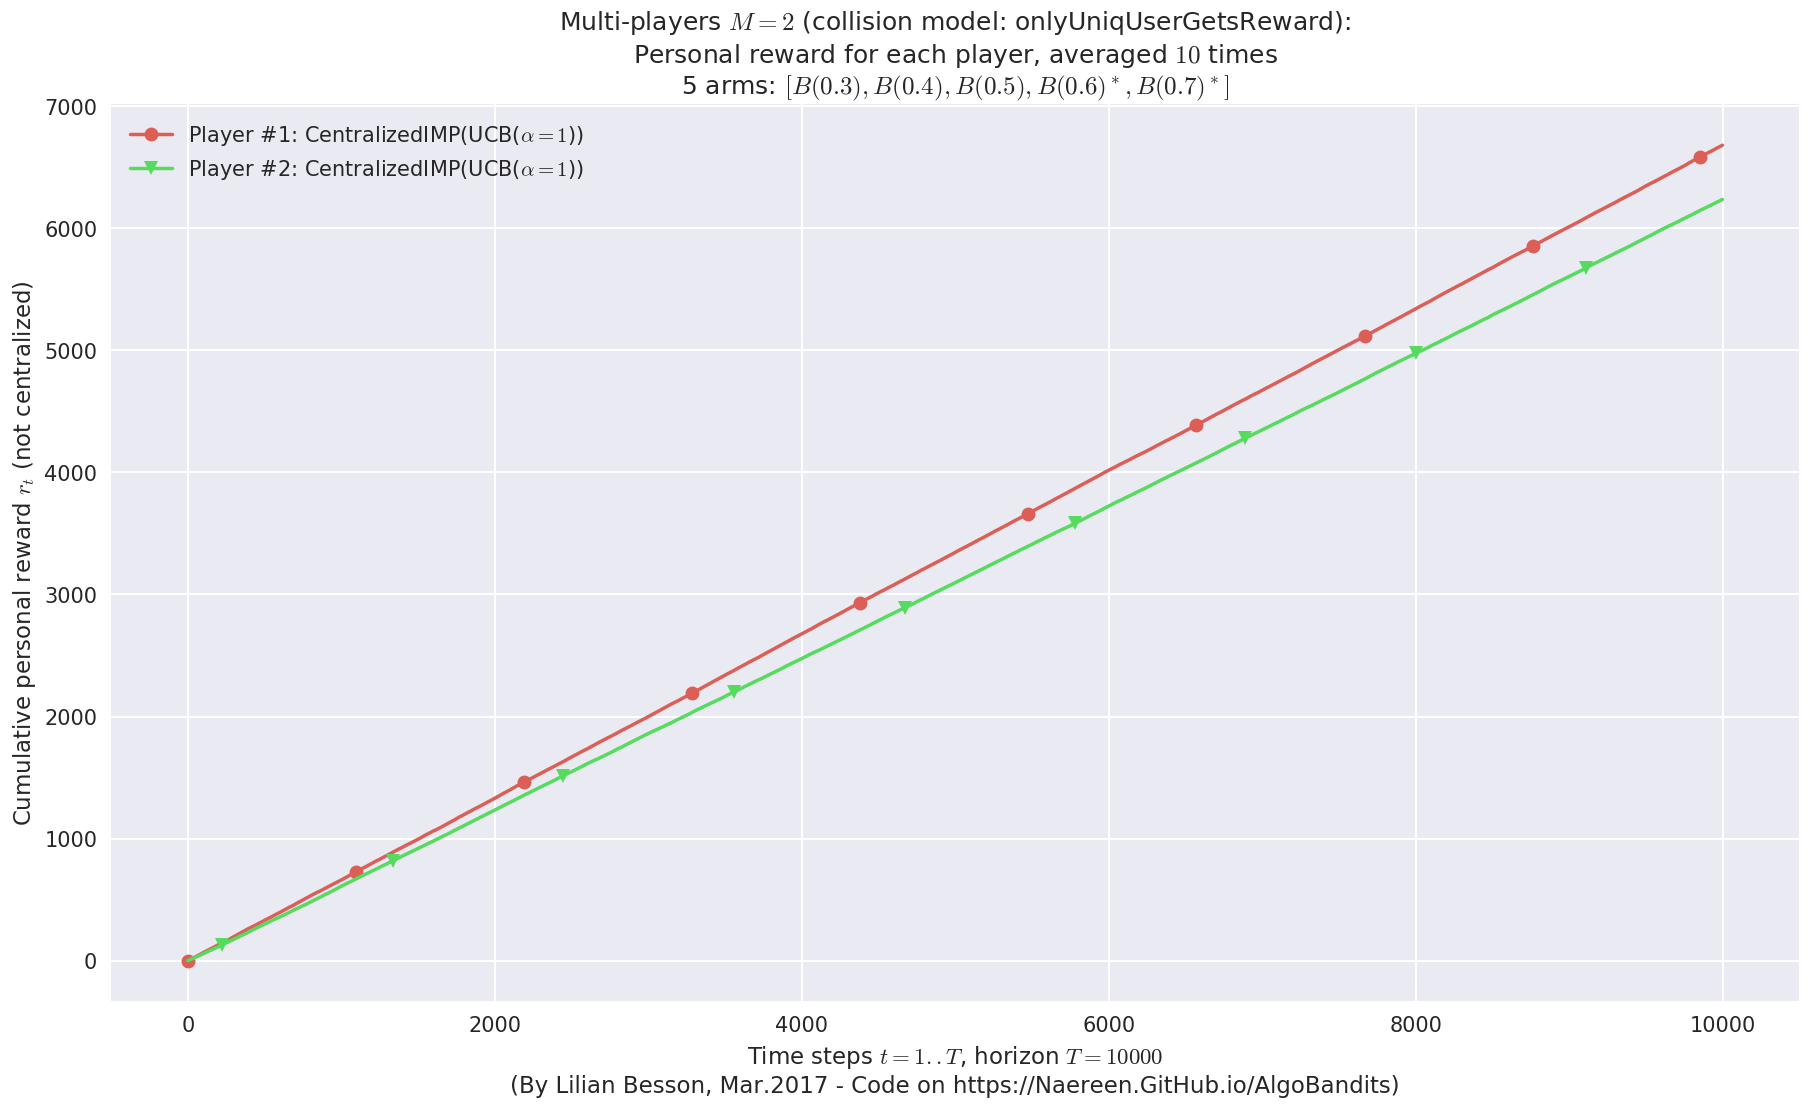

  - For 2 player, our lower bound gave = 18 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - Our lowerbound = 18,
 - [Anandkumar et al] lowerbound = 12.1


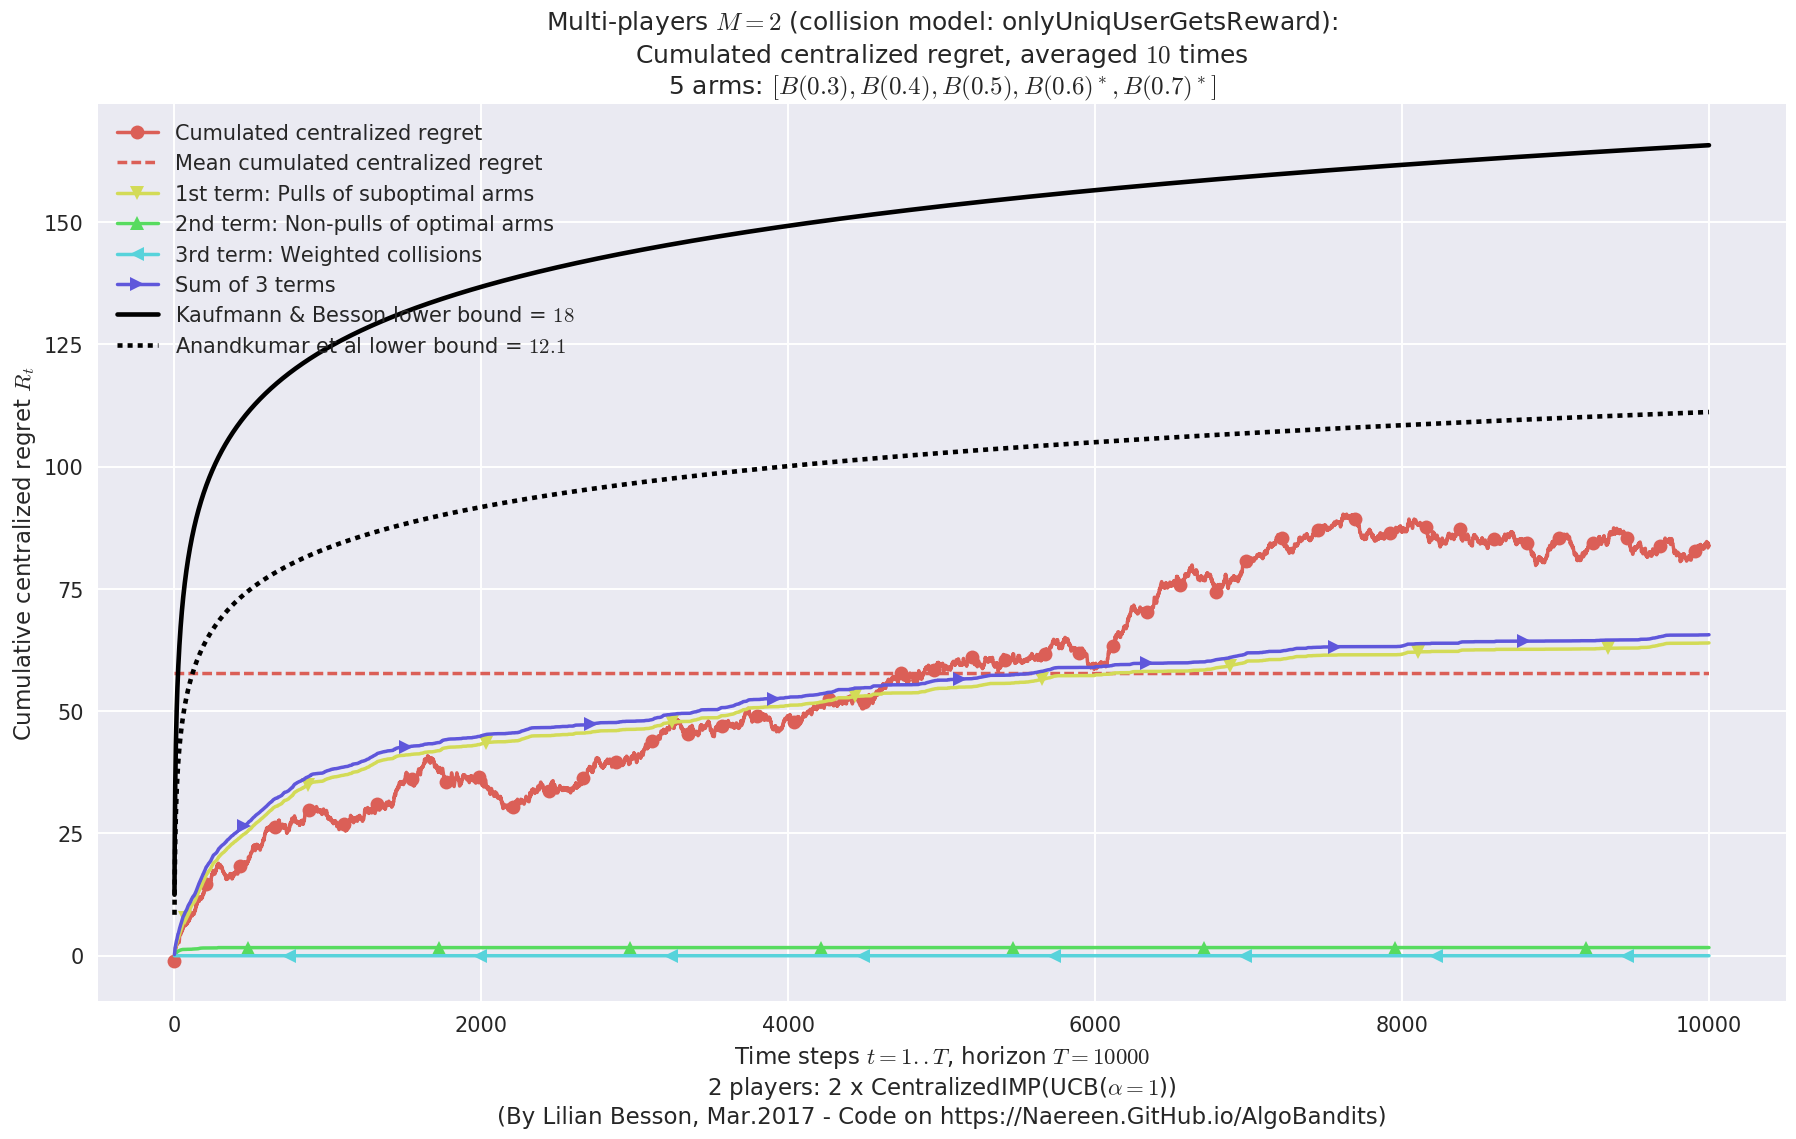

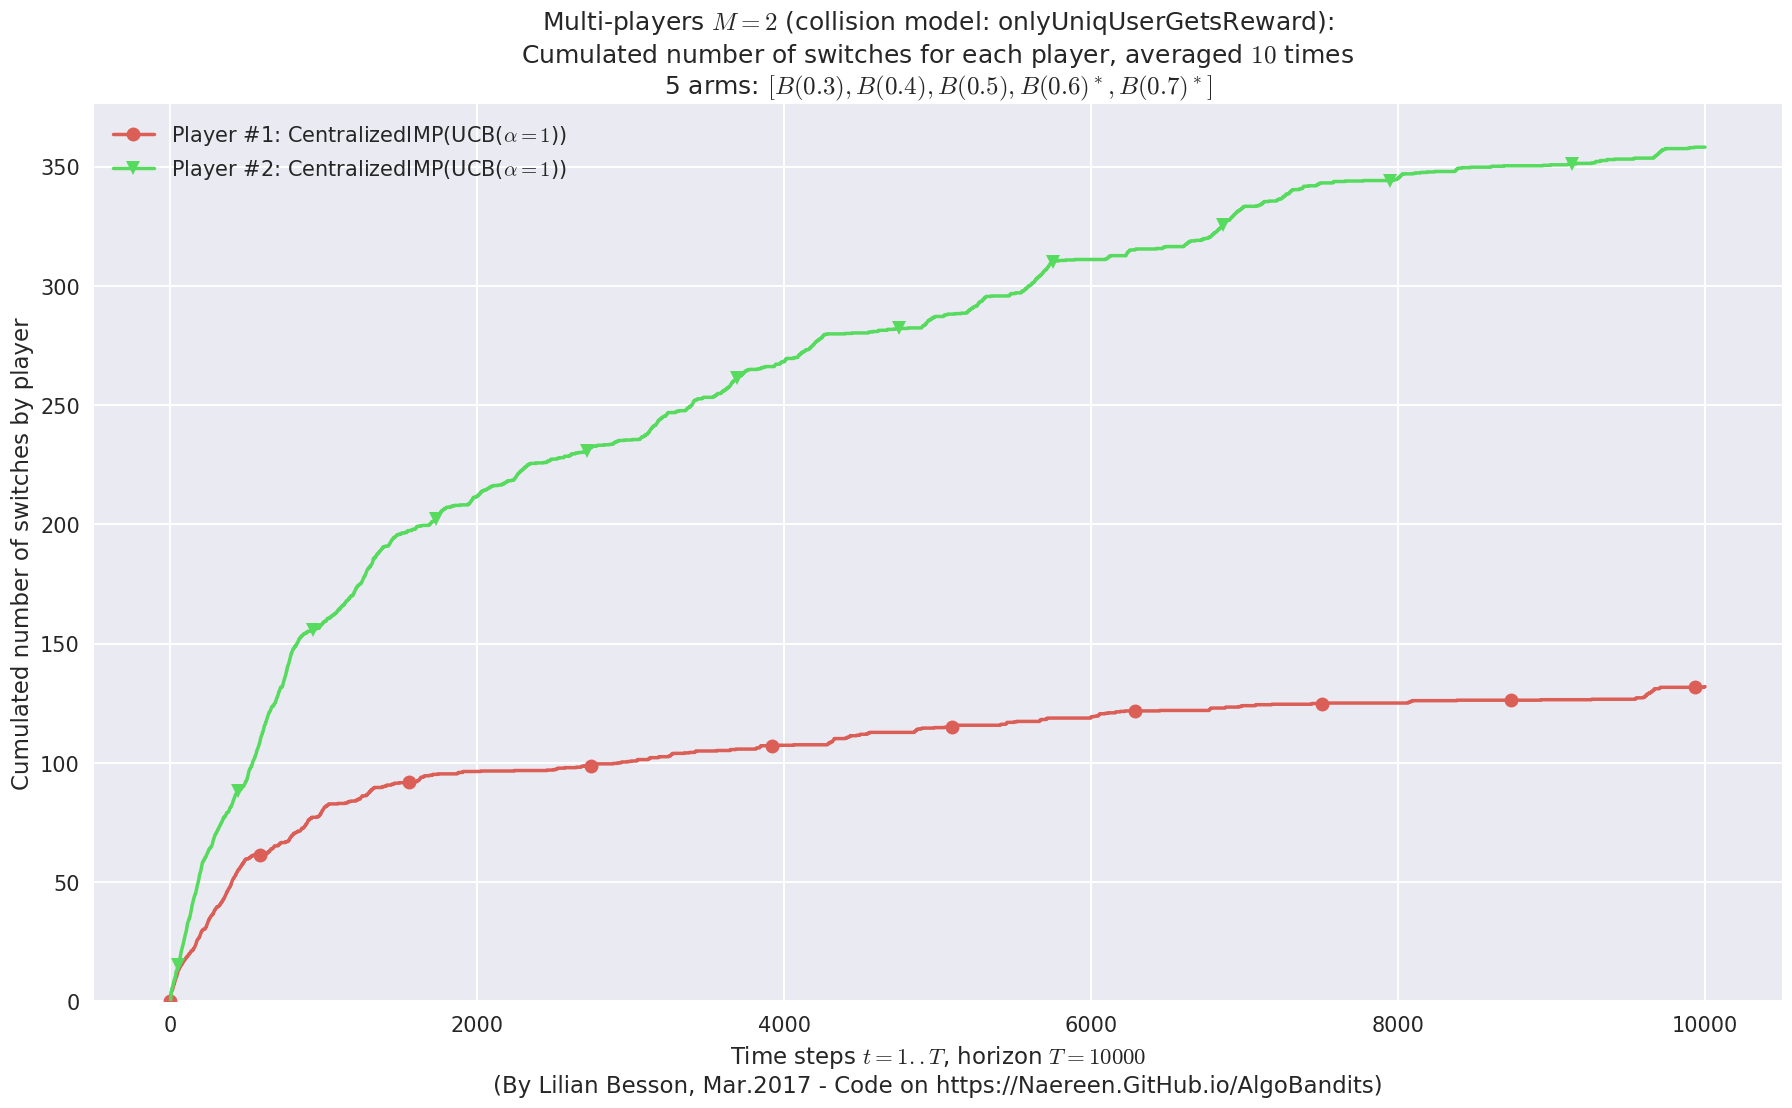

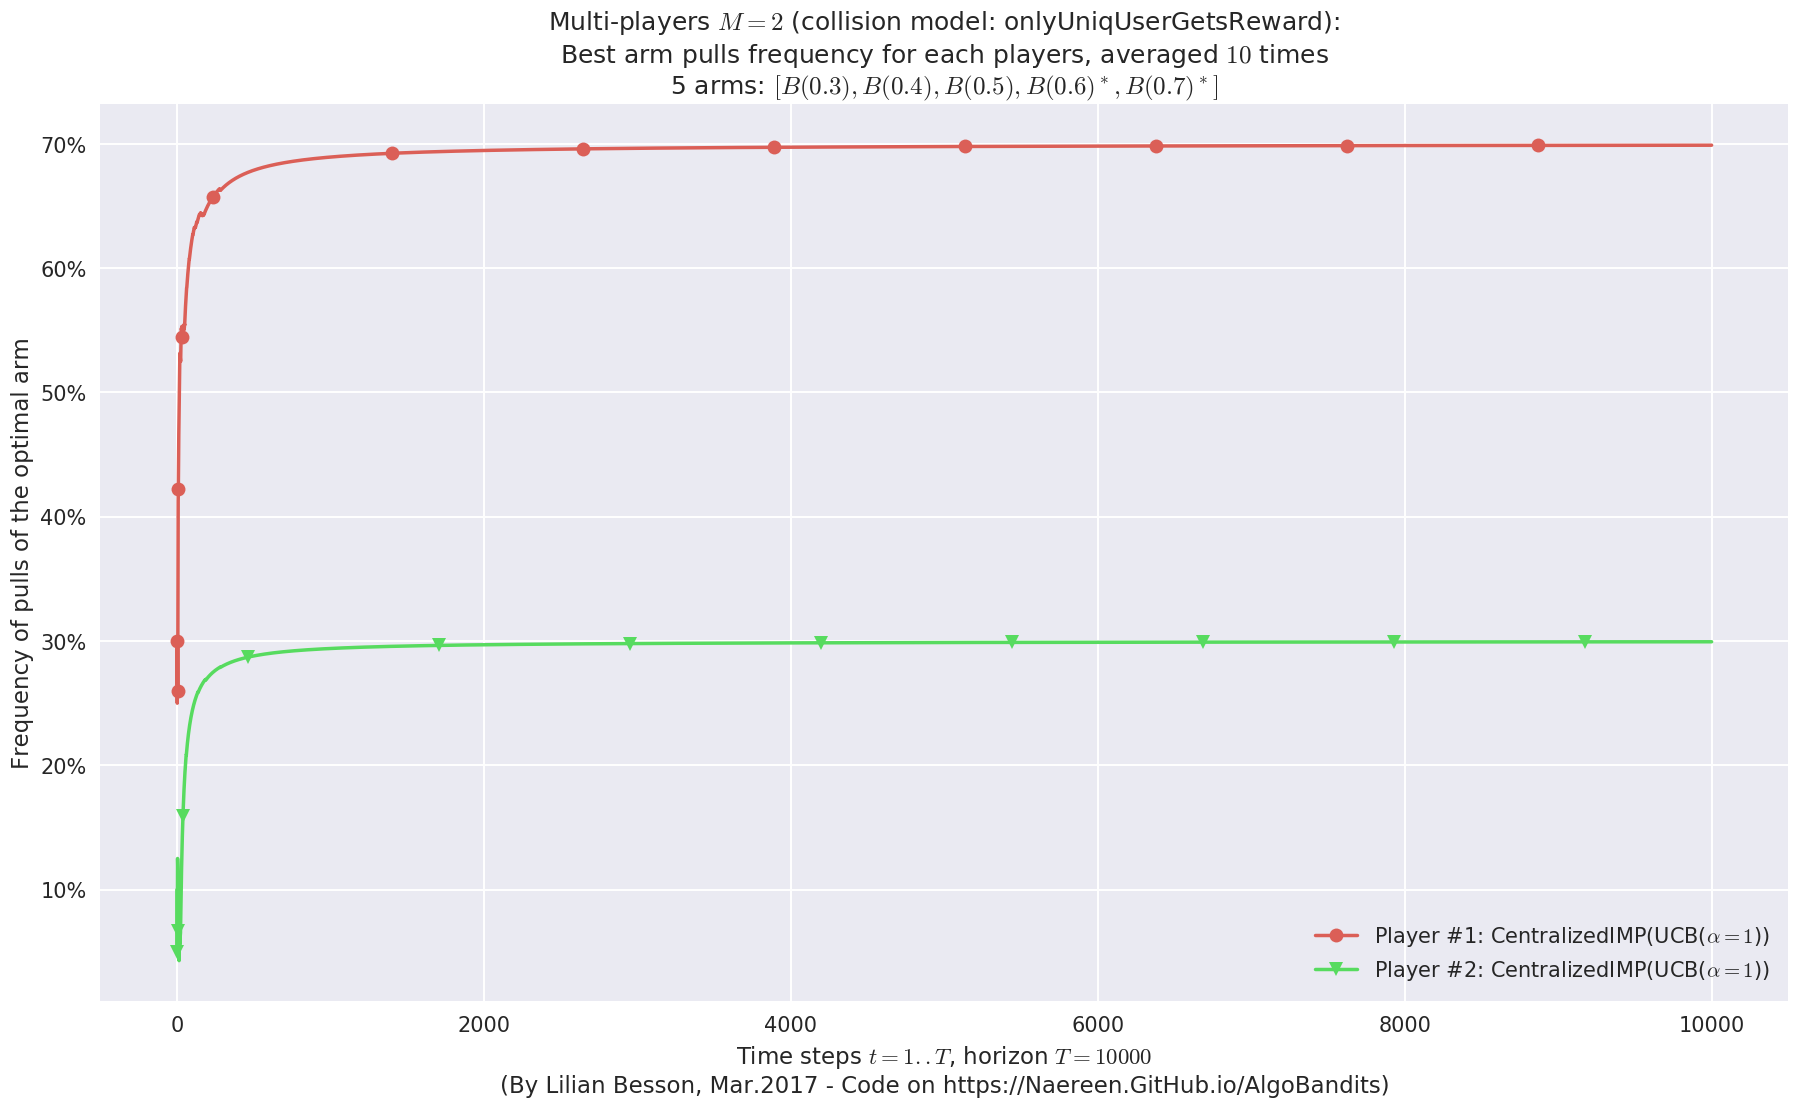


Final ranking for this environment #0 :
- Player #1, '#1<CentralizedMultiplePlay(Thompson)>'	was ranked	1 / 2 for this simulation (last rewards = 6660.4).
- Player #2, '#2<CentralizedMultiplePlay(Thompson)>'	was ranked	2 / 2 for this simulation (last rewards = 6250.4).


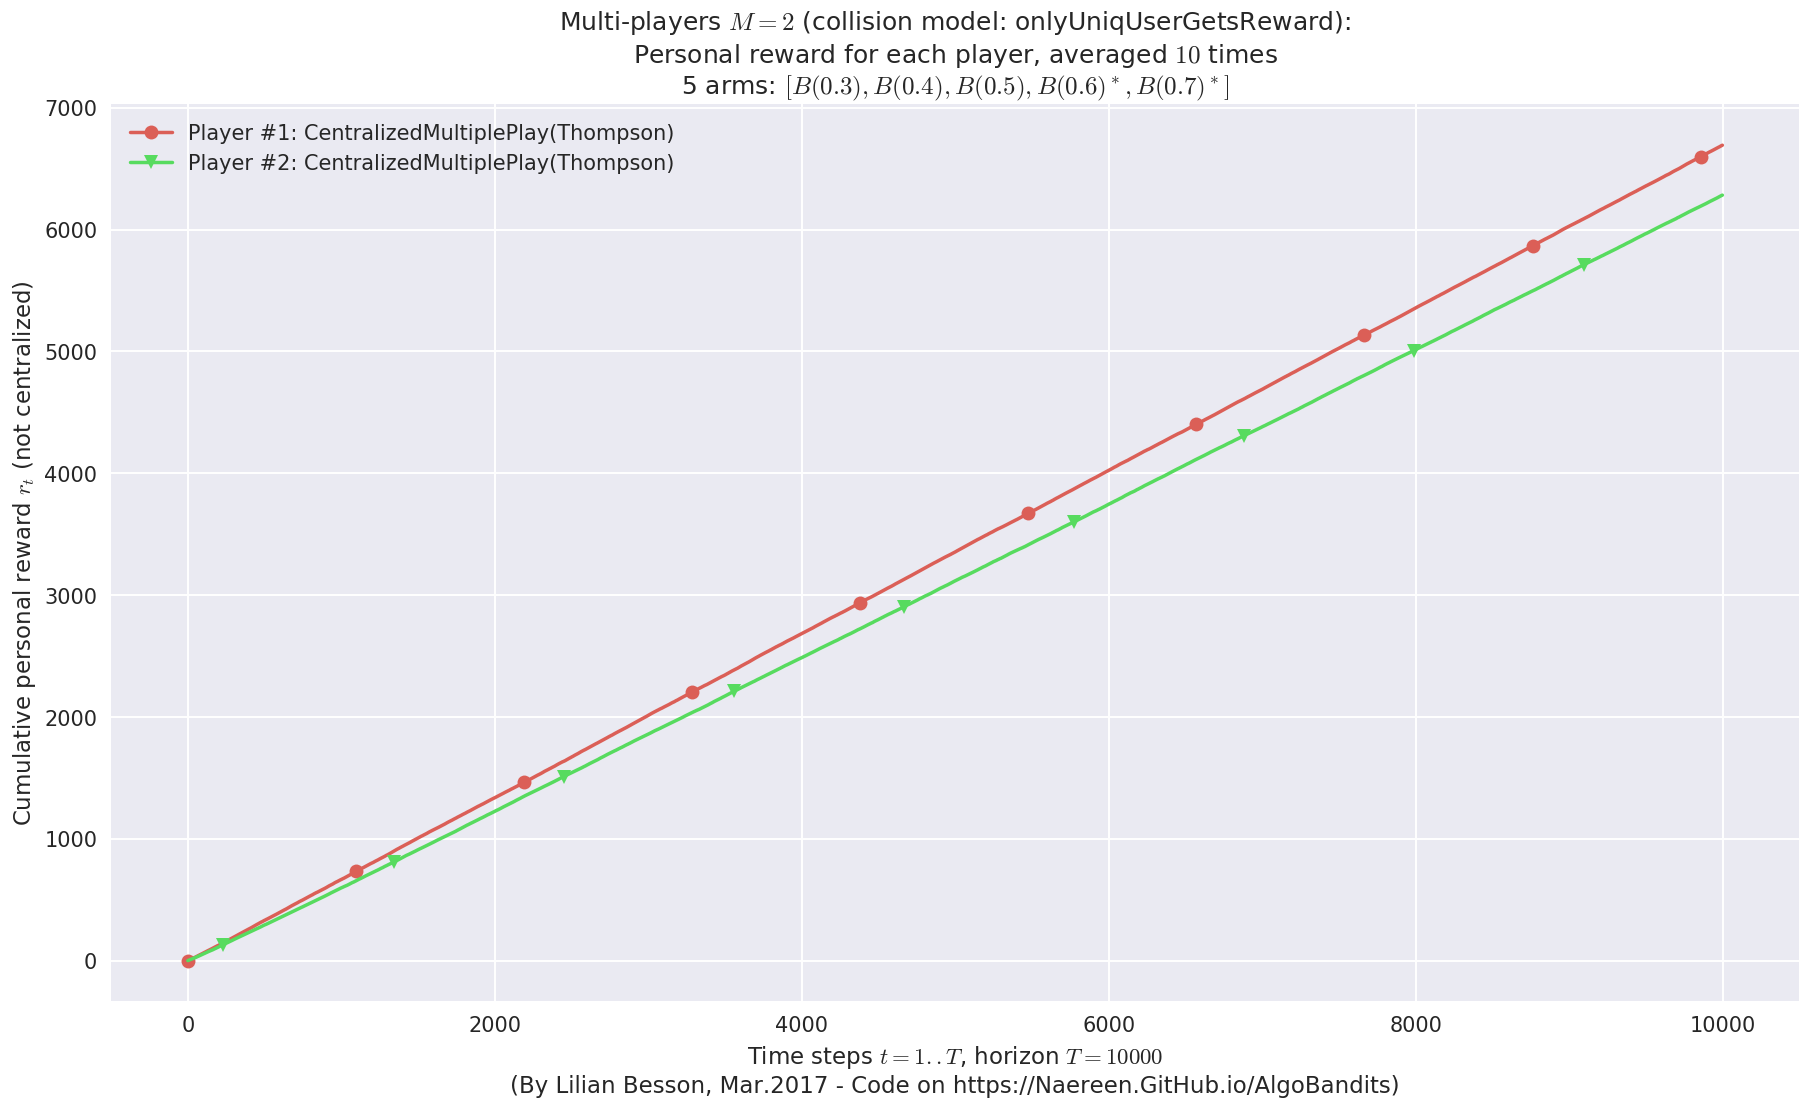

  - For 2 player, our lower bound gave = 18 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - Our lowerbound = 18,
 - [Anandkumar et al] lowerbound = 12.1


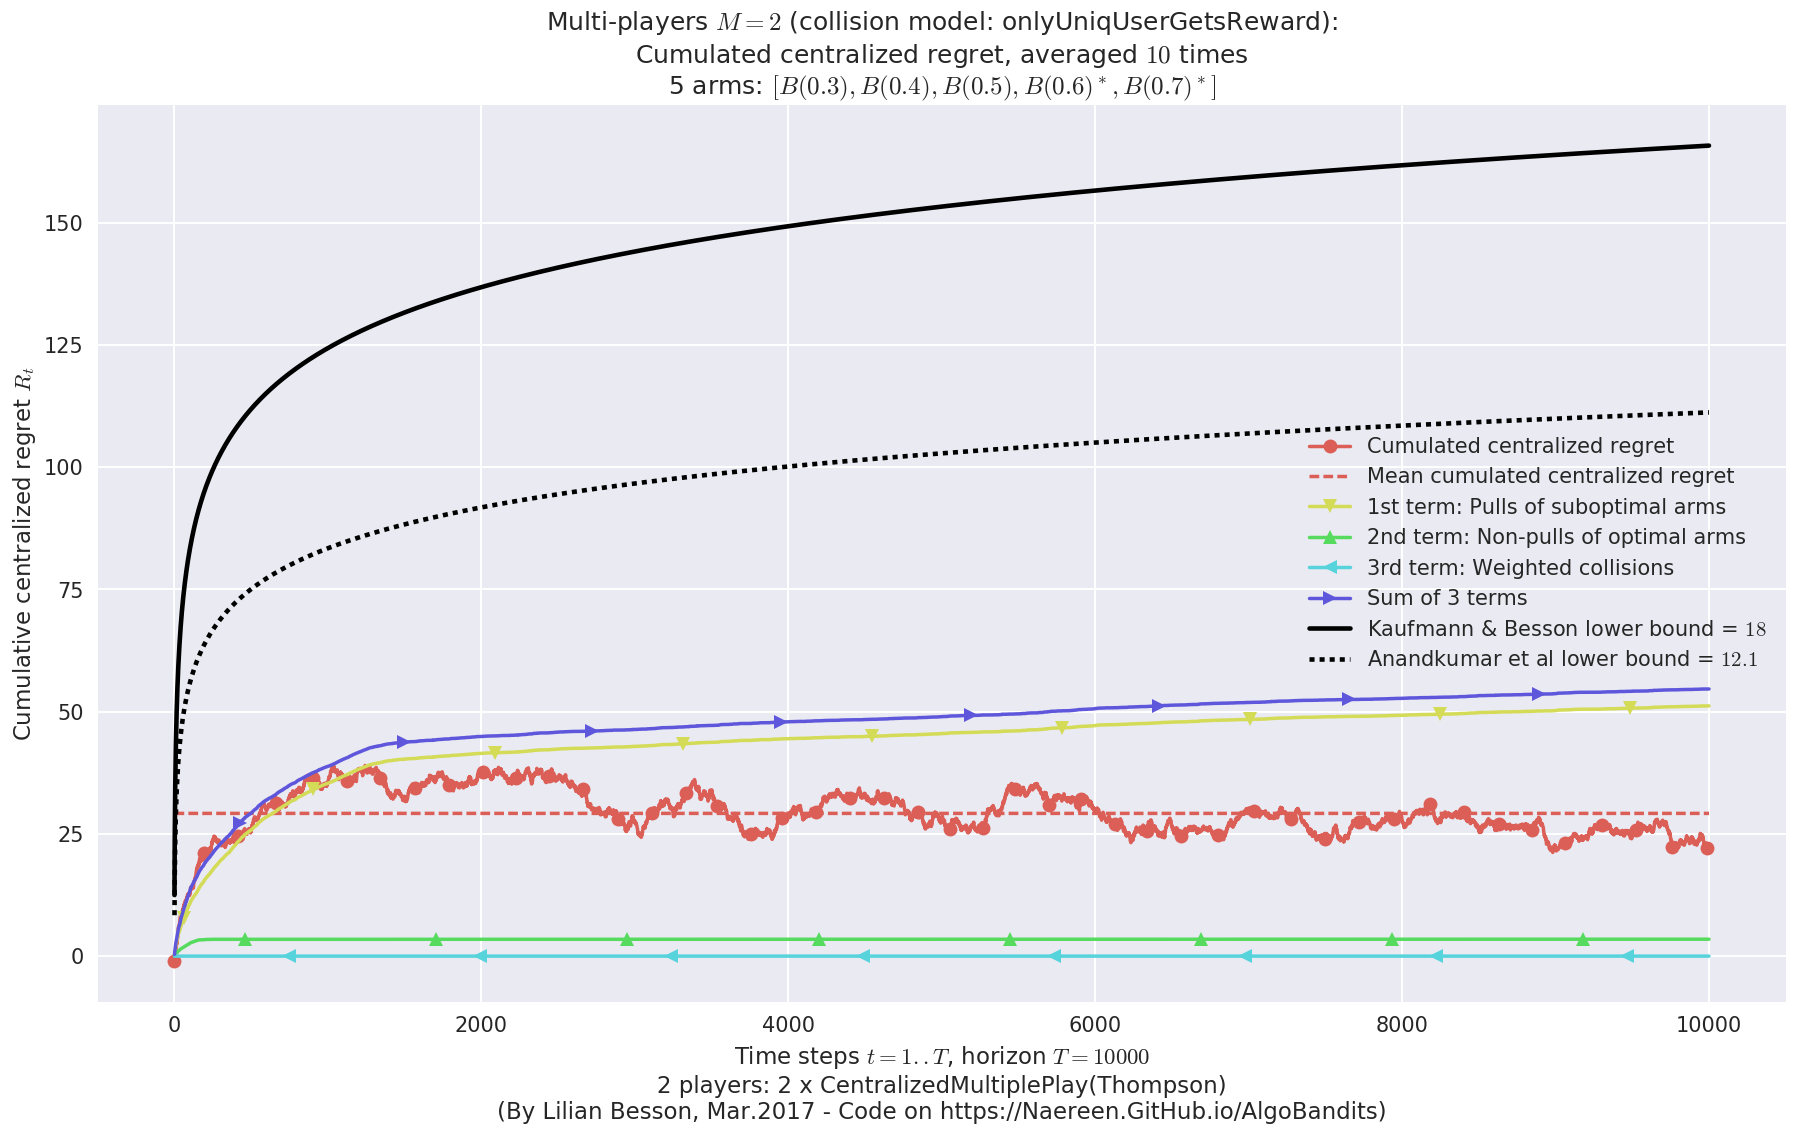

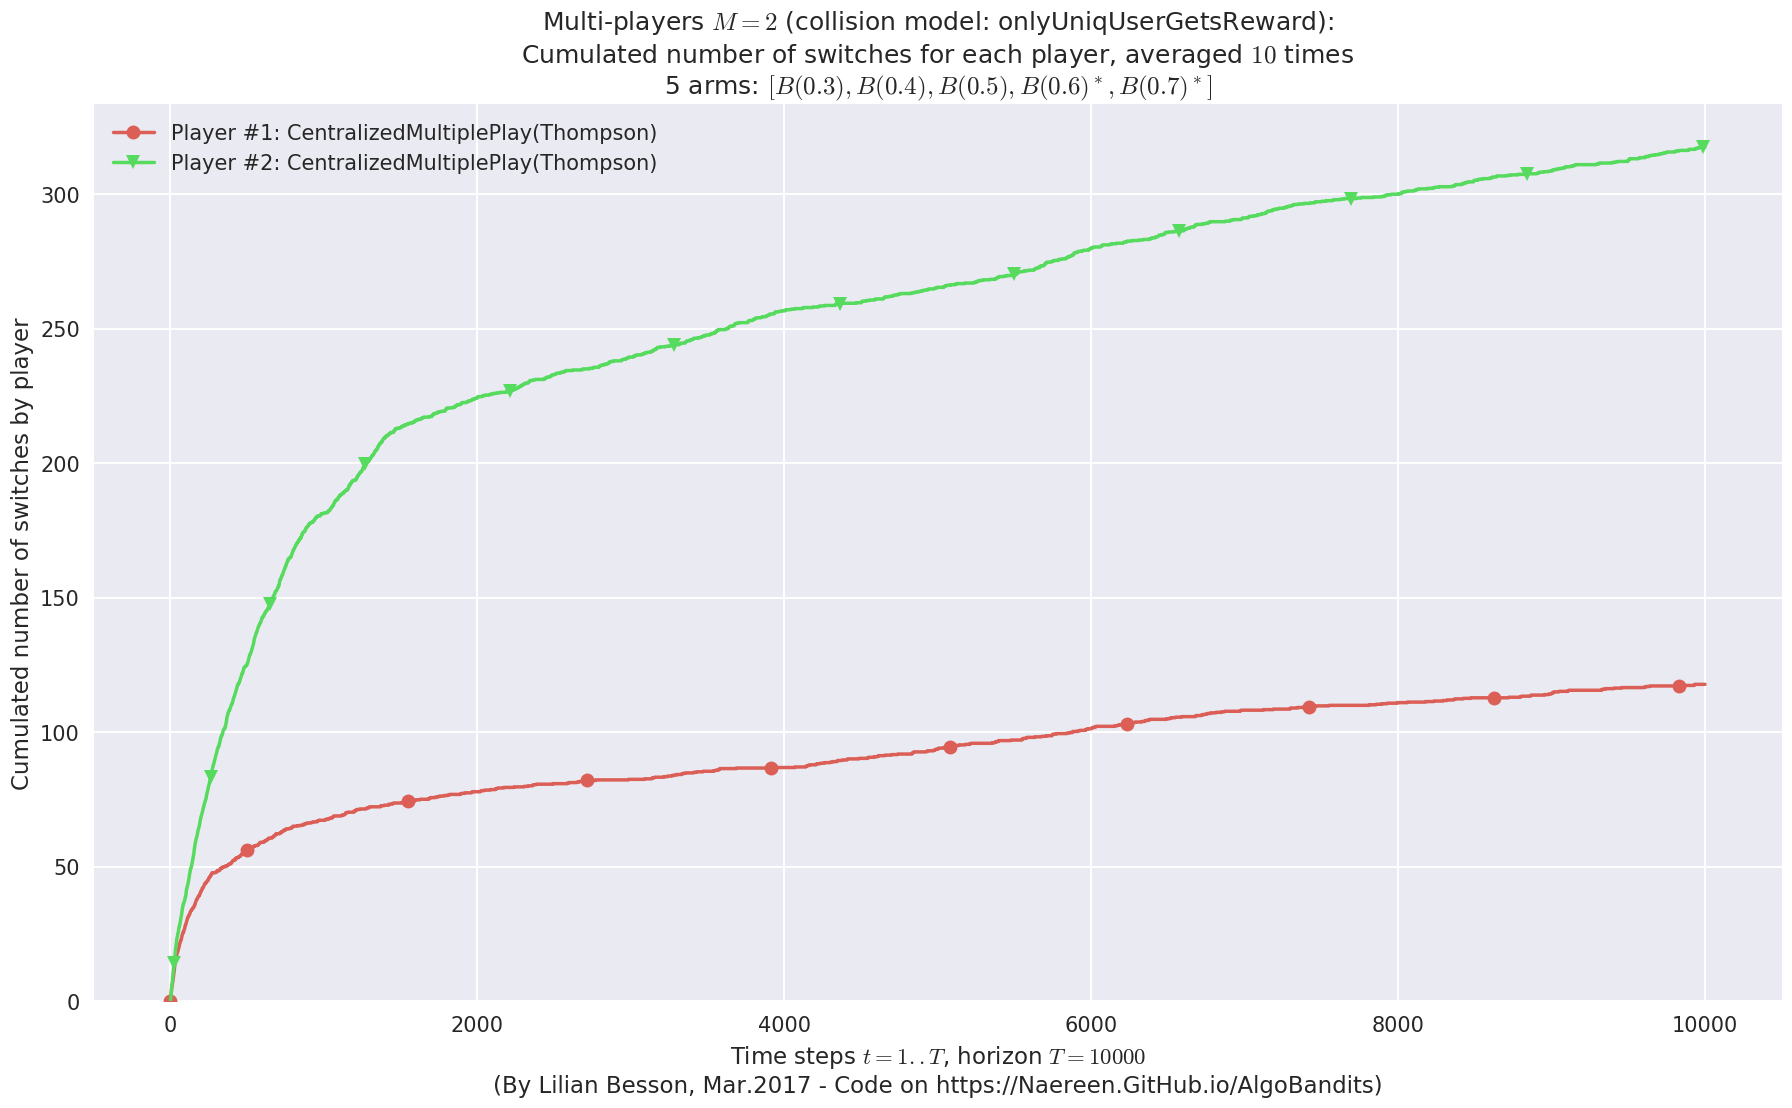

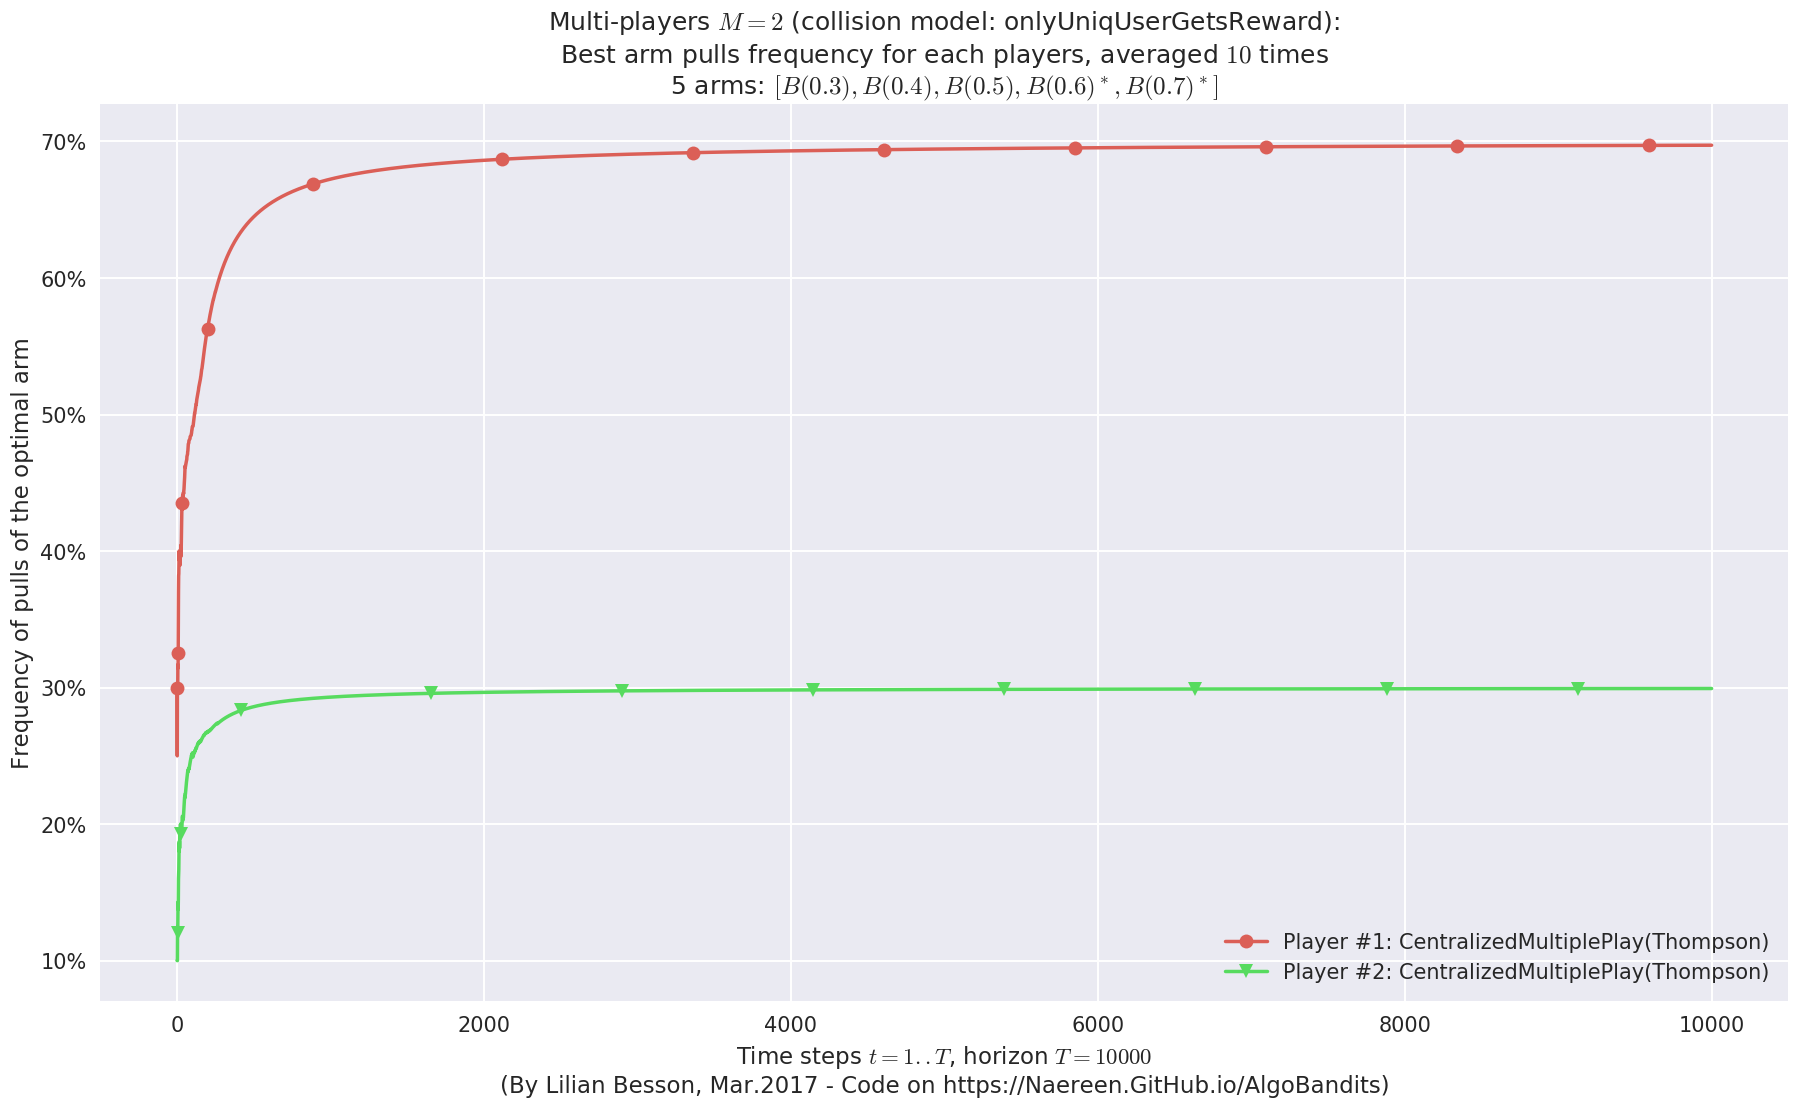


Final ranking for this environment #0 :
- Player #1, '#1<CentralizedIMP(Thompson)>'	was ranked	1 / 2 for this simulation (last rewards = 6677.3).
- Player #2, '#2<CentralizedIMP(Thompson)>'	was ranked	2 / 2 for this simulation (last rewards = 6261.4).


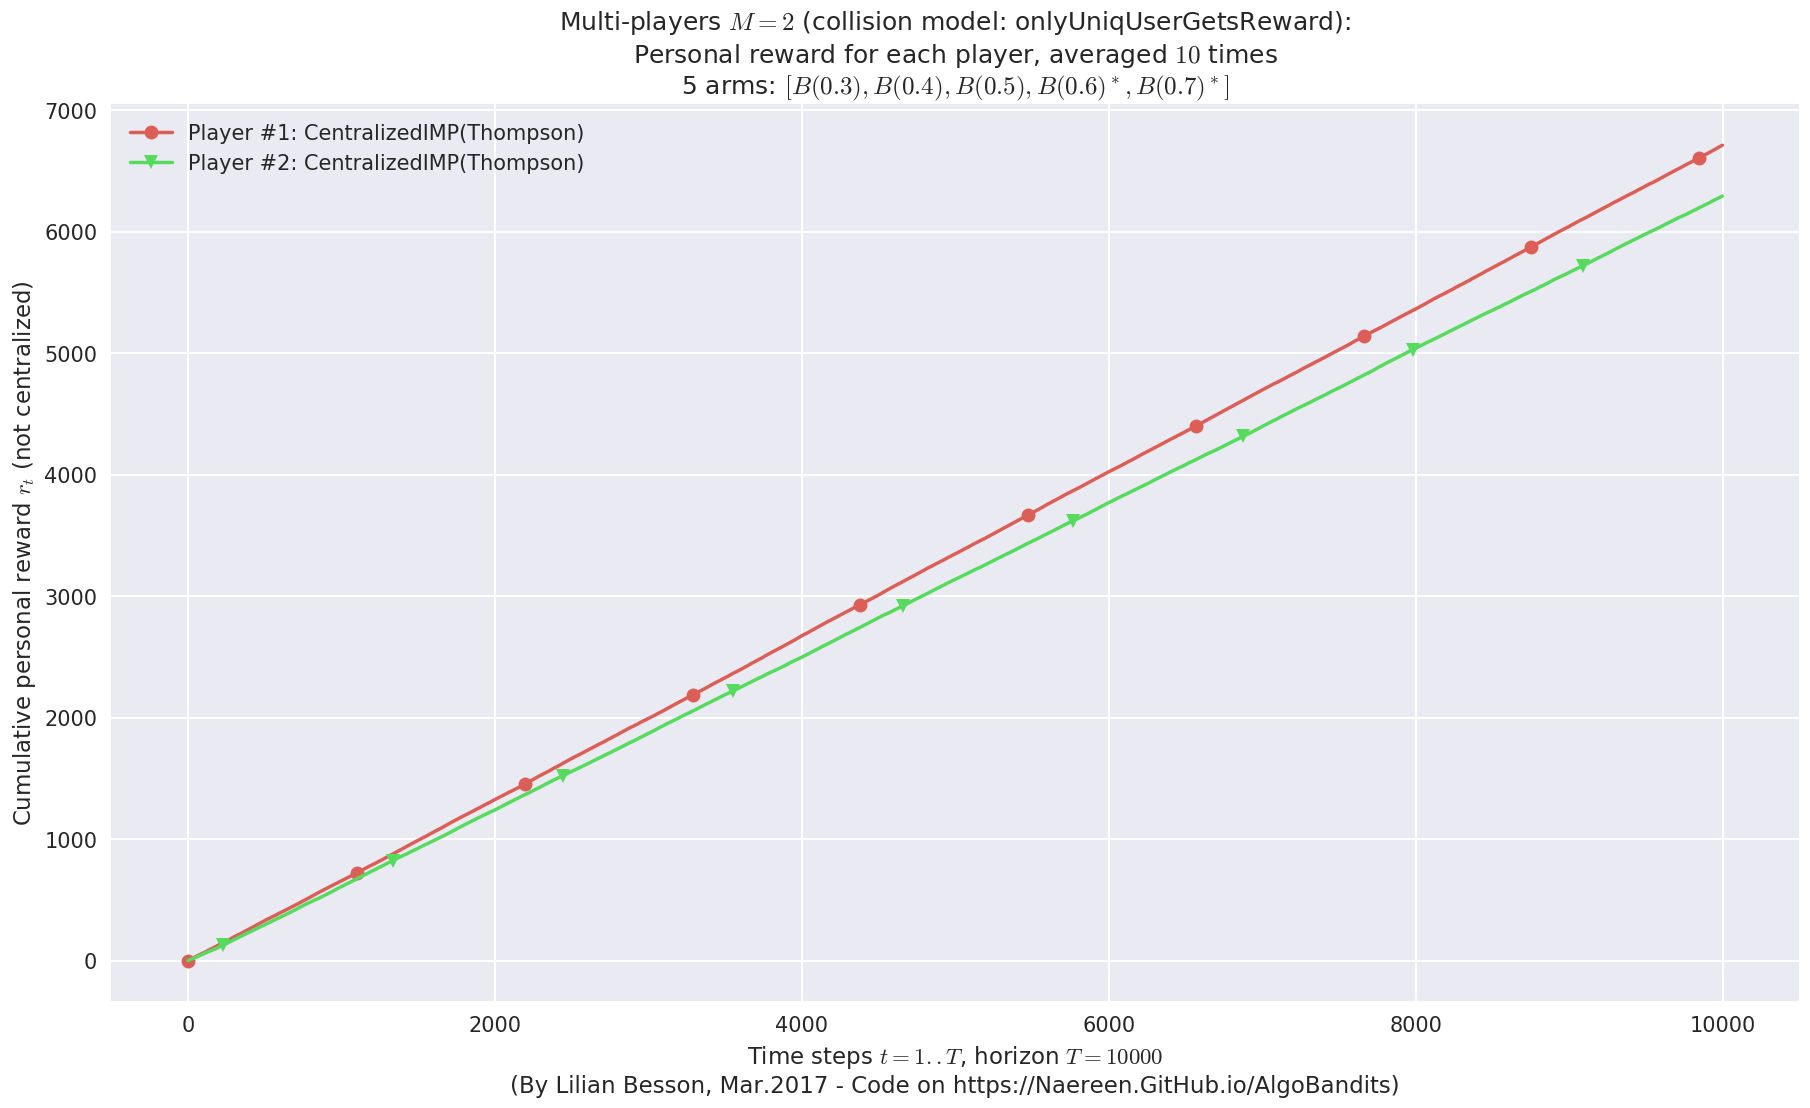

  - For 2 player, our lower bound gave = 18 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - Our lowerbound = 18,
 - [Anandkumar et al] lowerbound = 12.1


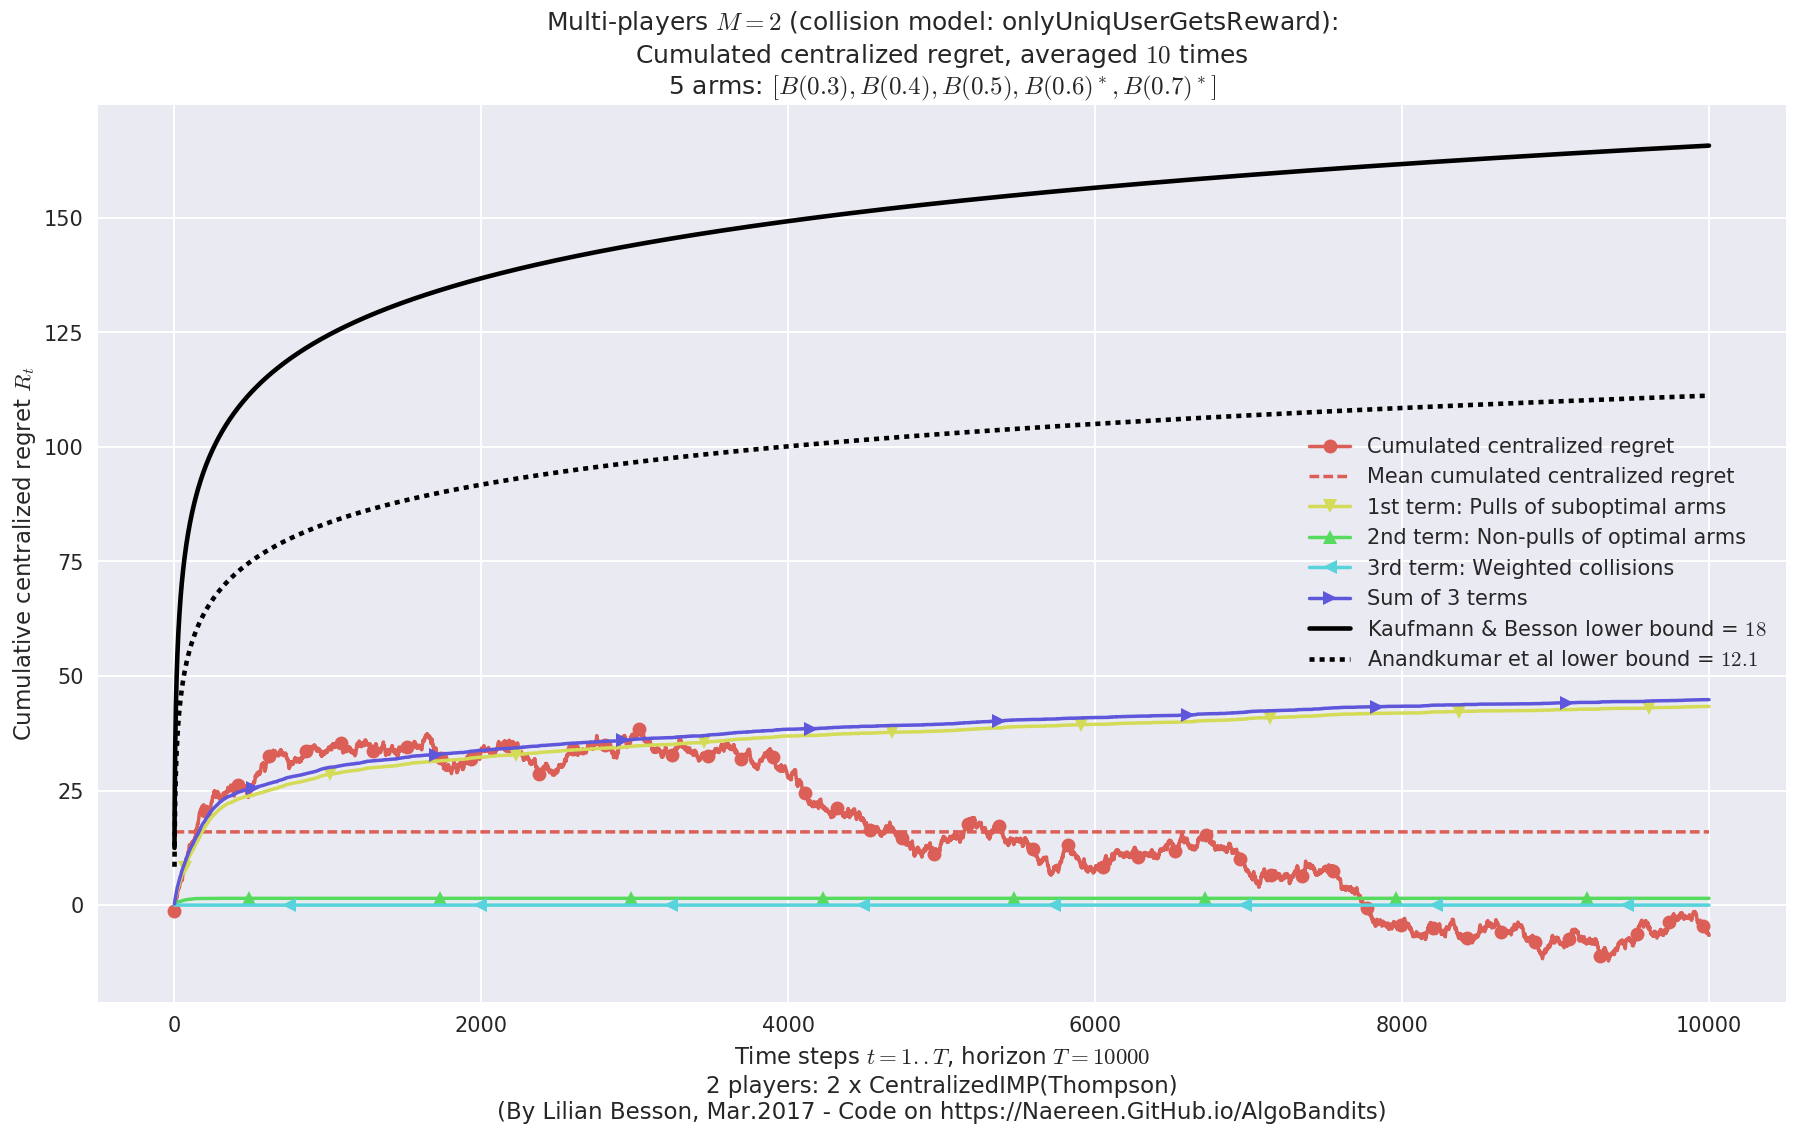

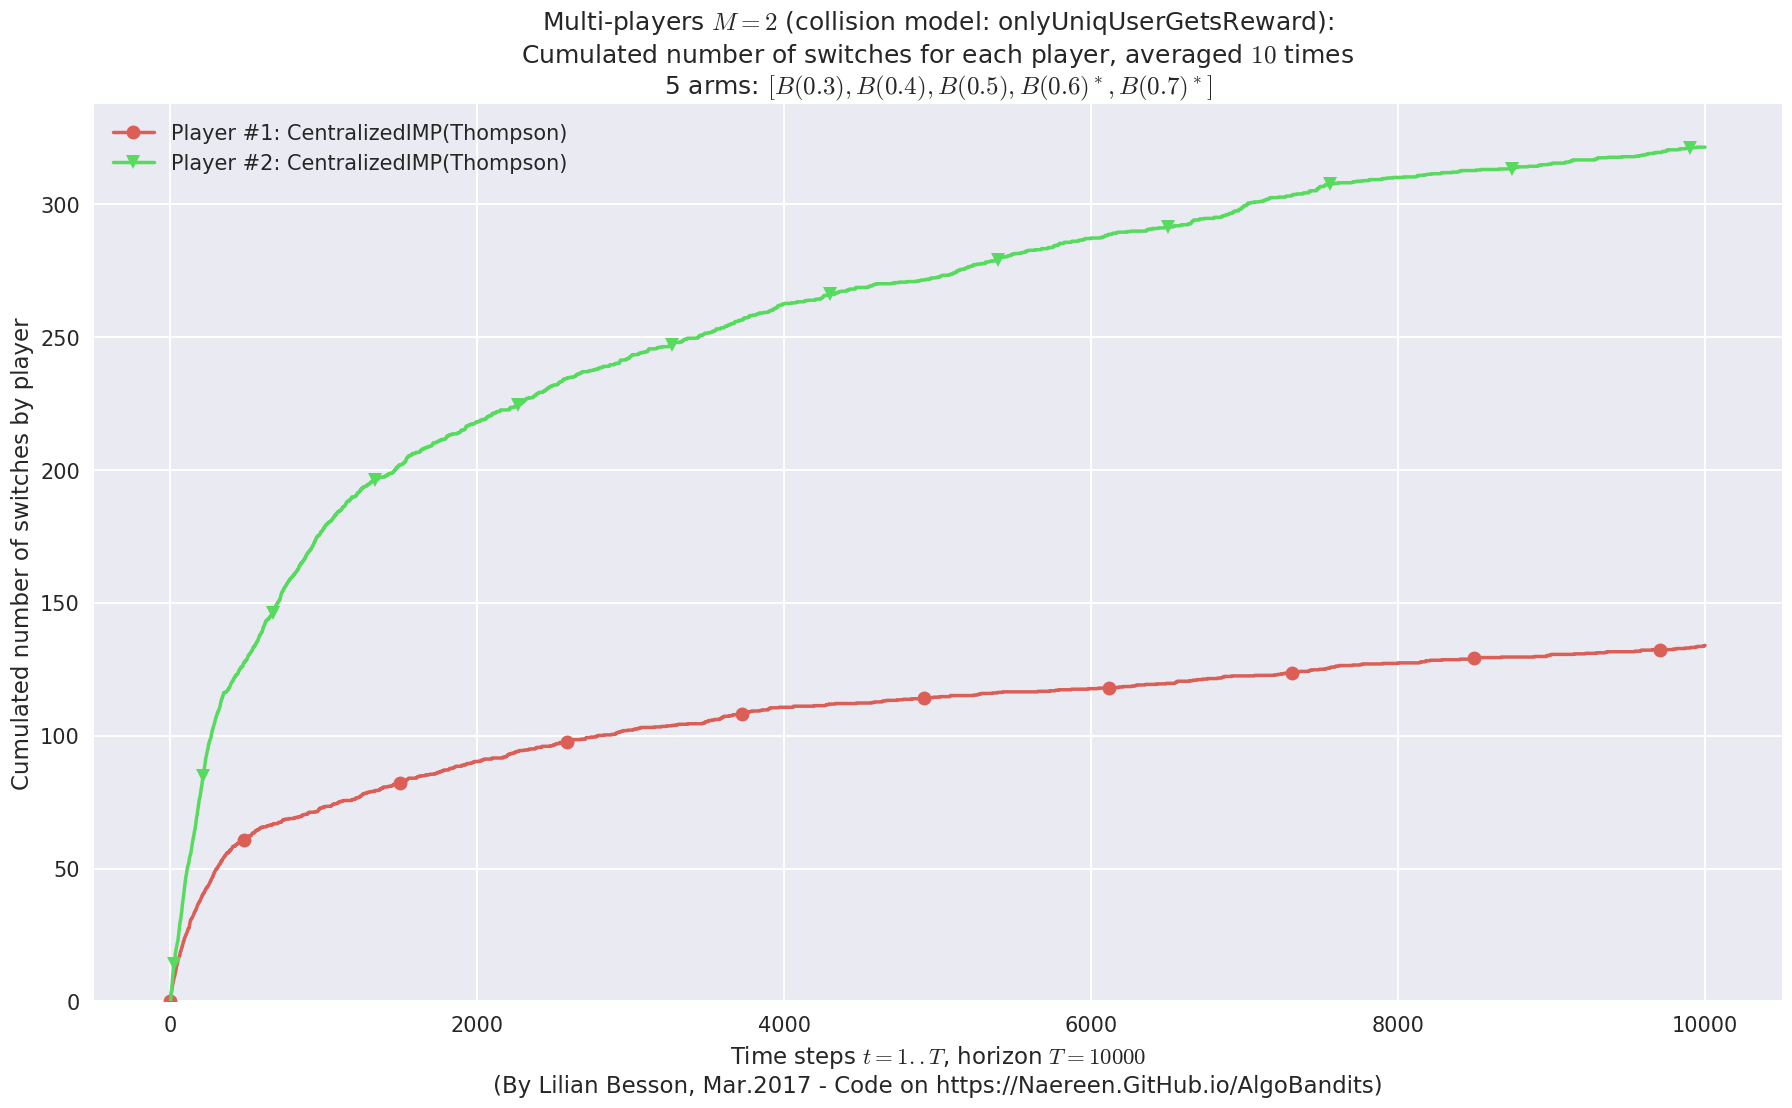

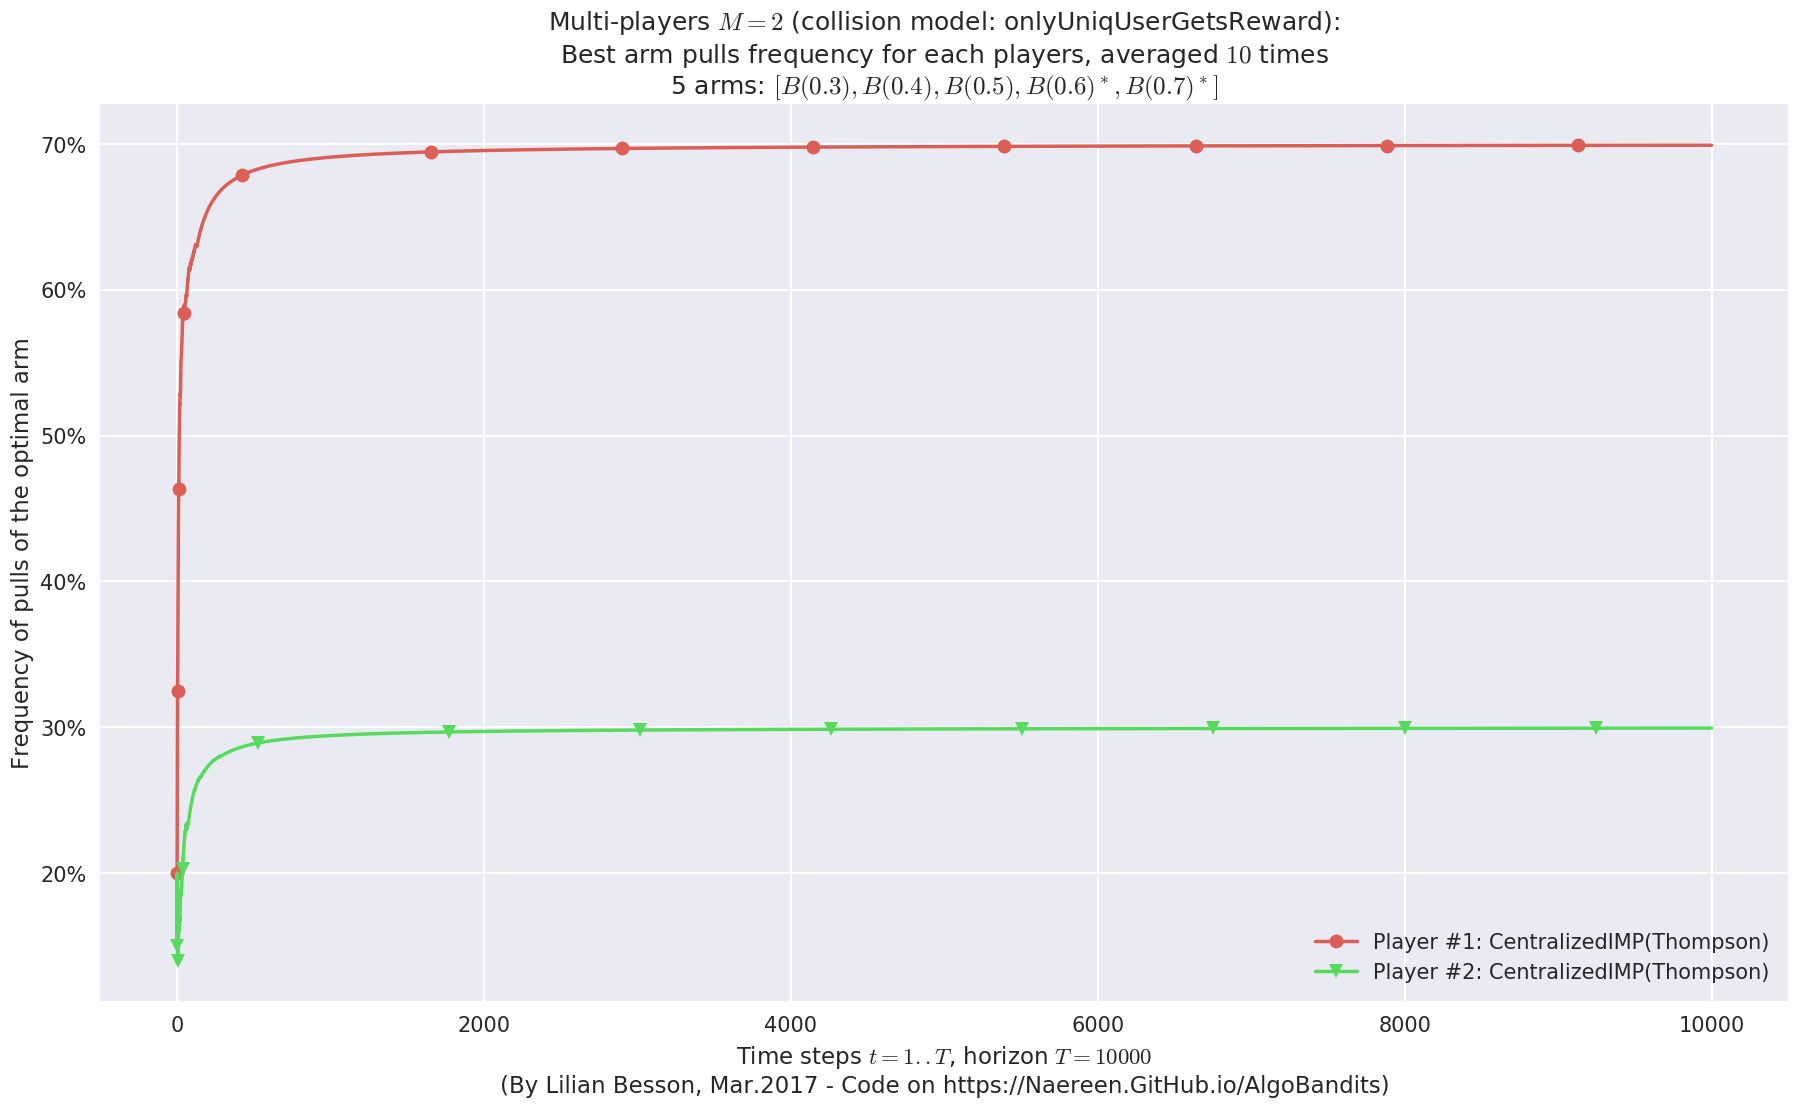

In [15]:
for playersId in tqdm(range(len(evs)), desc="Policies"):
    evaluation = evaluators[0][playersId]
    plotAll(evaluation, 0)

### Second problem
$\mu = [0.03, \dots, 0.03, 0.05, \dots, 0.05, 0.1, 0.12, 0.15]$ is an harder Bernoulli problem.


Final ranking for this environment #1 :
- Player #2, '#2<CentralizedMultiplePlay(UCB($\alpha=1$))>'	was ranked	1 / 2 for this simulation (last rewards = 4449.7).
- Player #1, '#1<CentralizedMultiplePlay(UCB($\alpha=1$))>'	was ranked	2 / 2 for this simulation (last rewards = 4428.2).


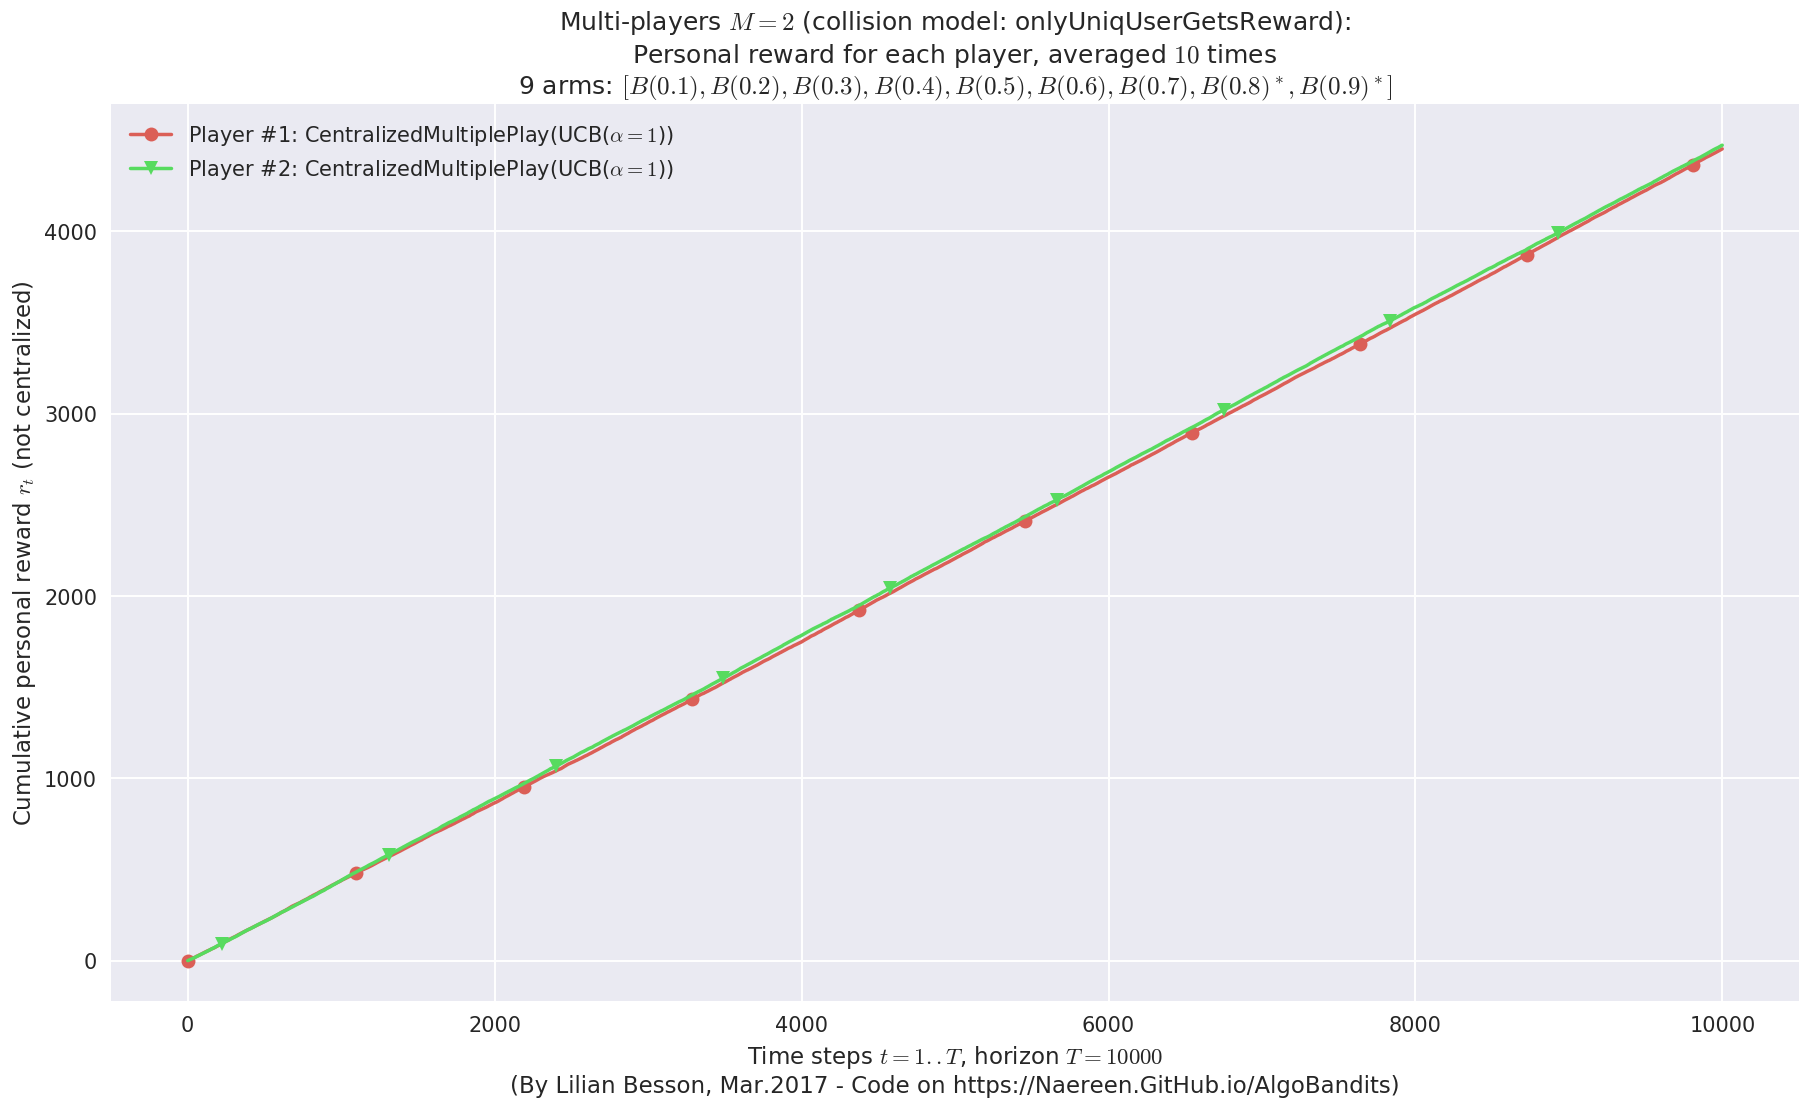

  - For 2 player, our lower bound gave = 20.1 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 13.8 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 48.89% ...
 - Our lowerbound = 20.1,
 - [Anandkumar et al] lowerbound = 13.8


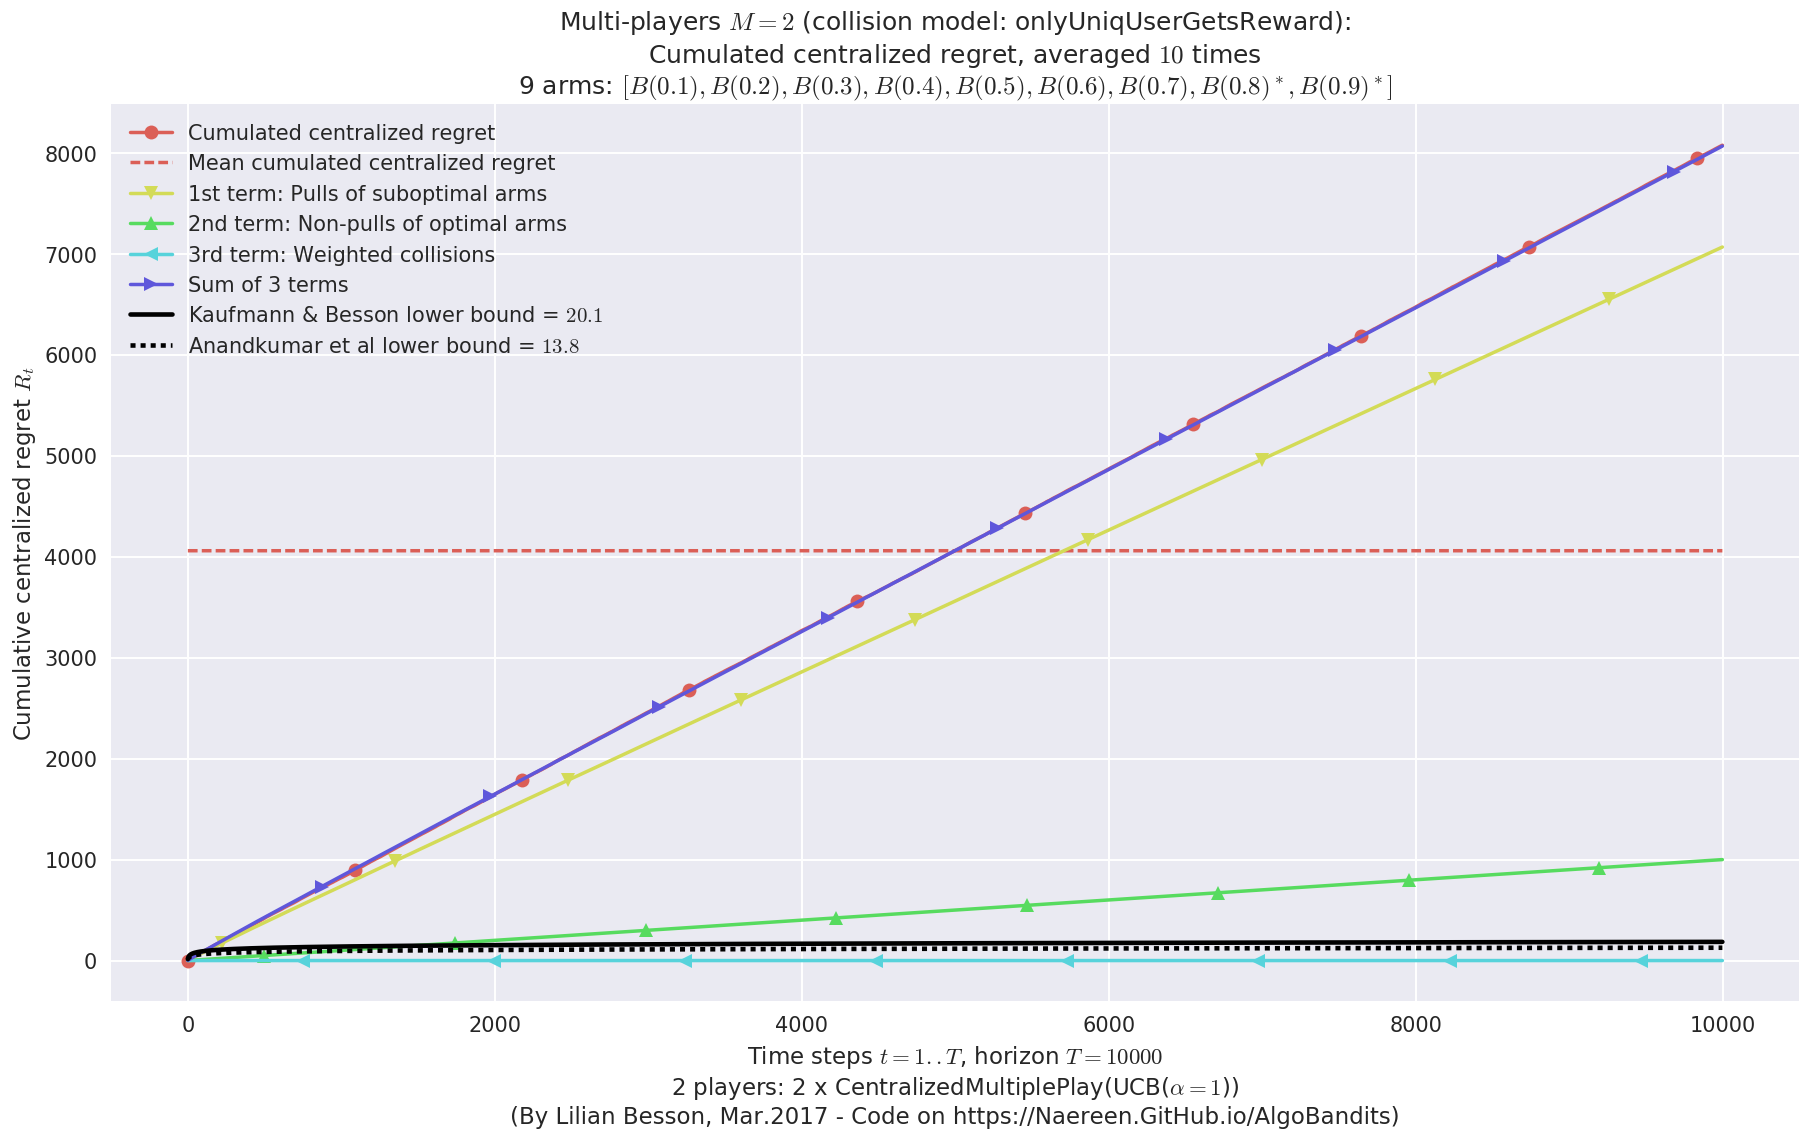

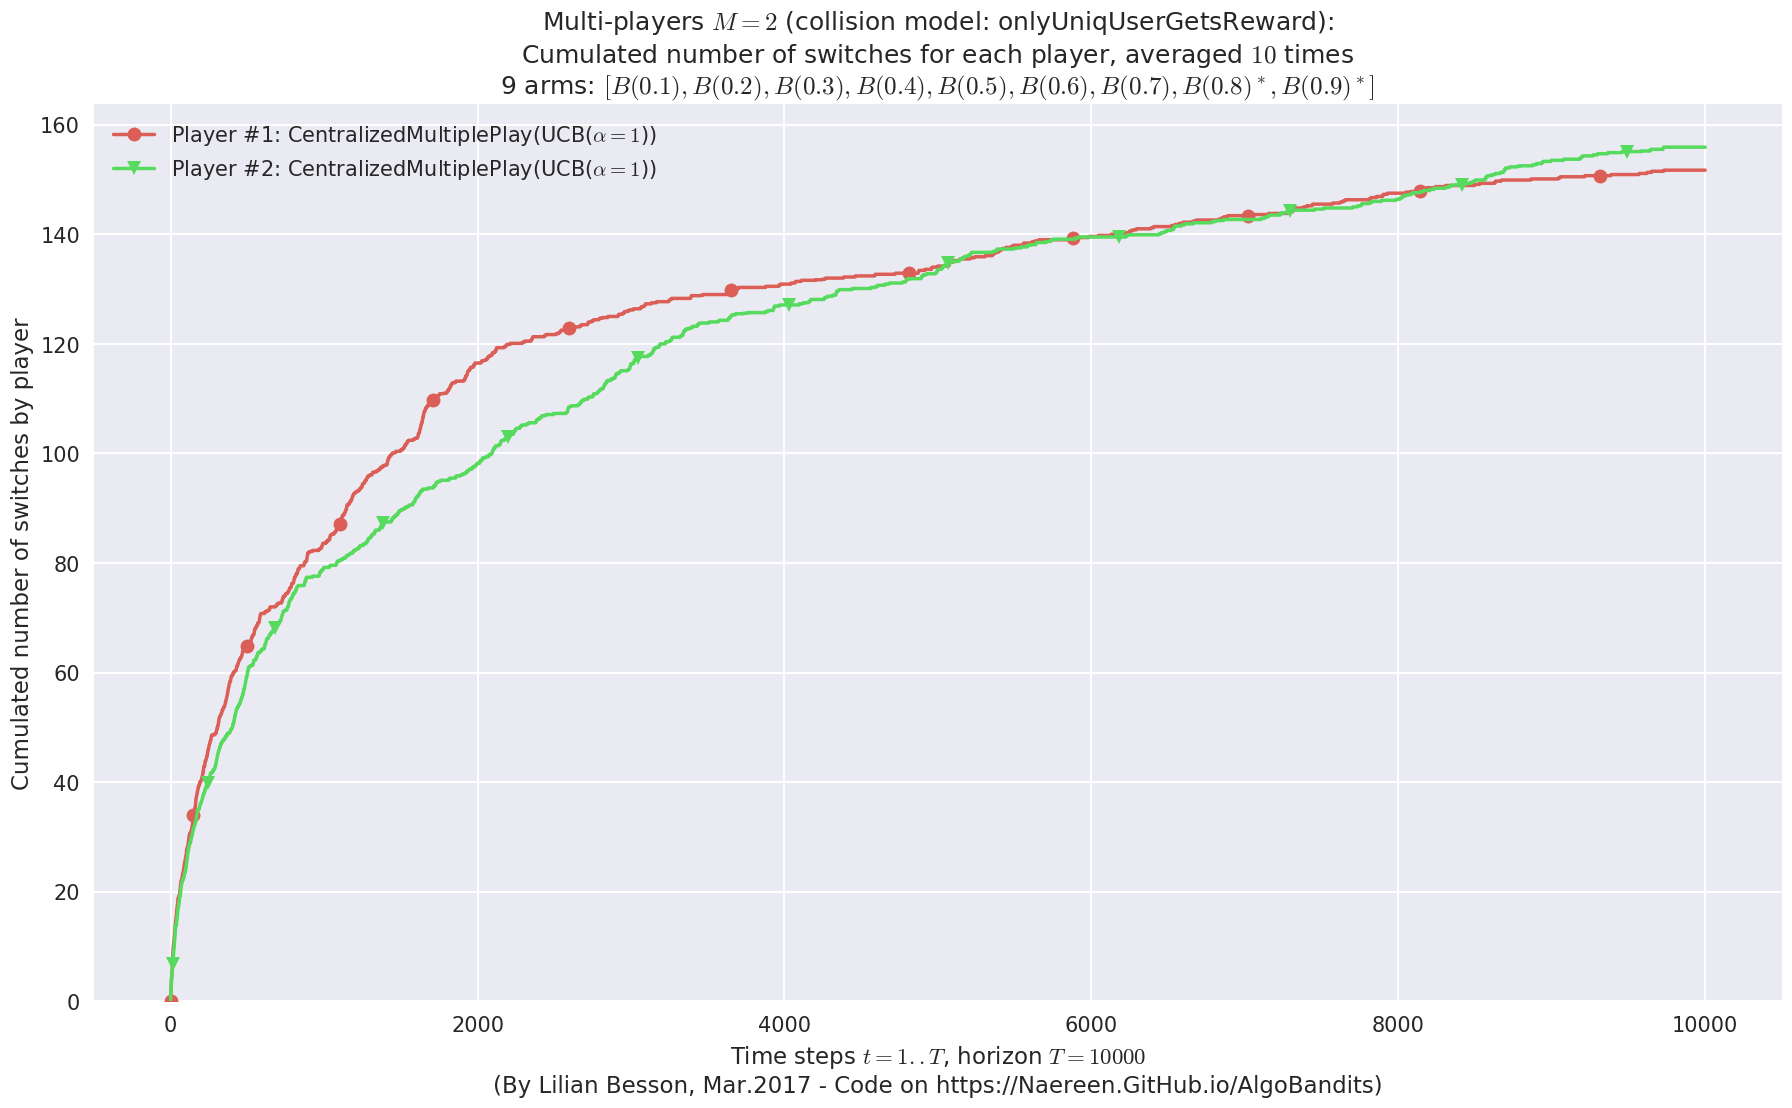

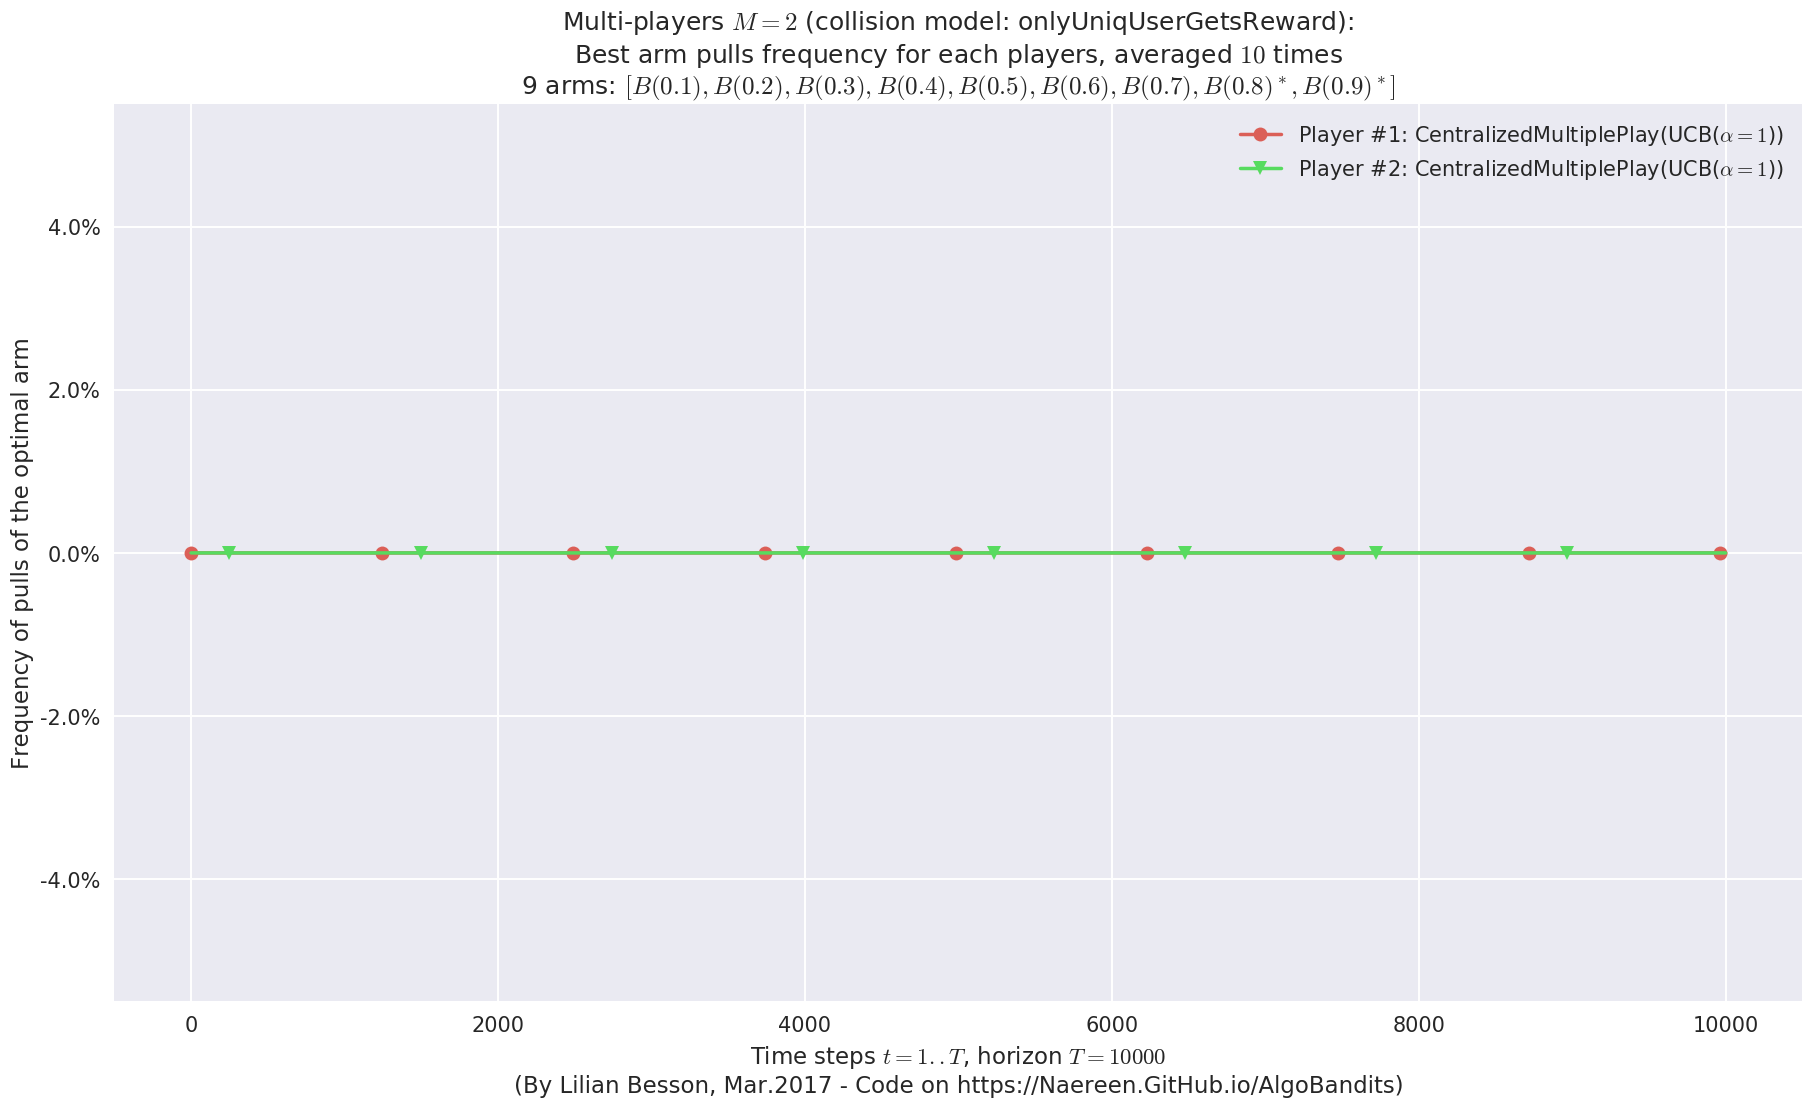


Final ranking for this environment #1 :
- Player #2, '#2<CentralizedIMP(UCB($\alpha=1$))>'	was ranked	1 / 2 for this simulation (last rewards = 4547.8).
- Player #1, '#1<CentralizedIMP(UCB($\alpha=1$))>'	was ranked	2 / 2 for this simulation (last rewards = 4321.4).


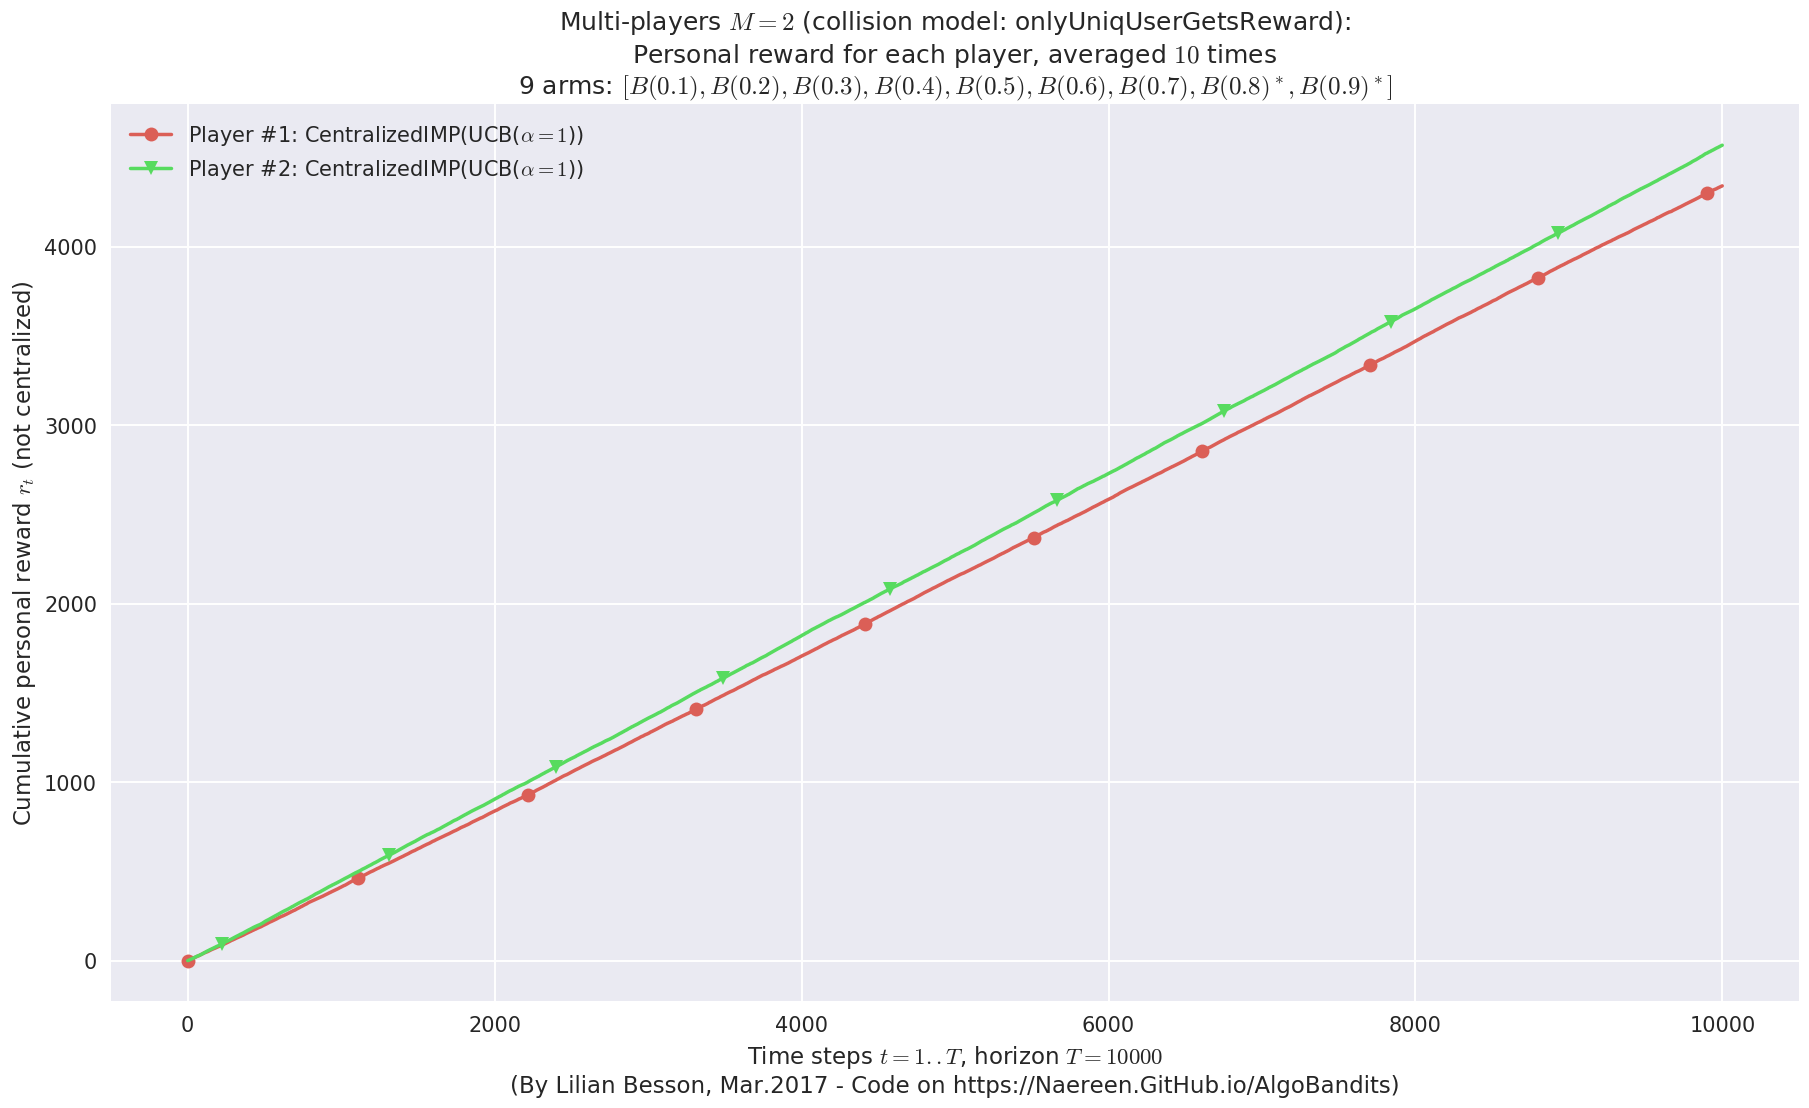

  - For 2 player, our lower bound gave = 20.1 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 13.8 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 48.89% ...
 - Our lowerbound = 20.1,
 - [Anandkumar et al] lowerbound = 13.8


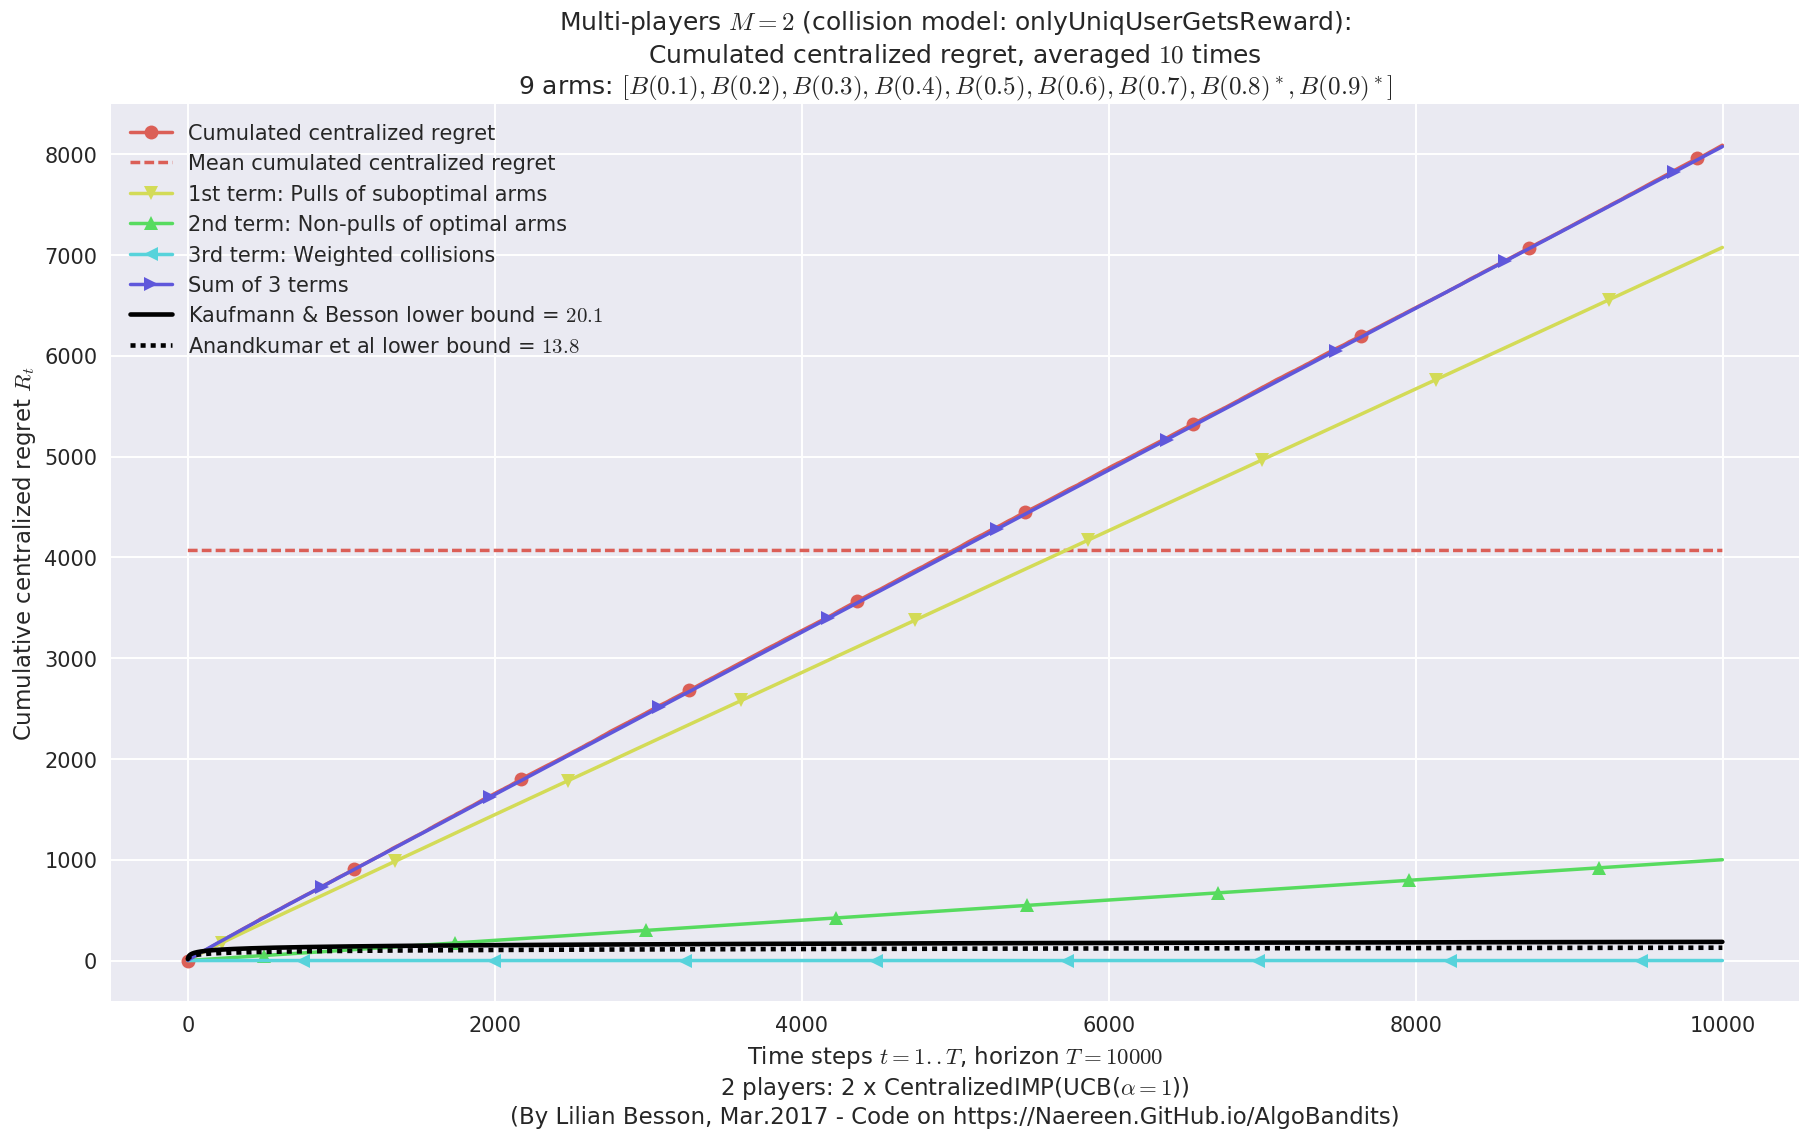

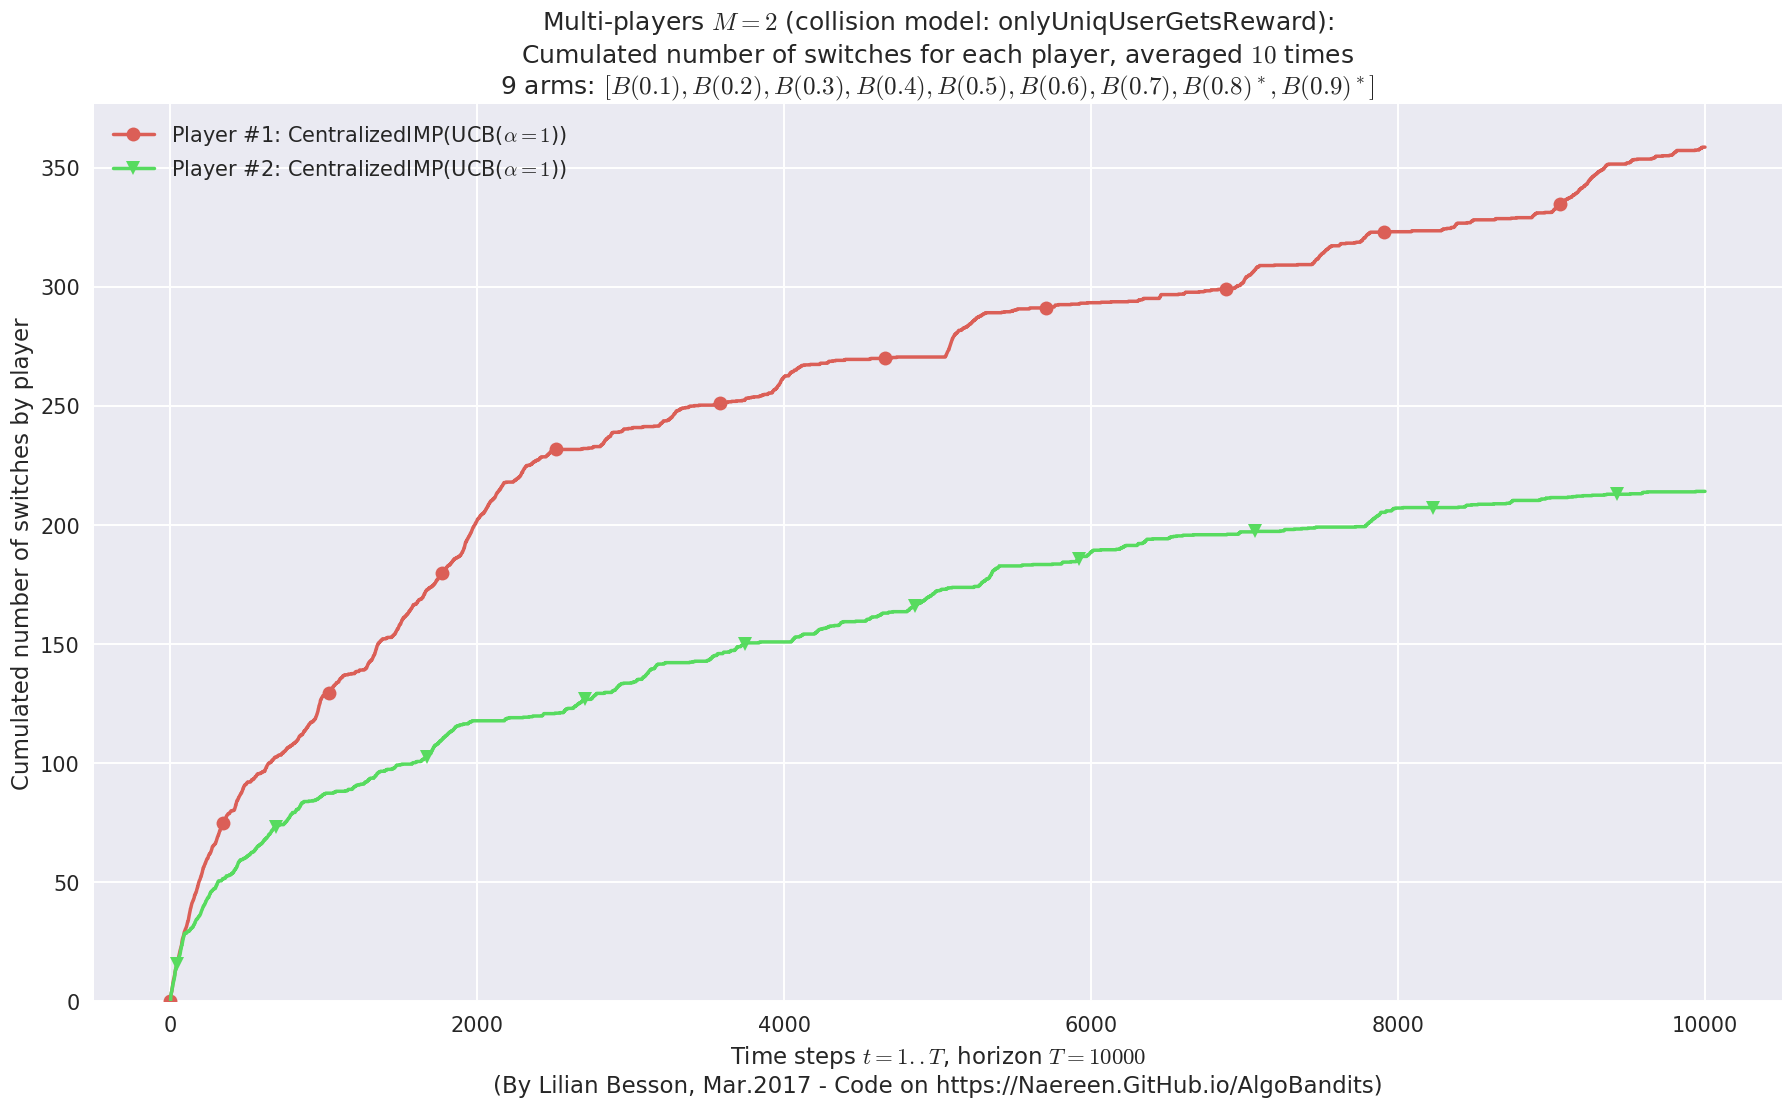

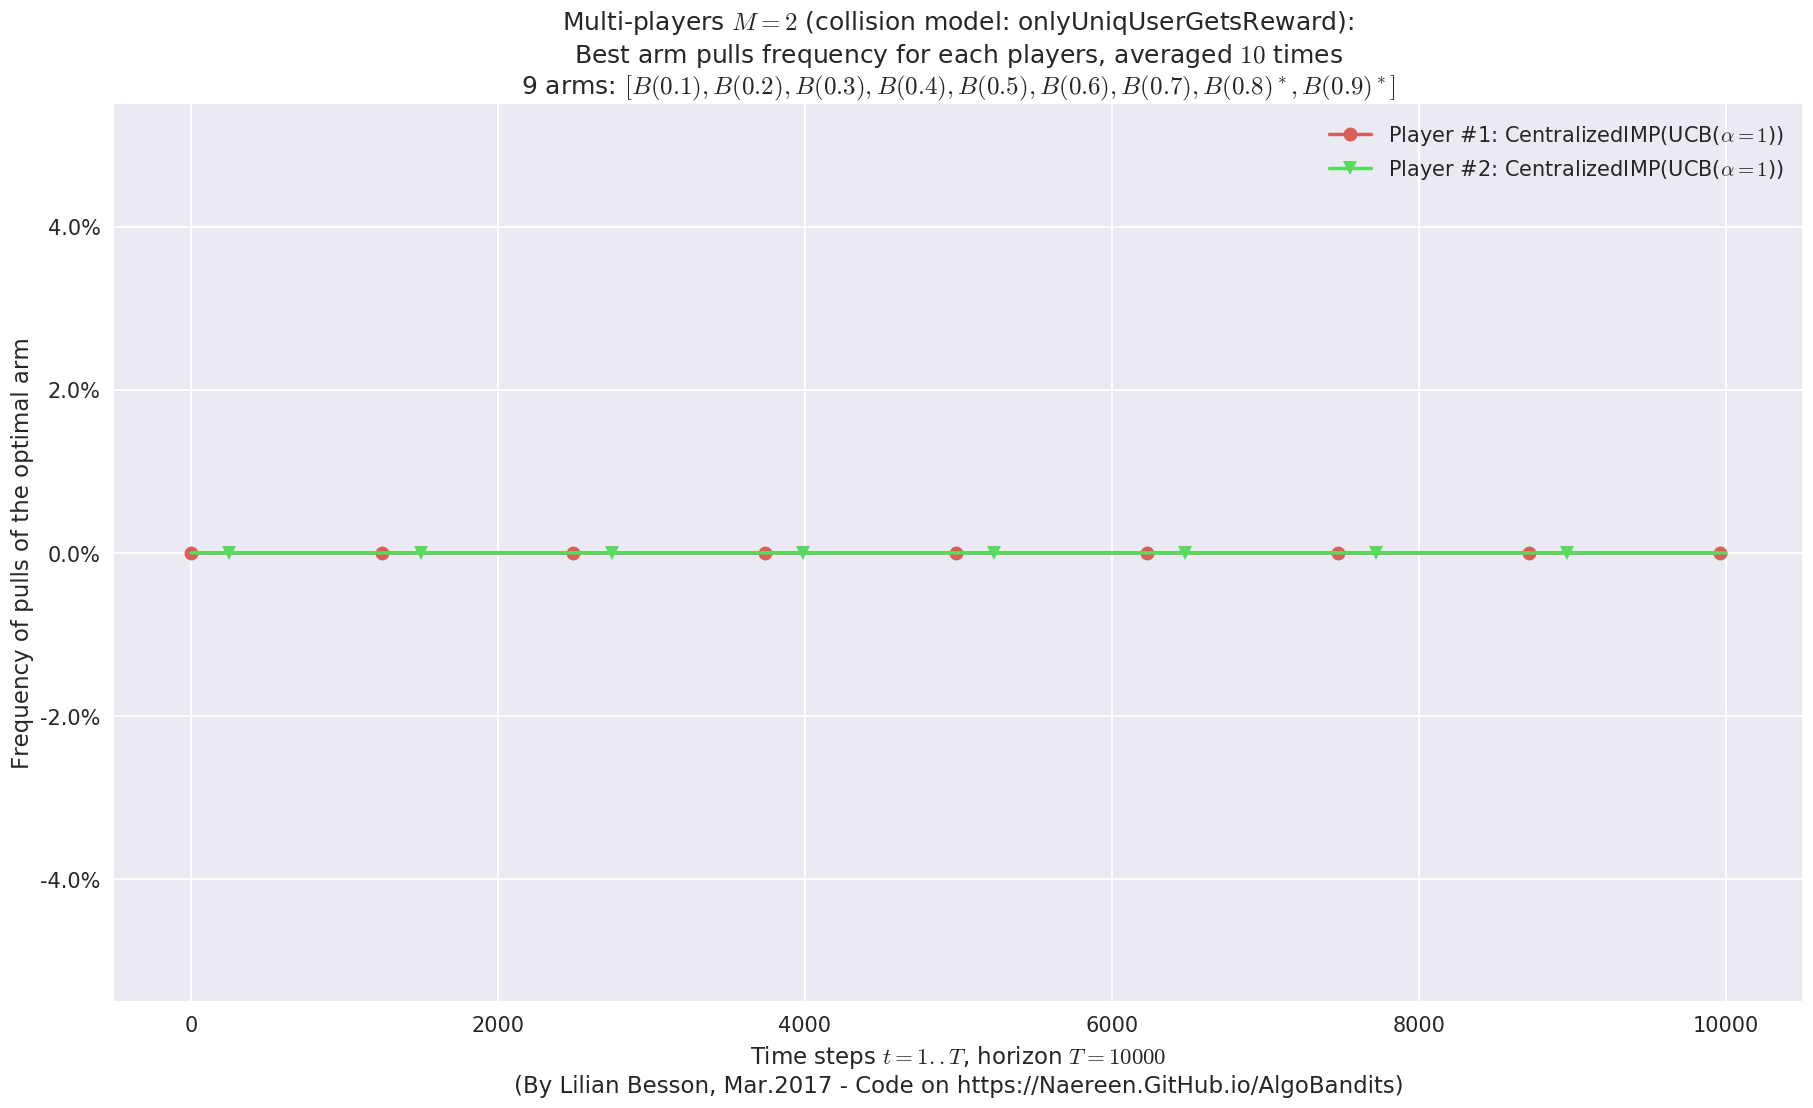


Final ranking for this environment #1 :
- Player #1, '#1<CentralizedMultiplePlay(Thompson)>'	was ranked	1 / 2 for this simulation (last rewards = 4684).
- Player #2, '#2<CentralizedMultiplePlay(Thompson)>'	was ranked	2 / 2 for this simulation (last rewards = 4270.3).


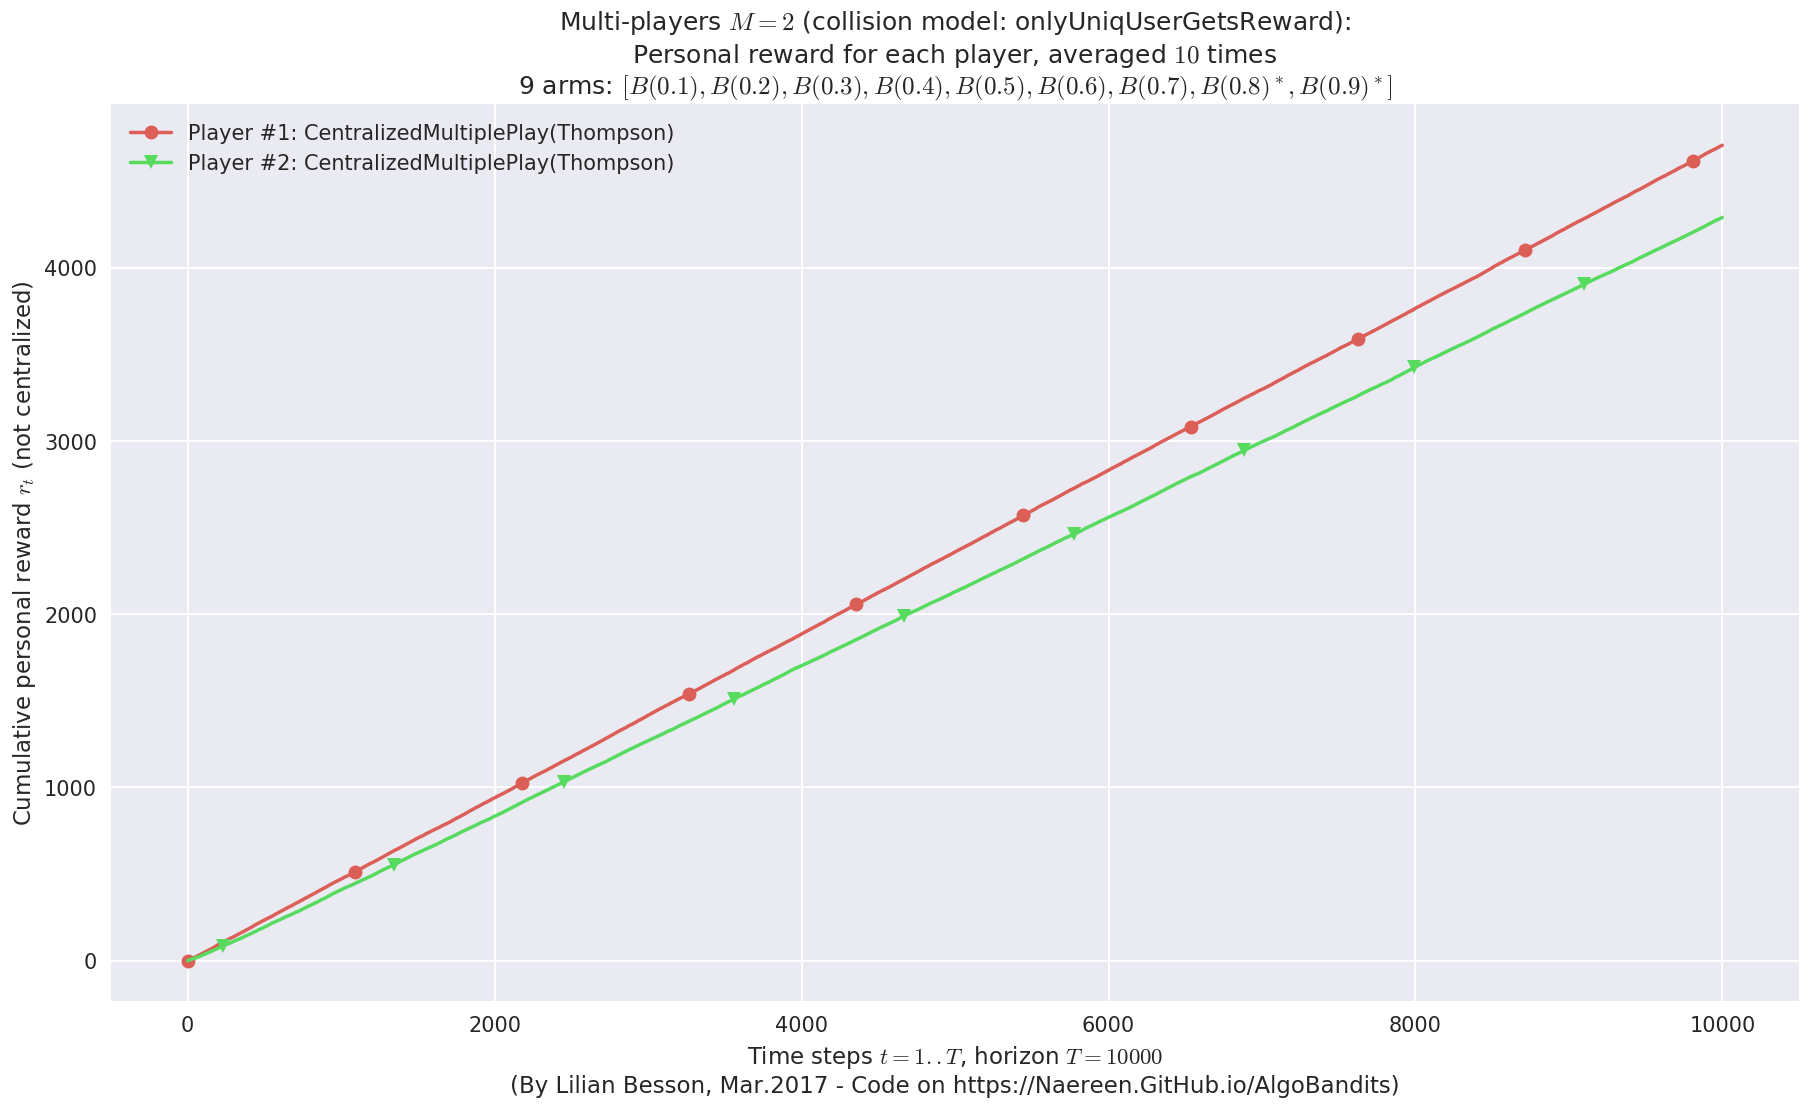

  - For 2 player, our lower bound gave = 20.1 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 13.8 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 48.89% ...
 - Our lowerbound = 20.1,
 - [Anandkumar et al] lowerbound = 13.8


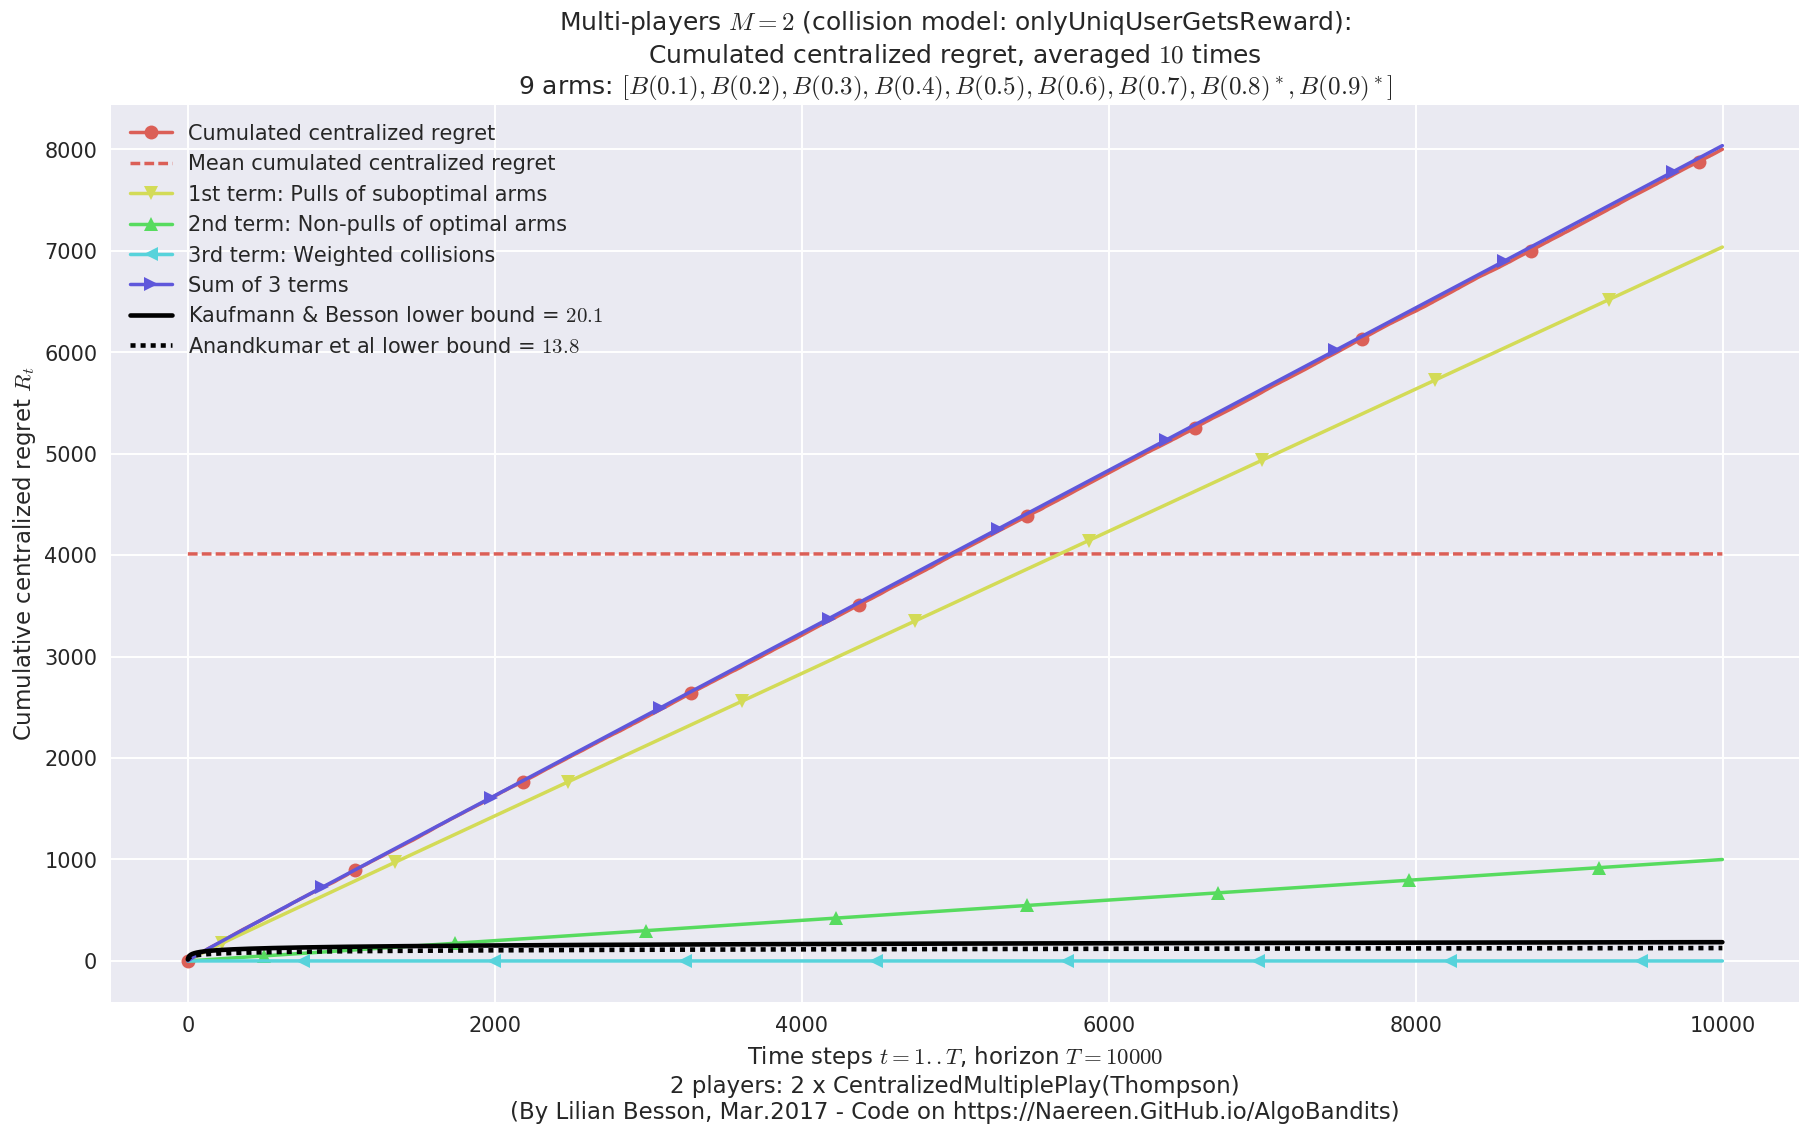

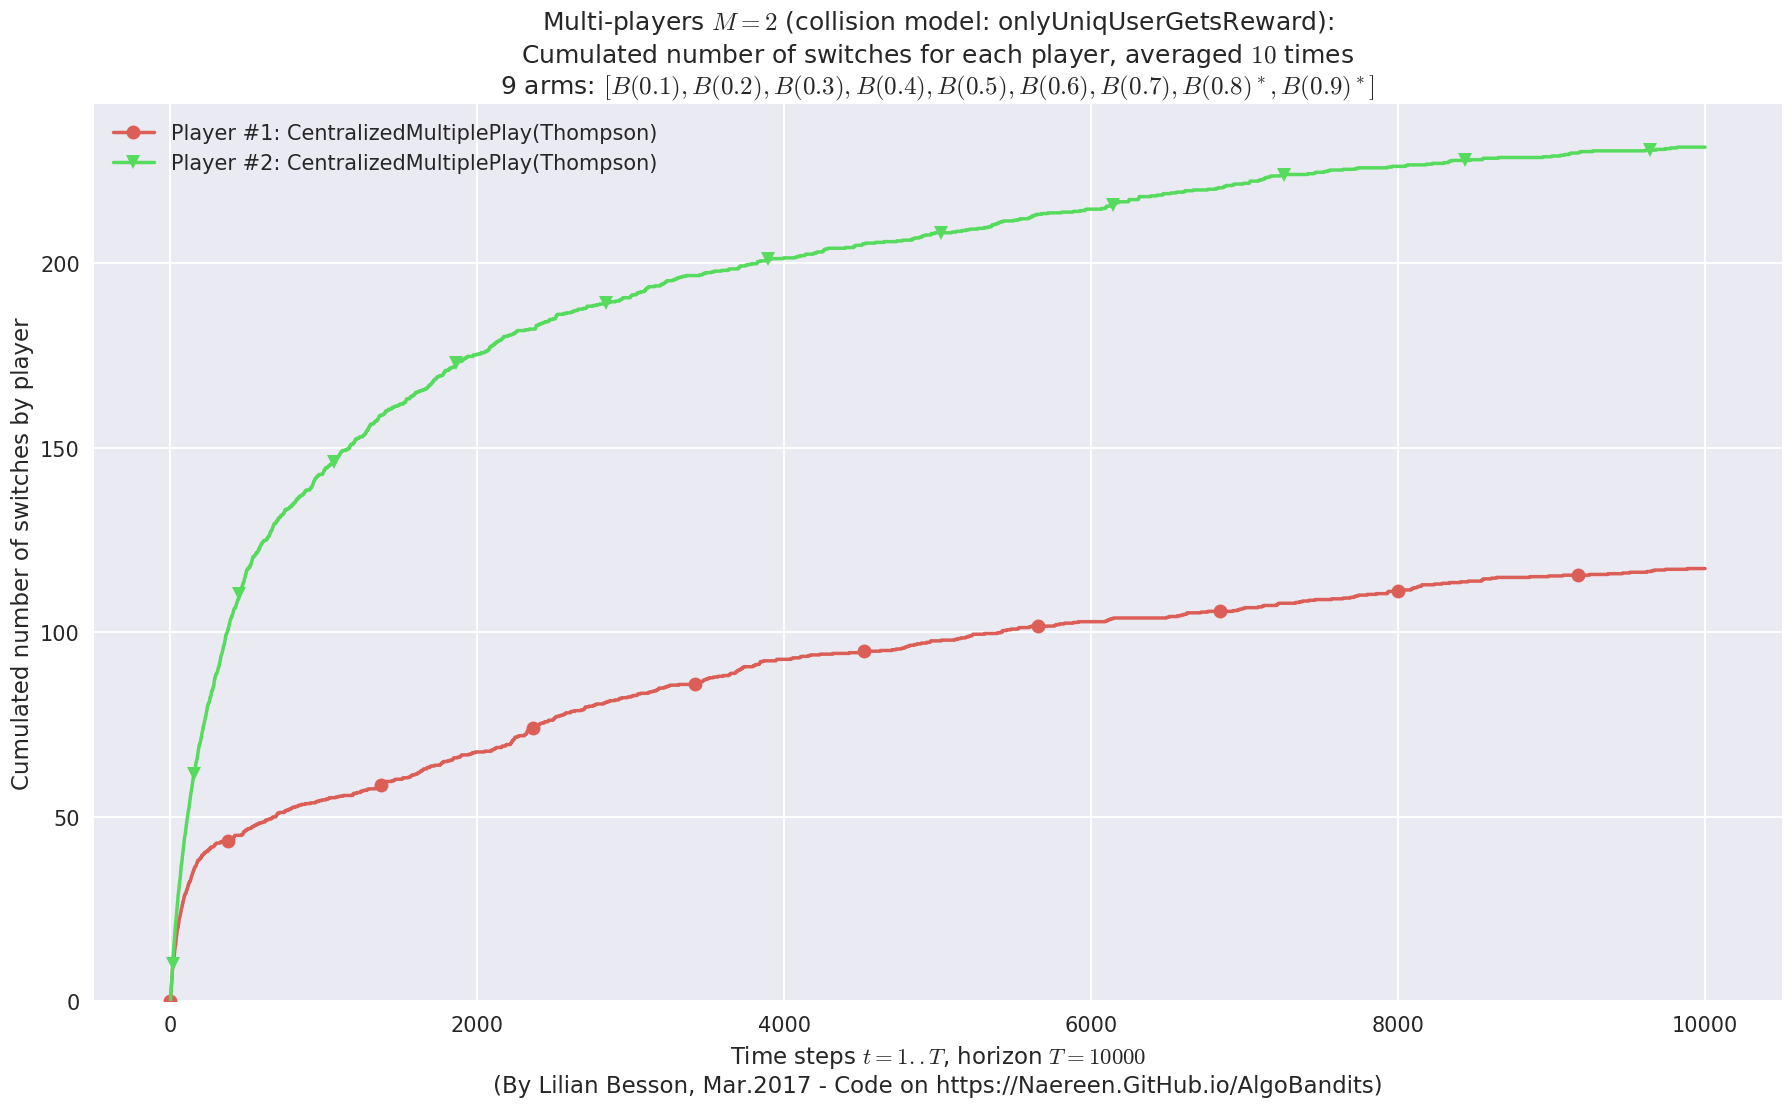

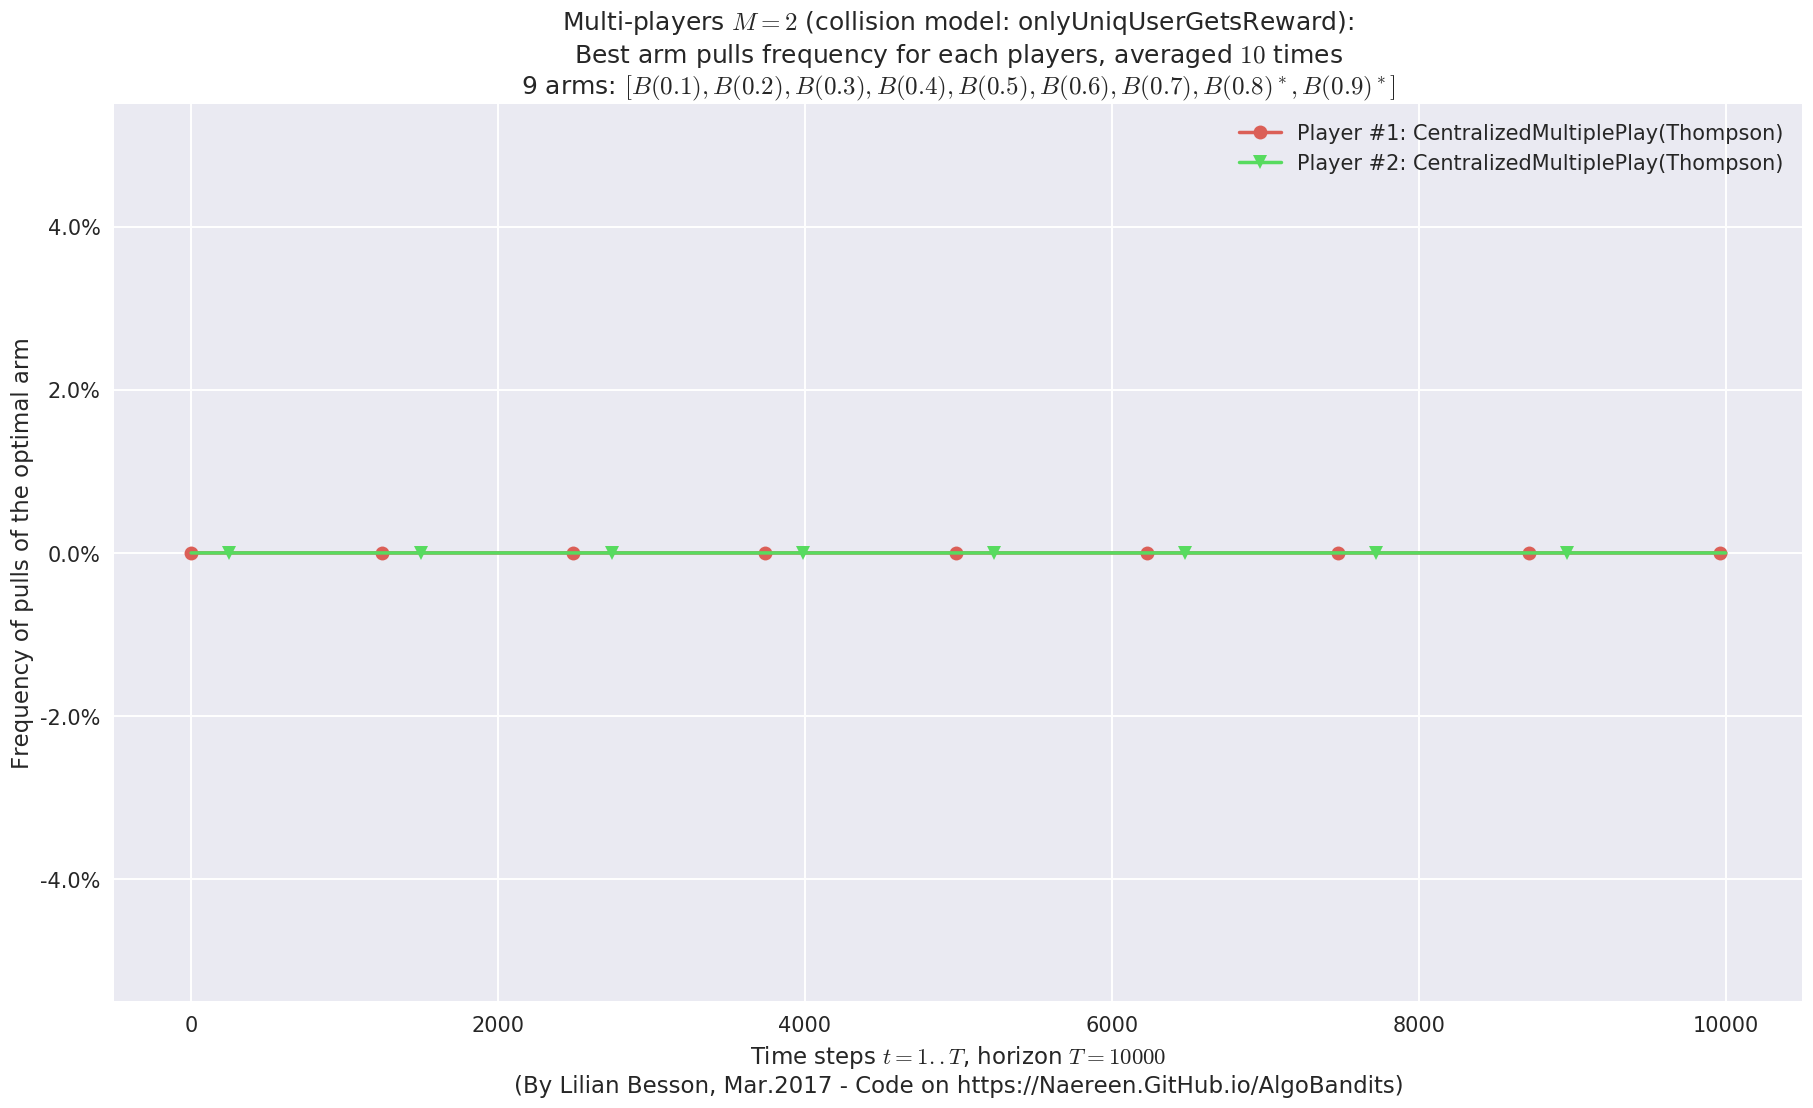


Final ranking for this environment #1 :
- Player #2, '#2<CentralizedIMP(Thompson)>'	was ranked	1 / 2 for this simulation (last rewards = 4670).
- Player #1, '#1<CentralizedIMP(Thompson)>'	was ranked	2 / 2 for this simulation (last rewards = 4249.1).


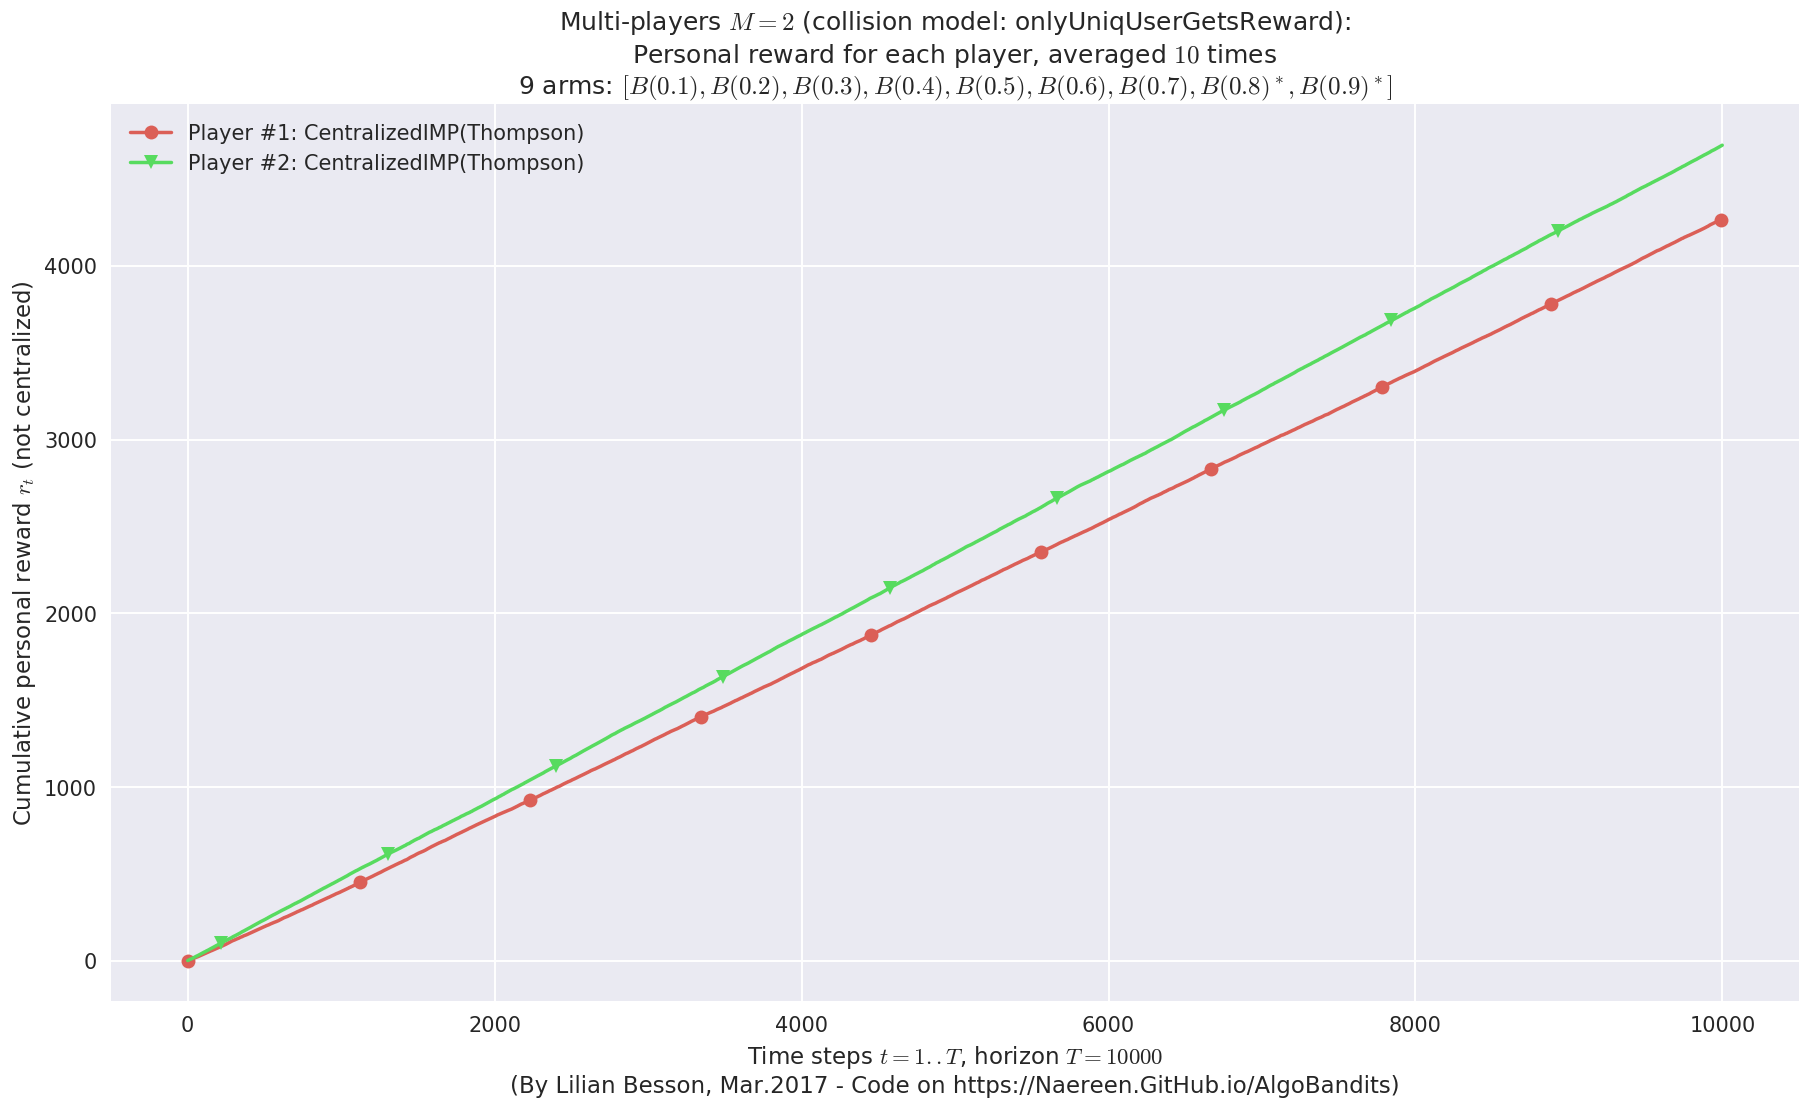

  - For 2 player, our lower bound gave = 20.1 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 13.8 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 48.89% ...
 - Our lowerbound = 20.1,
 - [Anandkumar et al] lowerbound = 13.8


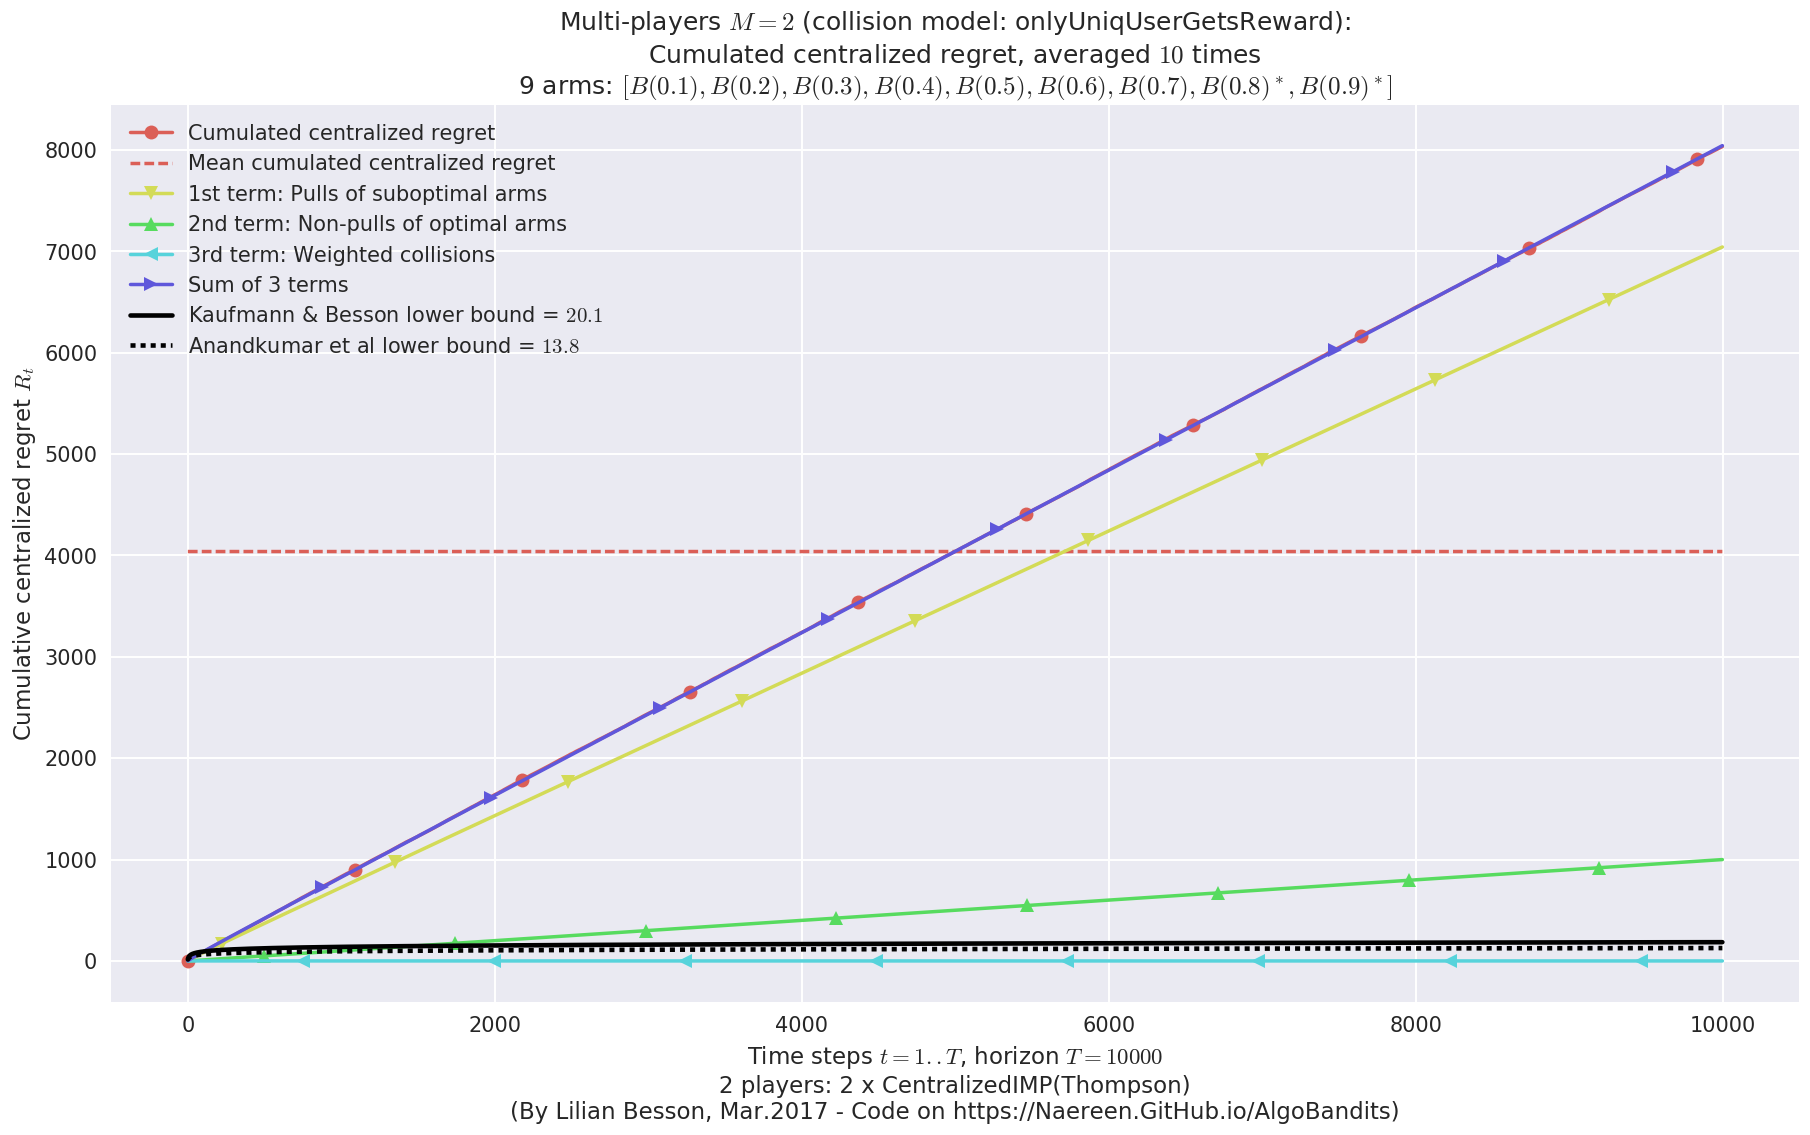

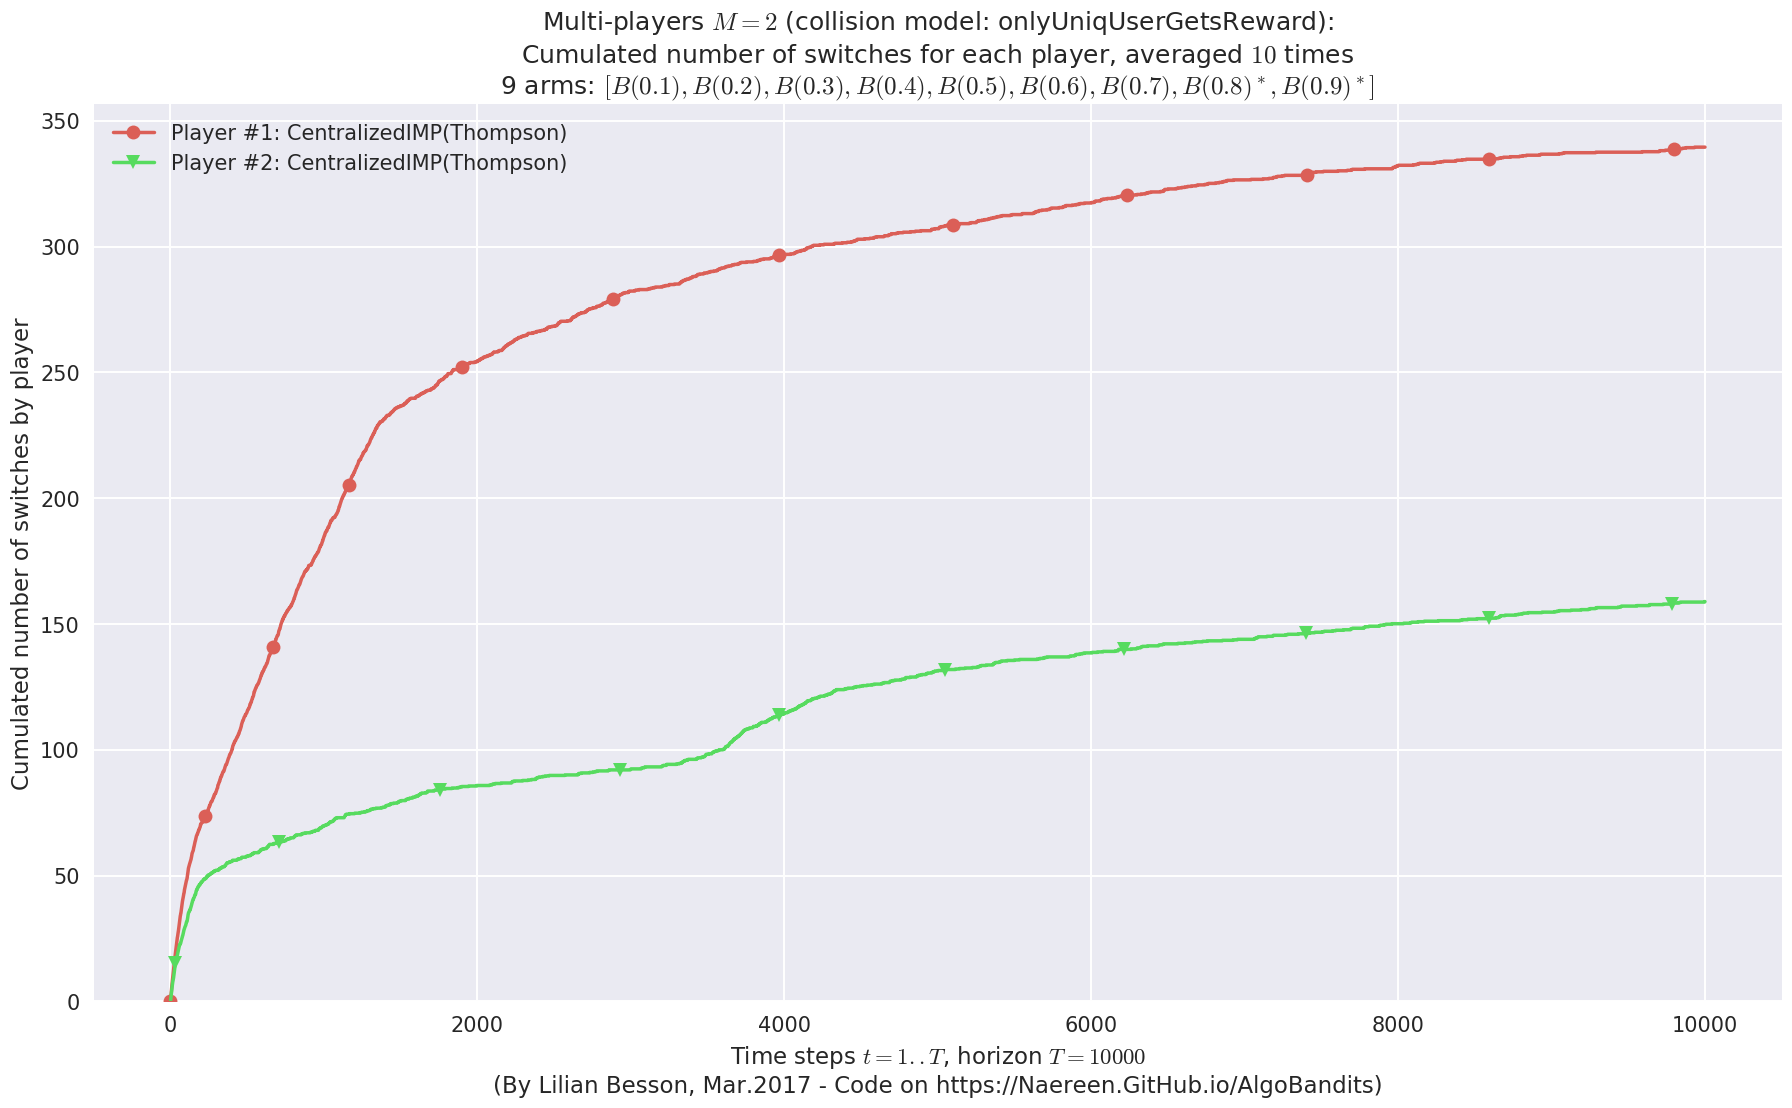

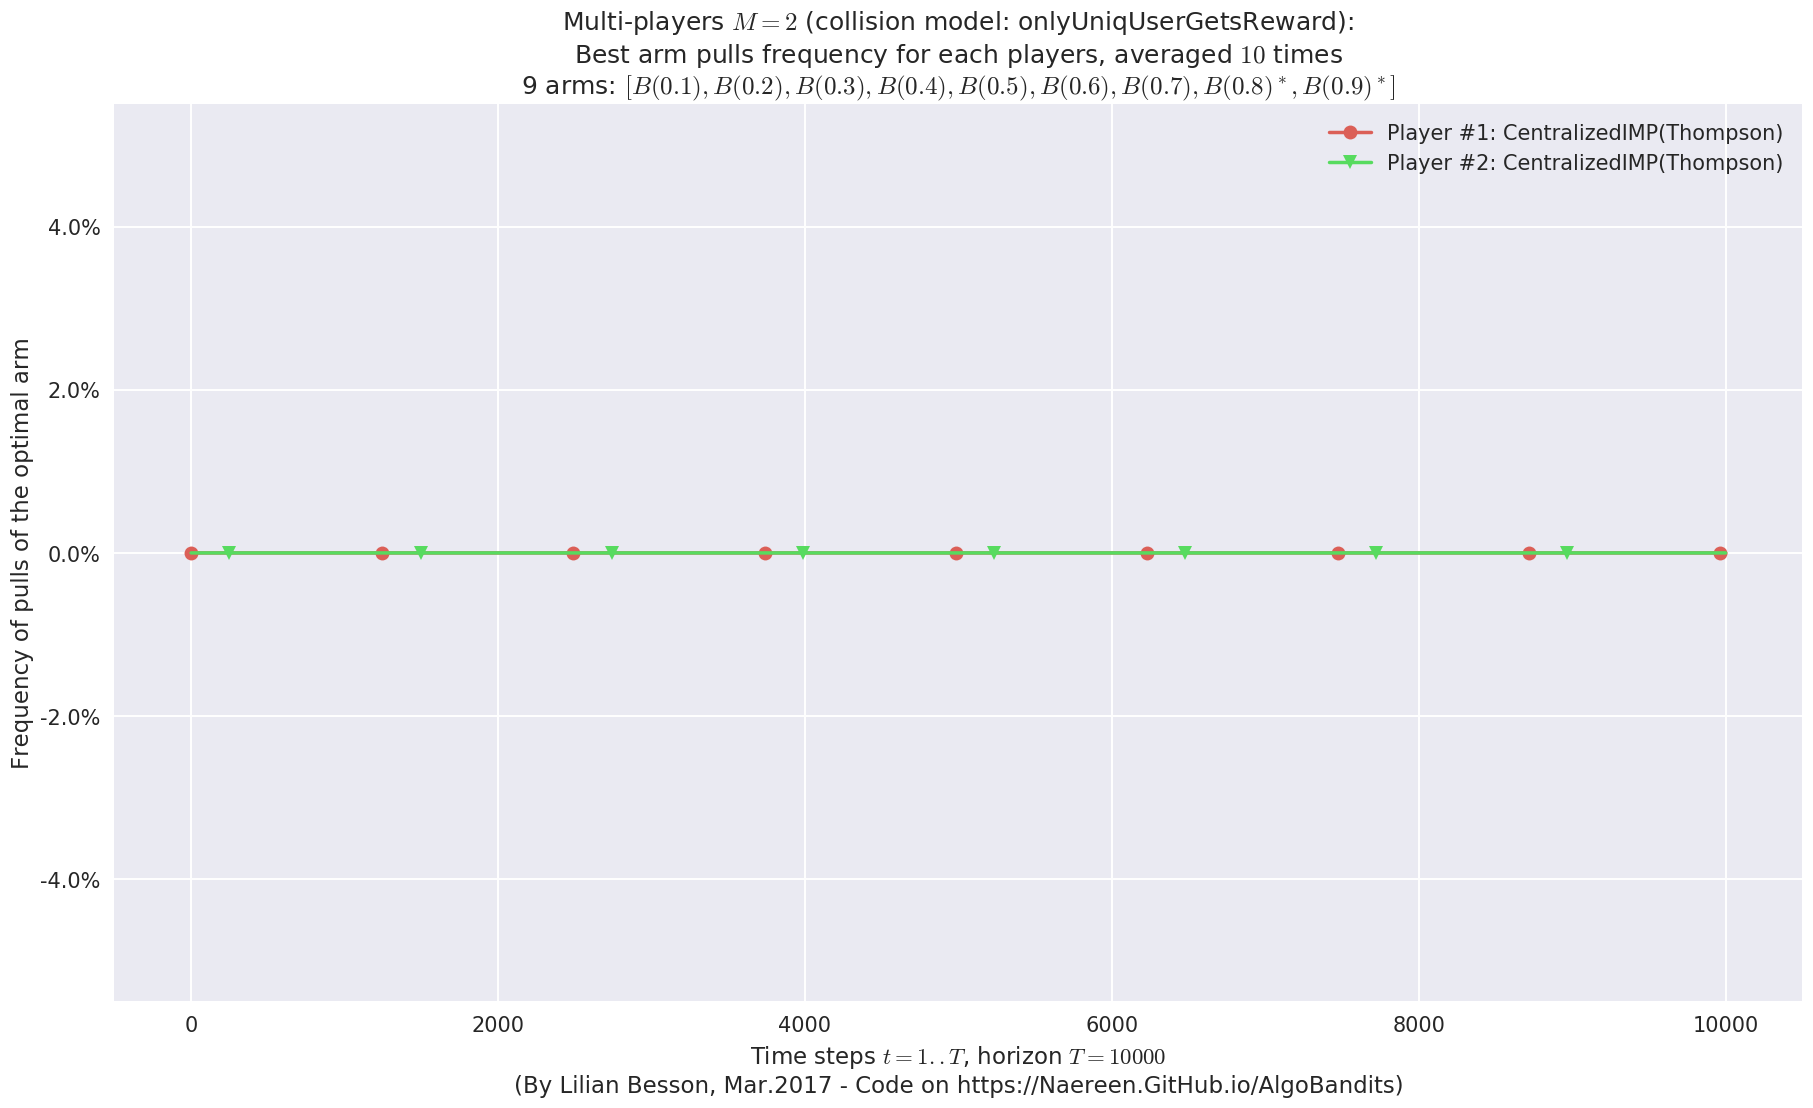

In [16]:
for playersId in tqdm(range(len(evs)), desc="Policies"):
    evaluation = evaluators[1][playersId]
    plotAll(evaluation, 1)

---
### Comparing their performances

In [23]:
def plotCombined(e0, eothers, envId):
    # Centralized regret
    e0.plotRegretCentralized(envId, evaluators=eothers)
    # Fairness
    e0.plotFairness(envId, fairness="STD", evaluators=eothers)
    # Number of switches
    e0.plotNbSwitchsCentralized(envId, cumulated=True, evaluators=eothers)
    # Number of collisions - not for Centralized* policies
    e0.plotNbCollisions(envId, cumulated=True, evaluators=eothers)

  - For 2 player, our lower bound gave = 18 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - Our lowerbound = 18,
 - [Anandkumar et al] lowerbound = 12.1


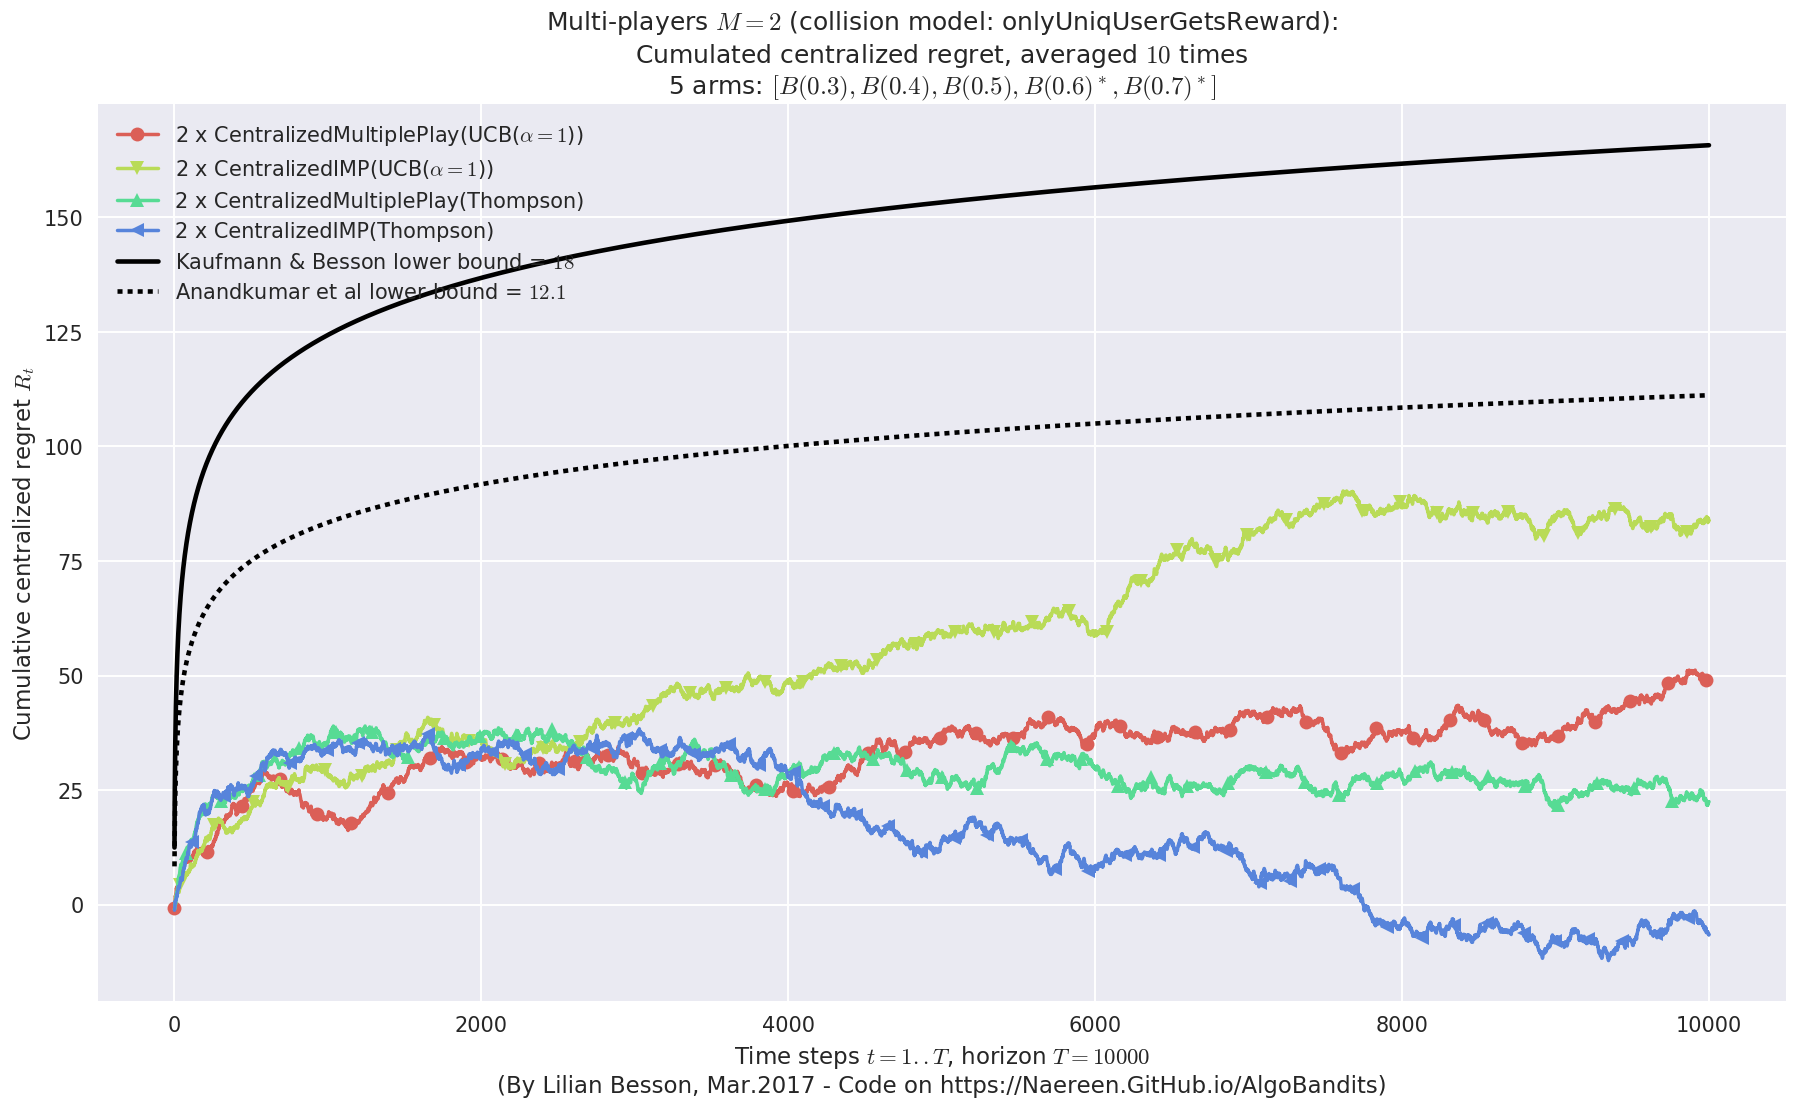

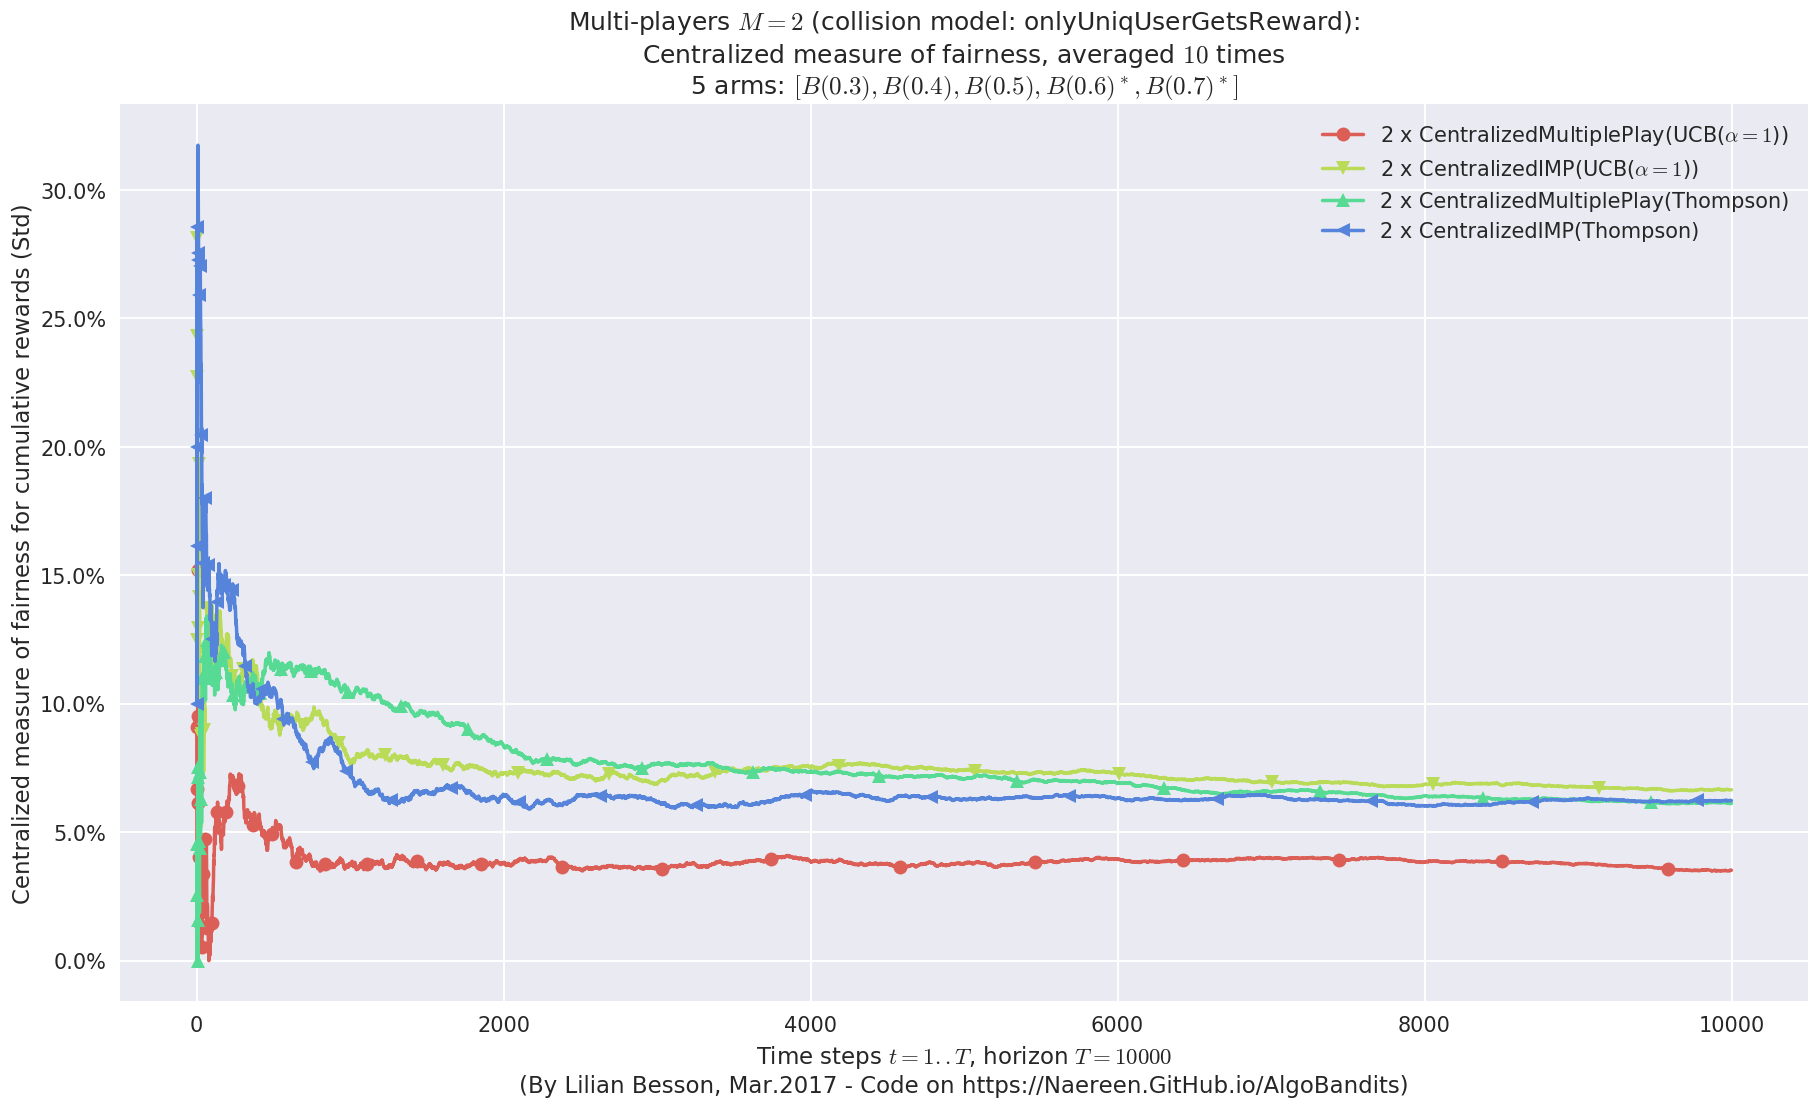

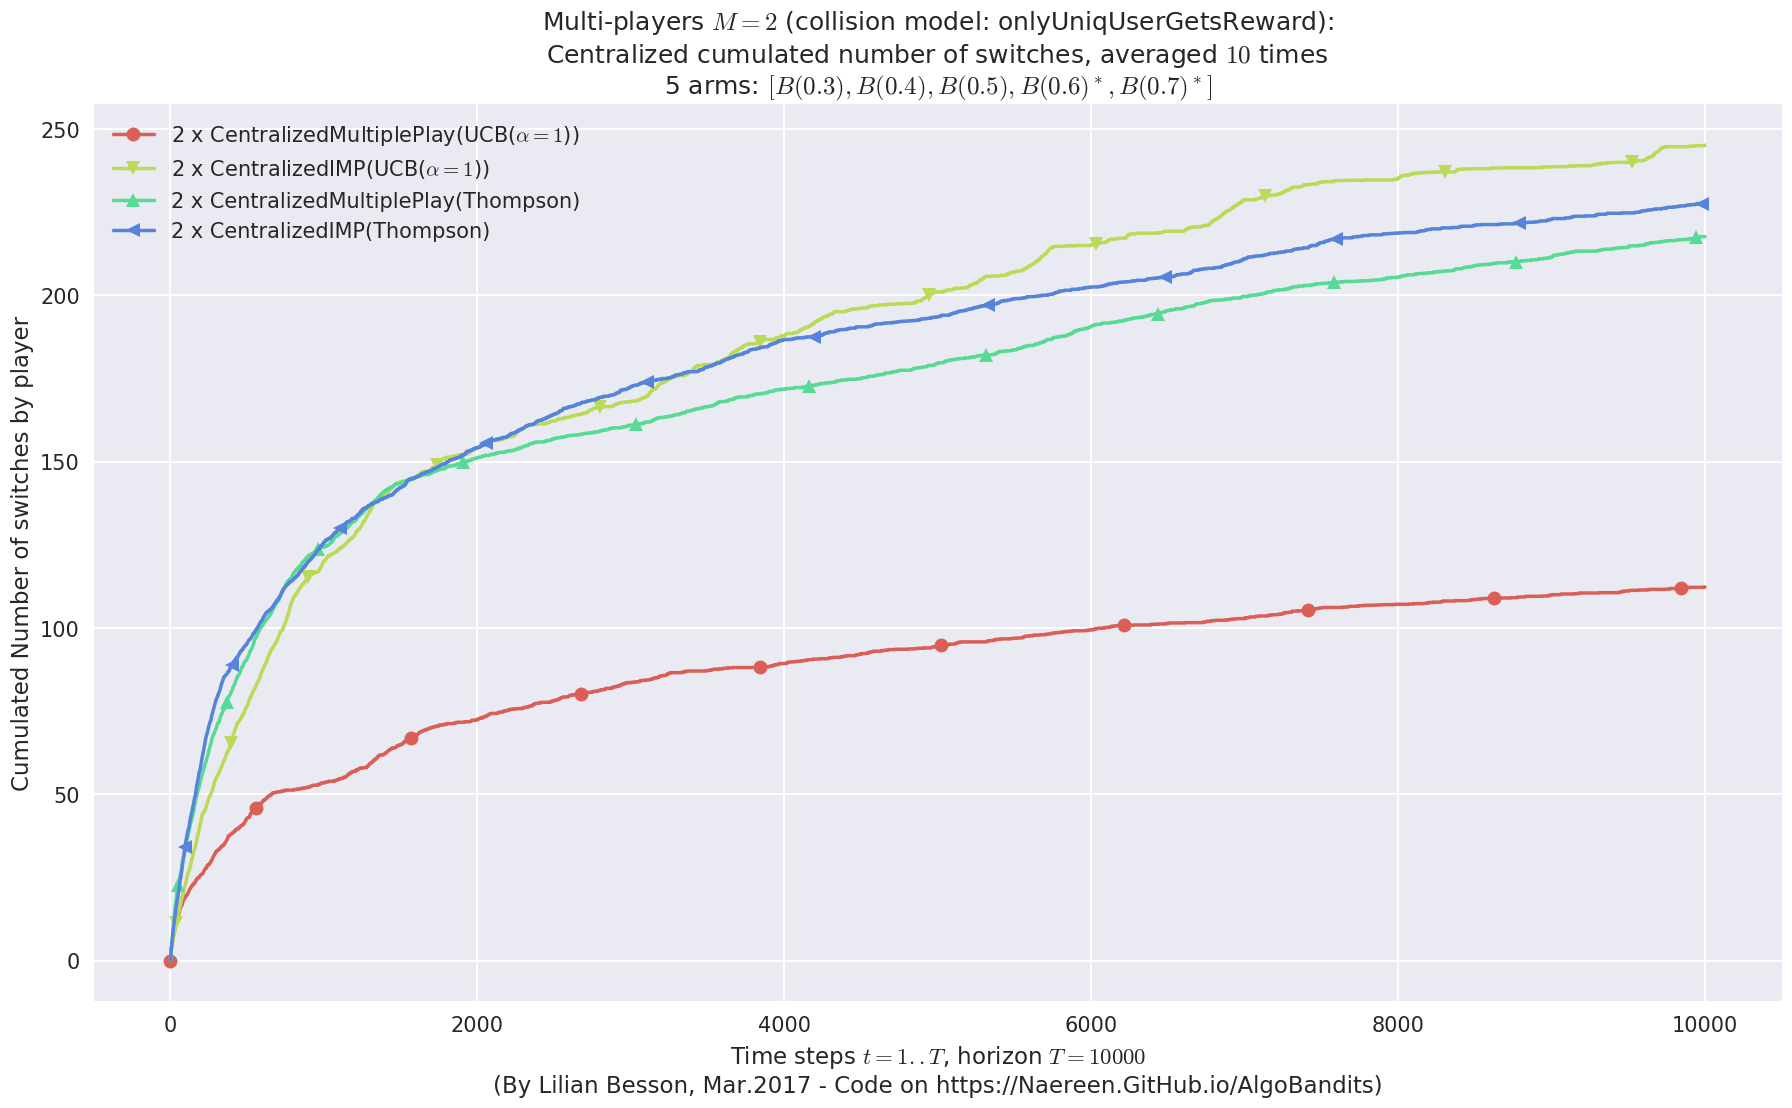

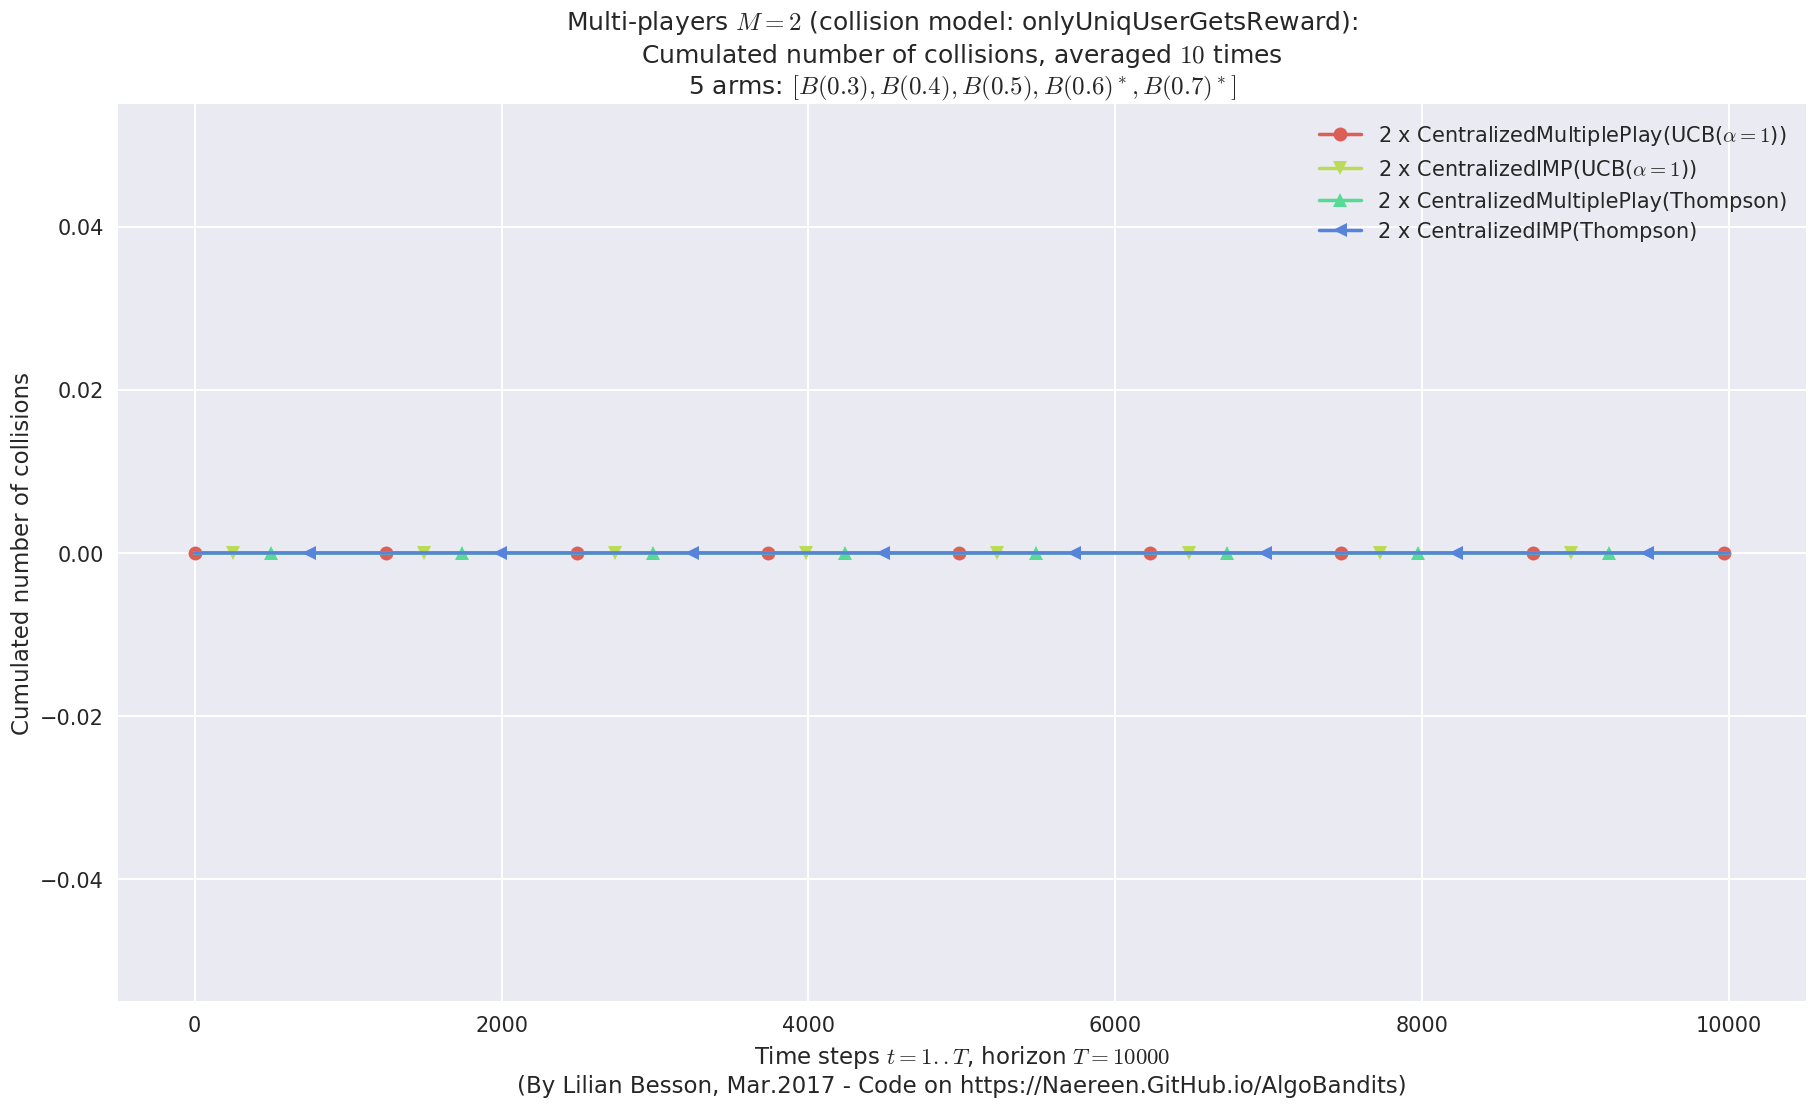

  - For 2 player, our lower bound gave = 20.1 ...
  - For 2 player, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 13.8 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 48.89% ...
 - Our lowerbound = 20.1,
 - [Anandkumar et al] lowerbound = 13.8


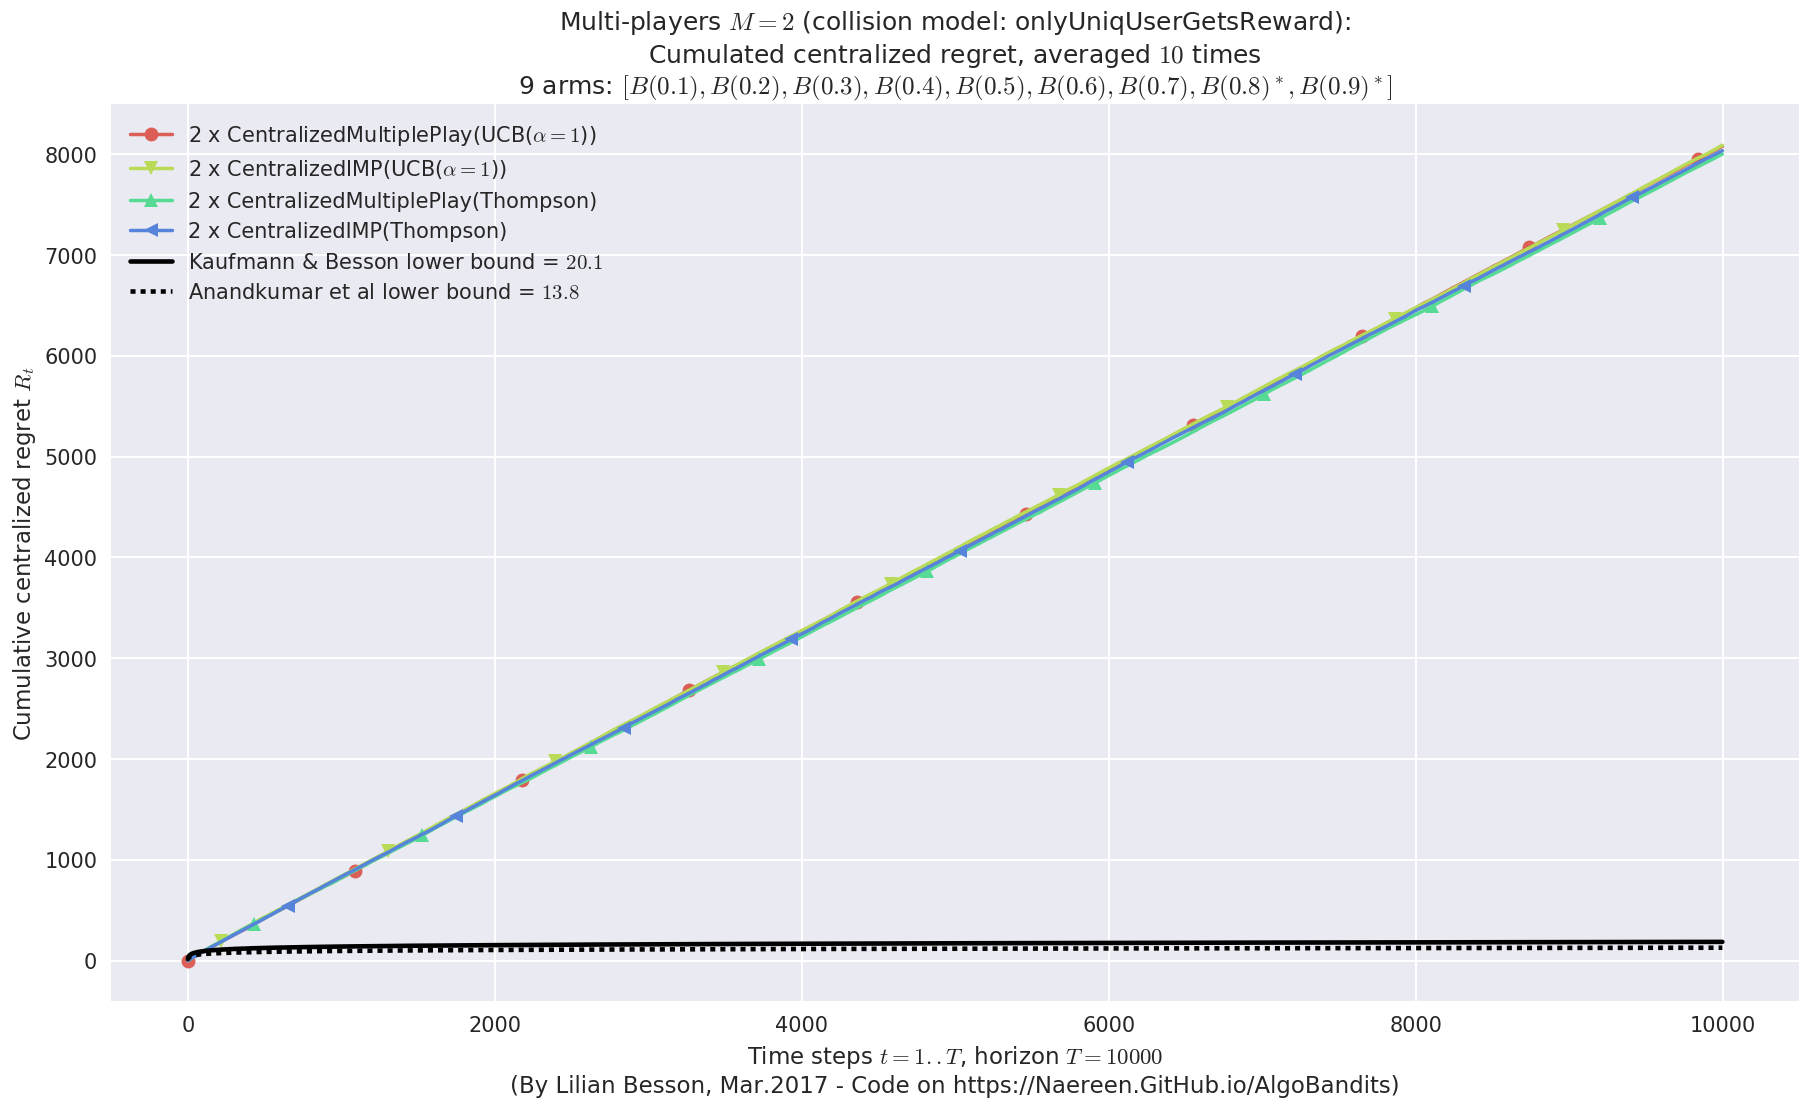

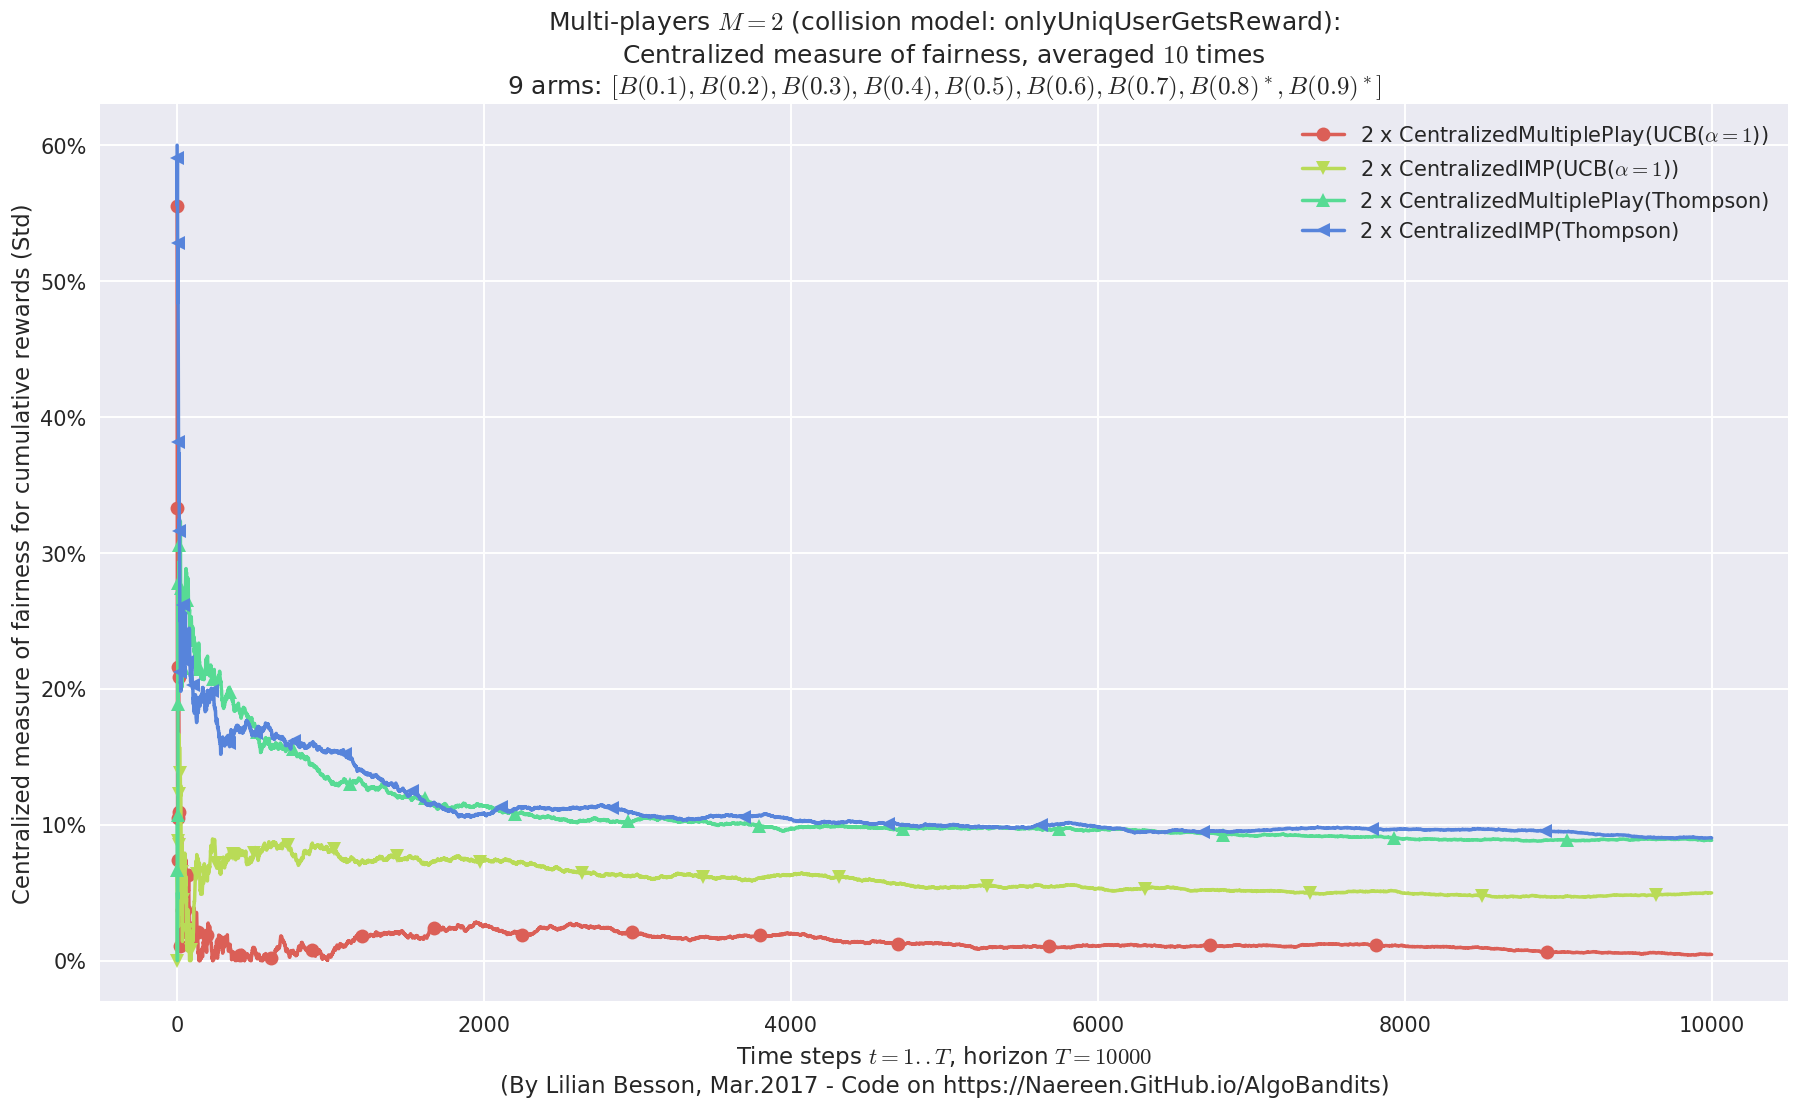

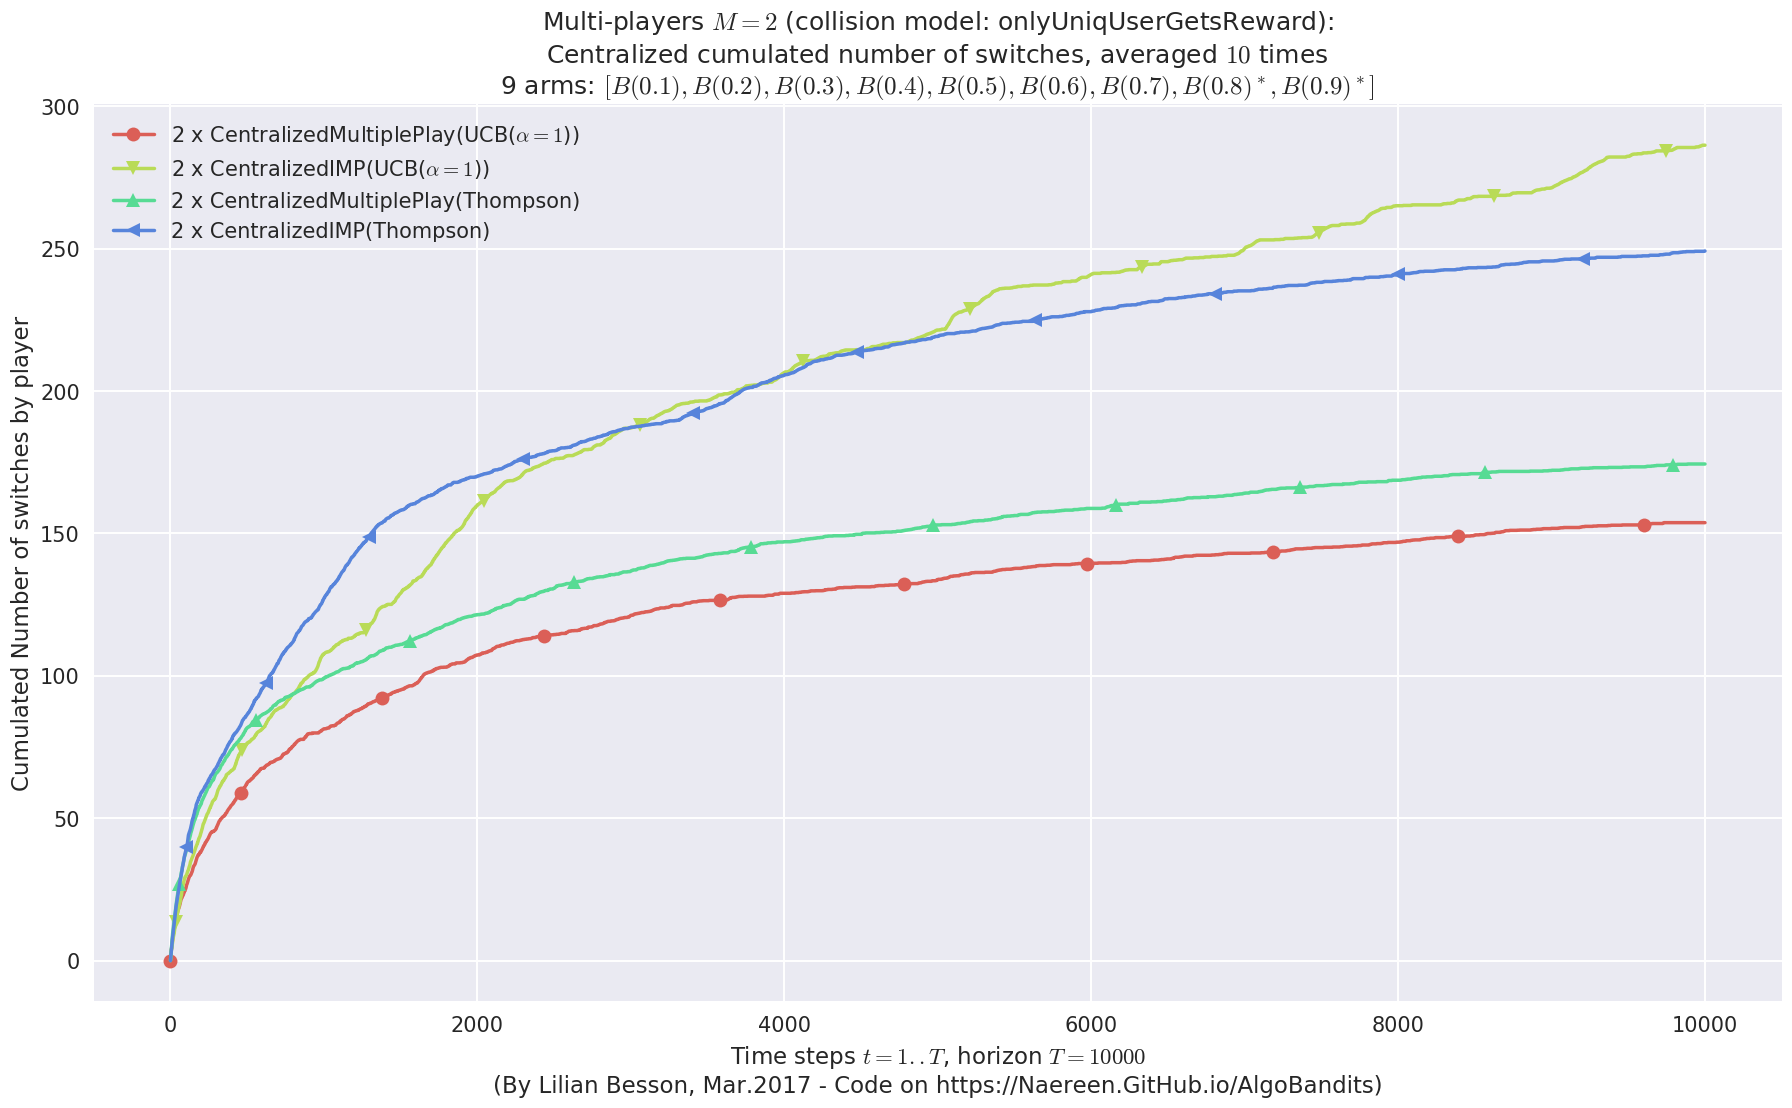

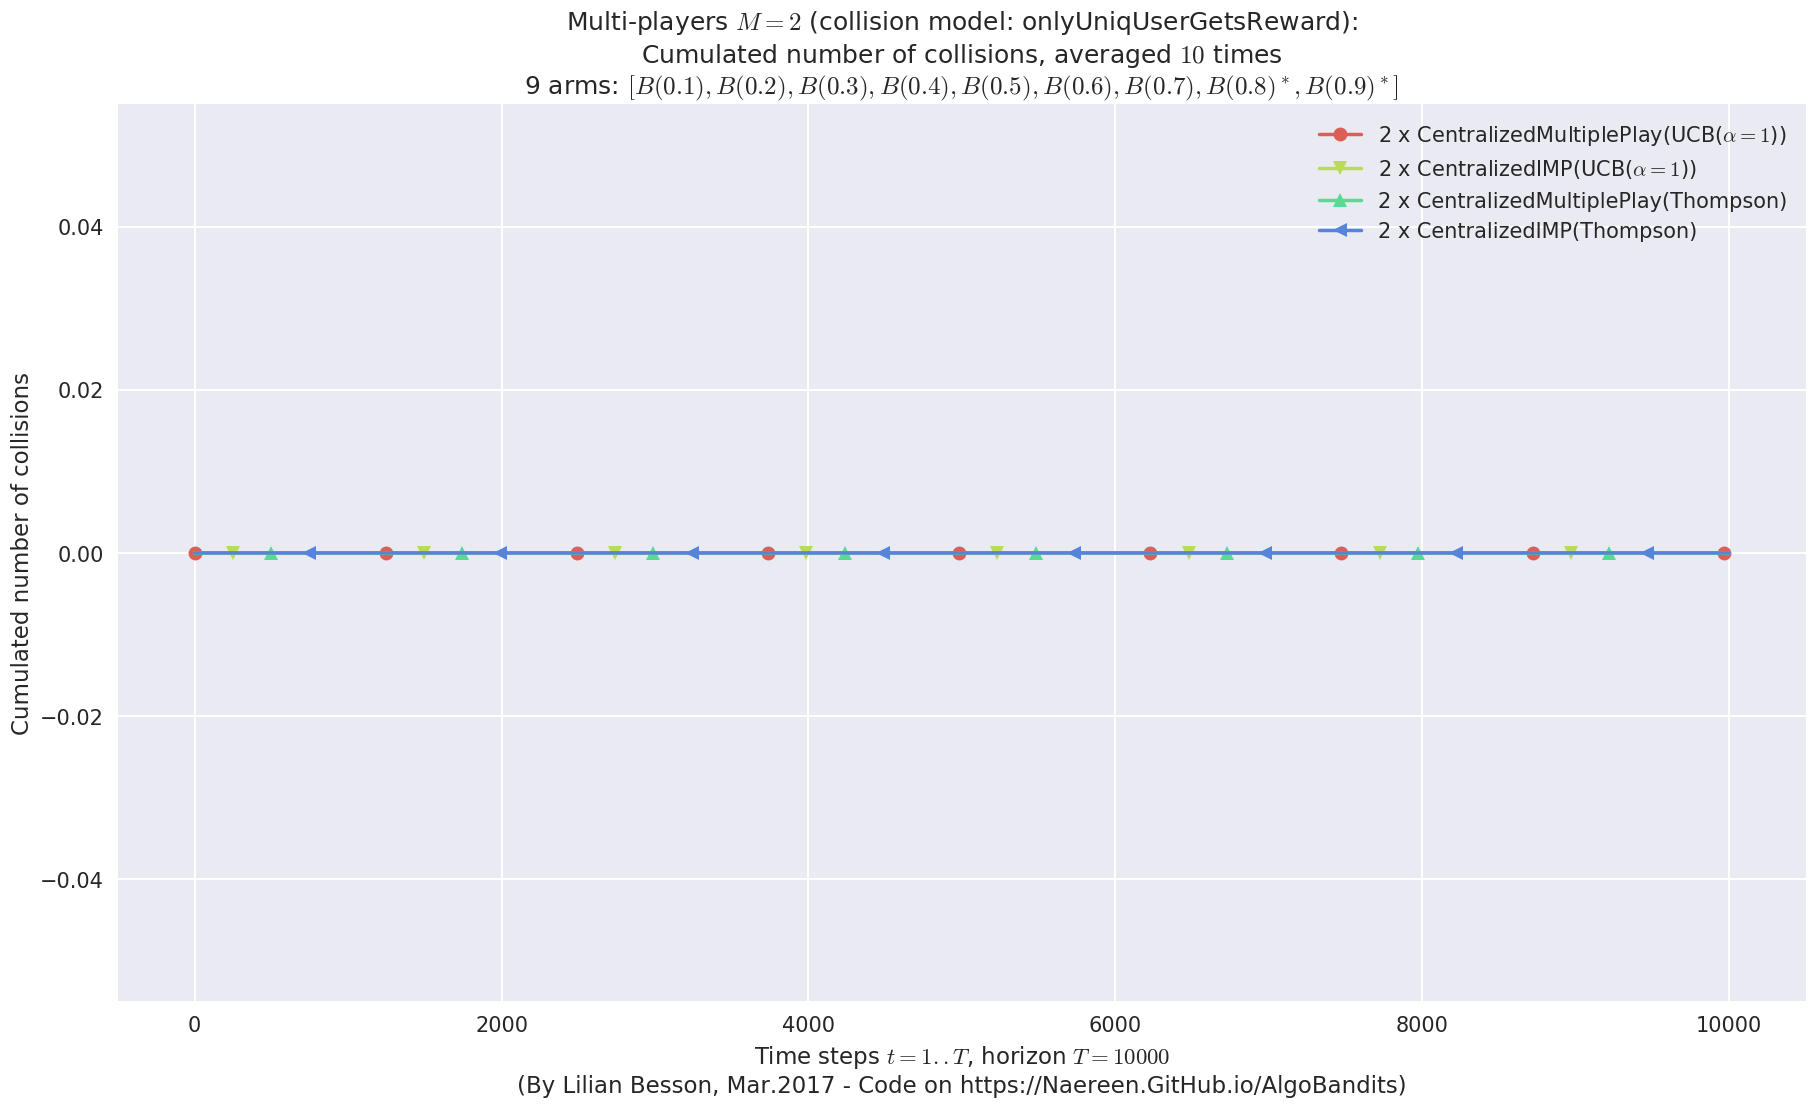

In [24]:
 N = len(configuration["environment"])
for envId, env in enumerate(configuration["environment"]):
    e0, eothers = evaluators[envId][0], evaluators[envId][1:]
    plotCombined(e0, eothers, envId)

---
> That's it for this demo!